# Home Credit Default Risk (HCDR)


The course project is based on the [Home Credit Default Risk (HCDR)  Kaggle Competition](https://www.kaggle.com/c/home-credit-default-risk/). The goal of this project is to predict whether or not a client will repay a loan. In order to make sure that people who struggle to get loans due to insufficient or non-existent credit histories have a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.


## Some of the challenges

1. Dataset size 
   * (688 meg compressed) with millions of rows of data
   * 2.71 Gig of data uncompressed
* Dealing with missing data
* Imbalanced datasets
* Summarizing transaction data
 

# Dataset and how to download


## Back ground Home Credit Group

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

### Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## Background on the dataset
Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

## Data files overview

The `HomeCredit_columns_description.csv` acts as a data dictioanry.

There are 7 different sources of data:

* __application_train/application_test (307k rows, and 48k rows):__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau (1.7 Million rows):__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance (27 Million rows):__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application (1.6 Million rows):__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE (10 Million rows):__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment (13.6 Million rows):__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.


### Table sizes
```python
name                       [  rows cols]     MegaBytes         
-----------------------  ------------------  -------
application_train       : [  307,511, 122]:   158MB
application_test        : [   48,744, 121]:   25MB
bureau                  : [ 1,716,428, 17]    162MB
bureau_balance          : [ 27,299,925, 3]:   358MB
credit_card_balance     : [  3,840,312, 23]   405MB
installments_payments   : [ 13,605,401, 8]    690MB
previous_application    : [  1,670,214, 37]   386MB
POS_CASH_balance        : [ 10,001,358, 8]    375MB
```




### Imports

In [1]:
from scipy import stats
# import latexify
import time
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
import pickle
import json
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import log_loss, classification_report, roc_auc_score, make_scorer
from scipy import stats
from sklearn.svm import SVC
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

## Data files overview
### Data Dictionary

As part of the data download comes a  Data Dictionary. It named `HomeCredit_columns_description.csv`

### Application train

In [2]:
 def load_data(in_path, name): 
        df = pd.read_csv(in_path)
        print(f"{name}: shape is {df.shape}") 
        print(df.info())
        display(df.head(5))
        return df
datasets={}
ds_name = 'application_train' 
DATA_DIR=f"/Users/deepak/Desktop/AML/home-credit-default-risk/" 
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)
datasets['application_train'].shape

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

(307511, 122)

### Application test


* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.


In [3]:
ds_name = 'application_test'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

The application dataset has the most information about the client: Gender, income, family status, education ...

### The Other datasets

* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [4]:
%%time
ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)


application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

bureau_balance: shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_C

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 1

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

CPU times: user 15.4 s, sys: 2.22 s, total: 17.6 s
Wall time: 17.8 s


In [5]:
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')

dataset application_train       : [    307,511, 122]
dataset application_test        : [     48,744, 121]
dataset bureau                  : [  1,716,428, 17]
dataset bureau_balance          : [ 27,299,925, 3]
dataset credit_card_balance     : [  3,840,312, 23]
dataset installments_payments   : [ 13,605,401, 8]
dataset previous_application    : [  1,670,214, 37]
dataset POS_CASH_balance        : [ 10,001,358, 8]


## Undersampling

Undersampling is performed when the data us highly biased. Here we can see that in the target variable, the defaulters are very less as compared to other people who have successfully repaid the loan. Hence we perform undersampling and take random entries from the good population and keep all the entries from the defaulters.

Undersampling data randomly

In [6]:
# application_train = datasets['application_train']
# # und_application_train = application_train[application_train['TARGET']==1]
# und_application_train = und_application_train.append(application_train[application_train['TARGET']==0].reset_index(drop=True).sample(n = 75000))

In [7]:
# Access the 'application_train' dataset from the 'datasets' container
application_train = datasets['application_train']

# Select the minority class instances (TARGET = 1) from the training dataset
minority_application_train = application_train[application_train['TARGET']==1]

# Append a randomly sampled subset of majority class instances (TARGET = 0) to the minority class instances
undersampled_application_train = minority_application_train.append(
    application_train[application_train['TARGET']==0].reset_index(drop=True).sample(n = 75000)
)


In [8]:
# Assign the undersampled training dataset to a new key in the 'datasets' dictionary
datasets["undersampled_application_train"] = undersampled_application_train 

# Count the number of instances in each class
class_distribution = undersampled_application_train['TARGET'].value_counts()

# Print the class distribution
print("Class distribution in the undersampled training dataset:")
print(class_distribution)


Class distribution in the undersampled training dataset:
0    75000
1    24825
Name: TARGET, dtype: int64


In [9]:
# datasets["und_application_train"] = und_application_train 
# und_application_train['TARGET'].value_counts()

Undersampling by keeping similar ratio of non-defaulters to defaulters and also maintaining loan types of non-defaulters uniformly

In [10]:
  # Assuming this is a dictionary where you store your datasets

# Filtering rows with TARGET == 1 and creating a new DataFrame
datasets["undersampled_application_train_2"] = datasets["application_train"][datasets["application_train"].TARGET == 1].copy()
datasets["undersampled_application_train_2"]['weight'] = 1

# Undersampling Cash loans
num_default_cashloans = len(datasets["undersampled_application_train_2"][(datasets["undersampled_application_train_2"].NAME_CONTRACT_TYPE == 'Cash loans') & (datasets["undersampled_application_train_2"].TARGET == 1)])
df_sample_cash = datasets["application_train"][(datasets["application_train"].NAME_CONTRACT_TYPE == 'Cash loans') & (datasets["application_train"].TARGET == 0)].sample(n=num_default_cashloans, random_state=42)
df_sample_cash['weight'] = 1

# Undersampling Revolving loans
num_default_revolvingloans = len(datasets["undersampled_application_train_2"][(datasets["undersampled_application_train_2"].NAME_CONTRACT_TYPE == 'Revolving loans') & (datasets["undersampled_application_train_2"].TARGET == 1)])
df_sample_revolving = datasets["application_train"][(datasets["application_train"].NAME_CONTRACT_TYPE == 'Revolving loans') & (datasets["application_train"].TARGET == 0)].sample(n=num_default_revolvingloans, random_state=42)
df_sample_revolving['weight'] = 1

# Combining undersampled cash loans and revolving loans with the initial DataFrame
datasets["undersampled_application_train_2"] = pd.concat([datasets["undersampled_application_train_2"], df_sample_cash, df_sample_revolving])

# Check the distribution of the TARGET variable
print(datasets["undersampled_application_train_2"].TARGET.value_counts())


1    24825
0    24825
Name: TARGET, dtype: int64


In [11]:
# Assuming this is a dictionary where you store your datasets

# Filtering rows with TARGET == 1 and creating a new DataFrame
undersampled_application_train_2 = datasets["application_train"][datasets["application_train"].TARGET == 1].copy()
undersampled_application_train_2['weight'] = 1

# Undersampling Cash loans
num_default_cashloans = len(undersampled_application_train_2[(undersampled_application_train_2.NAME_CONTRACT_TYPE == 'Cash loans') & (undersampled_application_train_2.TARGET == 1)])
df_sample_cash = datasets["application_train"][(datasets["application_train"].NAME_CONTRACT_TYPE == 'Cash loans') & (datasets["application_train"].TARGET == 0)].sample(n=num_default_cashloans, random_state=42)
df_sample_cash['weight'] = 1

# Undersampling Revolving loans
num_default_revolvingloans = len(undersampled_application_train_2[(undersampled_application_train_2.NAME_CONTRACT_TYPE == 'Revolving loans') & (undersampled_application_train_2.TARGET == 1)])
df_sample_revolving = datasets["application_train"][(datasets["application_train"].NAME_CONTRACT_TYPE == 'Revolving loans') & (datasets["application_train"].TARGET == 0)].sample(n=num_default_revolvingloans, random_state=42)
df_sample_revolving['weight'] = 1

# Combining undersampled cash loans and revolving loans with the initial DataFrame
undersampled_application_train_2 = pd.concat([undersampled_application_train_2, df_sample_cash, df_sample_revolving])

# Check the distribution of the TARGET variable
print(undersampled_application_train_2.TARGET.value_counts())


1    24825
0    24825
Name: TARGET, dtype: int64


## Correlation Analysis

The correlation coefficient is not the best way to identify the relevancs between the features. But it gives an idea about possible relationship between the data.

### Correlation with  the target column 

In [12]:
correlations = datasets["application_train"].corr()['TARGET'].sort_values() 
print('Most Positive Correlations:\n', correlations.tail(10)) 
print('\nMost Negative Correlations:\n', correlations.head(10))


Most Positive Correlations:
 FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


In [13]:
corr_application_train = application_train.corr()['TARGET'].sort_values()
corr_application_train = corr_application_train.reset_index().rename(columns={'index':'Attributes','TARGET':'Correlation'}) 
corr_application_train

Attributes  Correlation
0                   EXT_SOURCE_3    -0.178919
1                   EXT_SOURCE_2    -0.160472
2                   EXT_SOURCE_1    -0.155317
3                  DAYS_EMPLOYED    -0.044932
4                  FLOORSMAX_AVG    -0.044003
..                           ...          ...
101       DAYS_LAST_PHONE_CHANGE     0.055218
102         REGION_RATING_CLIENT     0.058899
103  REGION_RATING_CLIENT_W_CITY     0.060893
104                   DAYS_BIRTH     0.078239
105                       TARGET     1.000000

[106 rows x 2 columns]

In [14]:
corr = datasets["undersampled_application_train"].corr()['TARGET'] 
corr=corr.sort_values(ascending=False)

In [15]:
print('NEGATIVE CORRELATIONS:\n', corr.tail(10))

NEGATIVE CORRELATIONS:
 AMT_GOODS_PRICE    -0.062382
DAYS_EMPLOYED      -0.071174
FLOORSMAX_MODE     -0.072551
FLOORSMAX_MEDI     -0.073400
FLOORSMAX_AVG      -0.073558
EXT_SOURCE_2       -0.243271
EXT_SOURCE_1       -0.244687
EXT_SOURCE_3       -0.273568
FLAG_MOBIL               NaN
FLAG_DOCUMENT_12         NaN
Name: TARGET, dtype: float64


In [16]:
print('\n\nPOSITIVE CORRELATIONS\n', corr.head(10))



POSITIVE CORRELATIONS
 TARGET                         1.000000
DAYS_BIRTH                     0.122185
REGION_RATING_CLIENT_W_CITY    0.094366
REGION_RATING_CLIENT           0.091521
DAYS_LAST_PHONE_CHANGE         0.088701
REG_CITY_NOT_WORK_CITY         0.081756
DAYS_ID_PUBLISH                0.080530
FLAG_EMP_PHONE                 0.072880
FLAG_DOCUMENT_3                0.070086
REG_CITY_NOT_LIVE_CITY         0.066439
Name: TARGET, dtype: float64


Text(0.5, 1.0, 'Correlation Heatmap for features with highest correlations with target variables')

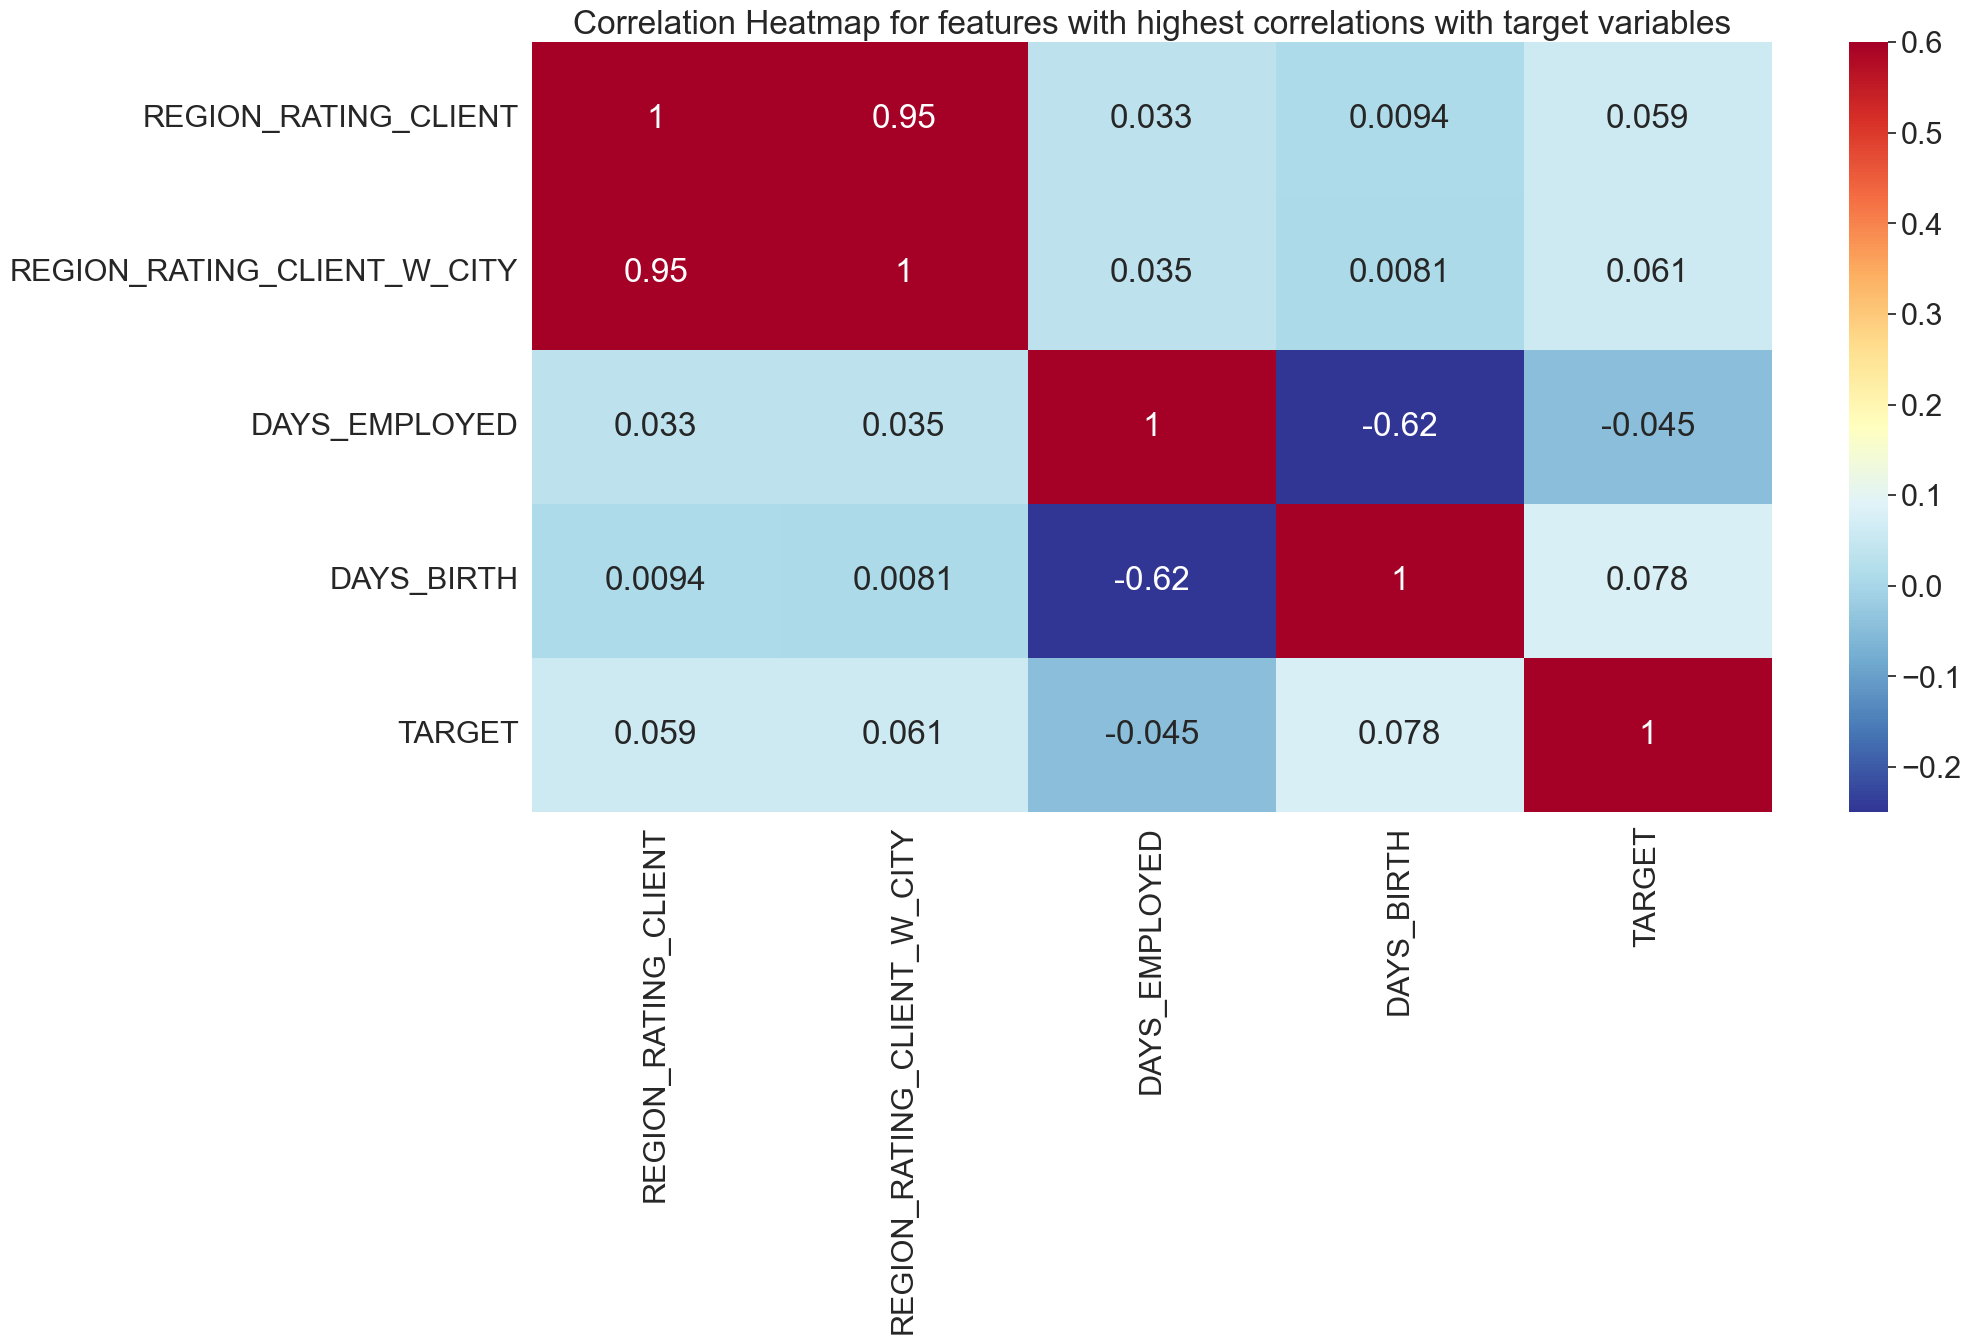

In [17]:
most_corr=datasets["application_train"][['REGION_RATING_CLIENT',
                      'REGION_RATING_CLIENT_W_CITY','DAYS_EMPLOYED','DAYS_BIRTH','TARGET']]
most_corr_corr = most_corr.corr()

sns.set_style("dark")
sns.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 1.0})
fig, axes = plt.subplots(figsize = (20,10),sharey=True)
sns.heatmap(most_corr_corr,cmap=plt.cm.RdYlBu_r,vmin=-0.25,vmax=0.6,annot=True)
plt.title('Correlation Heatmap for features with highest correlations with target variables')


# Joining secondary tables with the primary table

In the case of the HCDR competition (and many other machine learning problems that involve multiple tables in 3NF or not)  we need to join these datasets (denormalize) when using a machine learning pipeline. Joining the secondary tables with the primary table will lead to lots of new features about each loan application; these features will tend to be aggregate type features or meta data about the loan or its application. How can we do this when using Machine Learning Pipelines?

## Joining `previous_application` with `application_x`
We refer to the `application_train` data (and also `application_test` data also) as the **primary table** and the other files as the **secondary tables** (e.g., `previous_application` dataset). All tables can be joined using the primary key `SK_ID_PREV`.

Let's assume we wish to generate a feature based on previous application attempts. In this case, possible features here could be:

* A simple feature could be the number of previous applications.
* Other summary features of original features such as `AMT_APPLICATION`, `AMT_CREDIT` could be based on average, min, max, median, etc.
 
To build such features, we need to join the `application_train` data (and also `application_test` data also) with the 'previous_application' dataset (and the other available datasets).

When joining this data in the context of pipelines, different strategies come to mind with various tradeoffs:

1. Preprocess each of the non-application data sets, thereby generating many new (derived) features, and then joining (aka merge) the results with the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset) prior to processing the data (in a train, valid, test partition) via your machine learning pipeline. [This approach is recommended for this HCDR competition. WHY?]

* Do the joins as part of the transformation steps. [Not recommended here. WHY?]. How can this be done? Will it work?
  * This would be necessary if we had dataset wide features such as IDF (inverse document frequency) which depend on the entire subset of data as opposed to a single loan application (e.g., a feature about the relative amount applied for such as the percentile of the loan amount being applied for).
 
I want you to think about this section and build on this.

## Roadmap for secondary table processing

1. Transform all the secondary tables to features that can be joined into the main table the application table (labeled and unlabeled)
   * 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 
   * 'previous_application', 'POS_CASH_balance'
* Merge the transformed secondary tables with the primary tables (i.e., the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset)), thereby leading to X_train, y_train, X_valid, etc.
* Proceed with the learning pipeline using X_train, y_train, X_valid, etc.
* Generate a submission file using the learnt model


### Feature transformer

In [18]:
# Create aggregate features (via pipeline)
class FeaturesAggregater(BaseEstimator, TransformerMixin):

    def __init__(self, features=None, agg_needed=["mean"]): # no *args or **kargs self.features = features
        self.agg_needed = agg_needed
        self.agg_op_features = {}
        for f in features:
            self.agg_op_features[f] = self.agg_needed[:]
    def fit(self, X, y=None): 
        return self
    def transform(self, X, y=None):
        result = X.groupby(["SK_ID_CURR"]).agg(self.agg_op_features) 
        df_result = pd.DataFrame()
        for x1, x2 in result.columns:
            new_col = x1 + "_" + x2
            df_result[new_col] = result[x1][x2]
            df_result = df_result.reset_index(level=["SK_ID_CURR"]) 
            return df_result


### Fixing Column names after Pandas agg() function to summarize grouped data
Since we have both the variable name and the operation performed in two rows in the Multi-Index dataframe, we can use that and name our new columns correctly.

For more details unstacking groupby results and examples please see [here](https://cmdlinetips.com/2020/05/fun-with-pandas-groupby-aggregate-multi-index-and-unstack/)




For more details and examples please see [here](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)

### Missing values in previous application table

In [19]:
# appsDF = datasets["previous_application"]
# appsDF.isna().sum()

In [20]:
# Access the 'previous_application' dataset from the 'datasets' container and assign it to a variable named 'previous_application_data'
previous_application_data = datasets["previous_application"]

# Apply the 'isna()' method on the 'previous_application_data' DataFrame to detect missing or null values, 
# and then apply the 'sum()' method to count the number of missing values in each column of the DataFrame.
missing_values_count_per_column = previous_application_data.isna().sum()
missing_values_count_per_column

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

### Feature engineering for prevApp table

The groupby output will have an index or multi-index on rows corresponding to your chosen grouping variables. To avoid setting this index, pass “as_index=False” to the groupby operation.

```python
import pandas as pd
import dateutil

# Load data from csv file
data = pd.DataFrame.from_csv('phone_data.csv')
# Convert date from string to date times
data['date'] = data['date'].apply(dateutil.parser.parse, dayfirst=True)

data.groupby('month', as_index=False).agg({"duration": "sum"})
```
Pandas `reset_index()` to convert Multi-Index to Columns
We can simplify the multi-index dataframe using reset_index() function in Pandas. By default, Pandas reset_index() converts the indices to columns.

In [21]:
previous_feature = ["AMT_APPLICATION", "AMT_CREDIT", "AMT_ANNUITY", "approved_credit_ratio", "AMT_ANNUITY_credit_ratio", "Interest_ratio", "LTV_ratio", "SK_ID_PREV", "approved"]
agg_needed = ["min", "max", "mean", "count", "sum"]


agg_needed = ["min", "max", "mean", "count", "sum"]

def previous_feature_aggregation(df, feature, agg_needed):
    df['approved_credit_ratio'] = (df['AMT_APPLICATION']/df['AMT_CREDIT']).replace(np.inf, 0)
    # installment over credit approved ratio
    df['AMT_ANNUITY_credit_ratio'] = (df['AMT_ANNUITY']/df['AMT_CREDIT']).replace(np.inf, 0)
    # total interest payment over credit ratio
    df['Interest_ratio'] = (df['AMT_ANNUITY']/df['AMT_CREDIT']).replace(np.inf, 0)
    #  loan cover ratio
    df['LTV_ratio'] = (df['AMT_CREDIT']/df['AMT_GOODS_PRICE']).replace(np.inf, 0)
    df['approved'] = np.where(df.AMT_CREDIT >0 ,1, 0)
    
    test_pipeline = make_pipeline(FeaturesAggregater(feature, agg_needed))
    return(test_pipeline.fit_transform(df))
    
datasets['previous_application_agg'] = previous_feature_aggregation(datasets["previous_application"], previous_feature, agg_needed)

### Missing value after the feature engineering

In [22]:
datasets["previous_application_agg"].isna().sum()

SK_ID_CURR             0
AMT_APPLICATION_min    0
dtype: int64

### Missing values in Installment payments

In [23]:
datasets["installments_payments"].isna().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

### Feature Engineering for Installment payments

In [24]:
payments_features = ["DAYS_INSTALMENT_DIFF", "AMT_PATMENT_PCT"]

agg_needed = ["mean"]

def payments_feature_aggregation(df, feature, agg_needed):
    df['DAYS_INSTALMENT_DIFF'] = df['DAYS_INSTALMENT'] - df['DAYS_ENTRY_PAYMENT']
    df['AMT_PATMENT_PCT'] = [x/y if (y != 0) & pd.notnull(y) else np.nan for x,y in zip(df.AMT_PAYMENT,df.AMT_INSTALMENT)]
    
    test_pipeline = make_pipeline(FeaturesAggregater(feature, agg_needed))
    return(test_pipeline.fit_transform(df))
    
datasets['installments_payments_agg'] = payments_feature_aggregation(datasets["installments_payments"], payments_features, agg_needed)

### Missing value after the feature engineering

In [25]:
datasets["installments_payments_agg"].isna().sum()

SK_ID_CURR                   0
DAYS_INSTALMENT_DIFF_mean    9
dtype: int64

### Missing value in  Credit card balance

In [26]:
datasets["credit_card_balance"].isna().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

### Feature Engineering for Credit card balance

In [27]:
credit_features = [
    "AMT_BALANCE",
    "AMT_DRAWINGS_PCT",
    "AMT_DRAWINGS_ATM_PCT",
    "AMT_DRAWINGS_OTHER_PCT",
    "AMT_DRAWINGS_POS_PCT",
    "AMT_PRINCIPAL_RECEIVABLE_PCT",
    "CNT_DRAWINGS_ATM_CURRENT",
    "CNT_DRAWINGS_CURRENT",
    "CNT_DRAWINGS_OTHER_CURRENT",
    "CNT_DRAWINGS_POS_CURRENT",
    "SK_DPD",
    "SK_DPD_DEF",
]

agg_needed = ["mean"]


def calculate_pct(x, y):
    return x / y if (y != 0) & pd.notnull(y) else np.nan
#def pct(x, y):
    #return x / y if (y != 0) & pd.notnull(y) else np.nan


def credit_feature_aggregation(df, feature, agg_needed):
    pct_columns = [
        ("AMT_DRAWINGS_CURRENT", "AMT_DRAWINGS_PCT"),
        ("AMT_DRAWINGS_ATM_CURRENT", "AMT_DRAWINGS_ATM_PCT"),
        ("AMT_DRAWINGS_OTHER_CURRENT", "AMT_DRAWINGS_OTHER_PCT"),
        ("AMT_DRAWINGS_POS_CURRENT", "AMT_DRAWINGS_POS_PCT"),
        ("AMT_RECEIVABLE_PRINCIPAL", "AMT_PRINCIPAL_RECEIVABLE_PCT"),
    ]

    for col_x, col_pct in pct_columns:
        df[col_pct] = [calculate_pct(x, y) for x, y in zip(df[col_x], df["AMT_CREDIT_LIMIT_ACTUAL"])]

    pipeline = make_pipeline(FeaturesAggregater(feature, agg_needed))
    return pipeline.fit_transform(df)


datasets["credit_card_balance_agg"] = credit_feature_aggregation(
    datasets["credit_card_balance"], credit_features, agg_needed
)


### Missing values after feature engineering

In [28]:
datasets["credit_card_balance_agg"].isna().sum()

SK_ID_CURR          0
AMT_BALANCE_mean    0
dtype: int64

## Join the feature engineered datasets with under-sampled datasets

In [29]:
datasets.keys()

dict_keys(['application_train', 'application_test', 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 'previous_application', 'POS_CASH_balance', 'undersampled_application_train', 'undersampled_application_train_2', 'previous_application_agg', 'installments_payments_agg', 'credit_card_balance_agg'])

In [30]:
# Load the train dataset
train_data = datasets["application_train"]

# Compute the distribution of the target variable
target_counts = train_data['TARGET'].value_counts()

# Display the target distribution
print("Target variable distribution:\n")
print(target_counts)
print("\n")

# Compute the percentage of positive and negative examples in the dataset
positive_count = target_counts[1]
negative_count = target_counts[0]
total_count = positive_count + negative_count
positive_percentage = (positive_count / total_count) * 100
negative_percentage = (negative_count / total_count) * 100

# Display the percentages of positive and negative examples
print(f"Percentage of positive examples: {positive_percentage:.2f}%")
print(f"Percentage of negative examples: {negative_percentage:.2f}%")


Target variable distribution:

0    282686
1     24825
Name: TARGET, dtype: int64


Percentage of positive examples: 8.07%
Percentage of negative examples: 91.93%


In [31]:
train_dataset= datasets["undersampled_application_train"] #primary dataset
    
merge_all_data = True

# merge primary table and secondary tables using features based on meta data and  aggregage stats 
if merge_all_data:
    # 1. Join/Merge in prevApps Data
    train_dataset = train_dataset.merge(datasets["previous_application_agg"], how='left', on='SK_ID_CURR')

    # 2. Join/Merge in Installments Payments  Data
    train_dataset = train_dataset.merge(datasets["installments_payments_agg"], how='left', on="SK_ID_CURR")

    # 3. Join/Merge in Credit Card Balance Data
    train_dataset = train_dataset.merge(datasets["credit_card_balance_agg"], how='left', on="SK_ID_CURR")

In [32]:
datasets["undersampled_application_train_4"] = train_dataset

In [33]:
train_dataset.shape

(99825, 125)

In [34]:
train_dataset = datasets["undersampled_application_train_2"]
train_dataset = train_dataset.merge(datasets["previous_application_agg"], how='left', on='SK_ID_CURR')
train_dataset = train_dataset.merge(datasets["installments_payments_agg"], how='left', on="SK_ID_CURR")
train_dataset = train_dataset.merge(datasets["credit_card_balance_agg"], how='left', on="SK_ID_CURR")
train_dataset = train_dataset.drop(columns = 'weight')
datasets["undersampled_application_train_4_2"] = train_dataset

In [35]:
train_dataset.shape

(49650, 125)

In [36]:
train_dataset.to_csv('train_dataset.csv', index=False) 


## Join the unlabeled dataset (i.e., the submission file)

In [37]:
X_kaggle_test= datasets["application_test"]

# merge primary table and secondary tables using features based on meta data and  aggregage stats 
if merge_all_data:
    # 1. Join/Merge in prevApps Data
    X_kaggle_test = X_kaggle_test.merge(datasets["previous_application_agg"], how='left', on='SK_ID_CURR')

    # 2. Join/Merge in Installments Payments  Data
    X_kaggle_test = X_kaggle_test.merge(datasets["installments_payments_agg"], how='left', on="SK_ID_CURR")

    # 3. Join/Merge in Credit Card Balance Data
    X_kaggle_test = X_kaggle_test.merge(datasets["credit_card_balance_agg"], how='left', on="SK_ID_CURR")
    
    

In [38]:
X_kaggle_test.to_csv('X_kaggle_test.csv', index=False) 

## Loss Functions

#### LOG LOSS: Log-loss is indicative of how close the prediction probability is to the corresponding actual/true value (0 or 1 in case of binary classification). The more the predicted probability diverges from the actual value, the higher is the log-loss value.

In [39]:
# @latexify.function(use_math_symbols=True)
# def logLoss():
#     return (-1 / N) * Sigma(_i**N) (y_i * log(p(y_i)) + (1 - y_i) * log(1 - p(y_i)))
# logLoss

#### Squared Hinge Loss: Hinge Loss is mainly used by support vector machines. The best possible line in any classification problem will make as few classification mistakes as possible. To express this idea computationally, hinge loss penalizes every incorrect classification. Squared hinge loss is simply the square of hinge loss. If you want to punish the large errors, squared hinge loss comes into the picture.

In [40]:
# @latexify.function(use_math_symbols=True)
# def squaredHinge(y,yhat):
#     return Sigma(_i**N) (max(0, 1 - y_i*yhat_i)**2)
# squaredHinge

#### Entropy: Entropy is a measure of chaos within the node. And chaos, in the context of decision trees, is having a node where all classes are equally present in the data.

In [41]:
# @latexify.function(use_math_symbols=True)
# def Entropy(node):
#     return -Sigma(_i**c) (p_i * log_2(p_i))
# Entropy

The 'pi' above refers to the fraction of the observations that belong to a particular class 'i' and the 'c' given in the formula is the number of different possible values of the response variable.

#### Gini Impurity: Gini Impurity is measure of variance across the different classes

In [42]:
# @latexify.function(use_math_symbols=True)
# def Gini(node):
#     return Sigma(_i**c) (p_i * (1 - p_i))
# Gini

The 'pi' above refers to the fraction of the observations that belong to a particular class 'i' and the 'c' given in the formula is the number of different possible values of the response variable.

## Evaluation metrics
Submissions are evaluated on [area under the ROC curve](http://en.wikipedia.org/wiki/Receiver_operating_characteristic) between the predicted probability and the observed target.

The SkLearn `roc_auc_score` function computes the area under the receiver operating characteristic (ROC) curve, which is also denoted by AUC or AUROC. By computing the area under the roc curve, the curve information is summarized in one number. 

```python
from sklearn.metrics import roc_auc_score
>>> y_true = np.array([0, 0, 1, 1])
>>> y_scores = np.array([0.1, 0.4, 0.35, 0.8])
>>> roc_auc_score(y_true, y_scores)
0.75
```

#### ACCURACY: Number of correctly classified data instances over the total number of data instances.

In [43]:
# @latexify.function
# def Accuracy():
#     return (TN + TP) / (TN + FP + TP + FN)
# Accuracy

#### PRECISION: Number of true positives divided by the number of true positives plus the number of false positives.

#### RECALL: What proportion of the total positive is projected to be positive. It is equivalent to TPR (true precision rate)


In [44]:
# @latexify.function
# def Recall():
#     return (TP) / (TP + FN)
# Recall

#### F1 SCORE: Harmonic mean of accuracy and recall. It considers false positives and false negatives. It performs well on a skewed dataset.

In [45]:
# @latexify.function
# def F1Score():
#     return (2) * (Precision * Recall) / (Precision + Recall)
# F1Score

#### CONFUSION MATRIX: It is a 2×2 matrix with actual values on one axis and predicted on another.


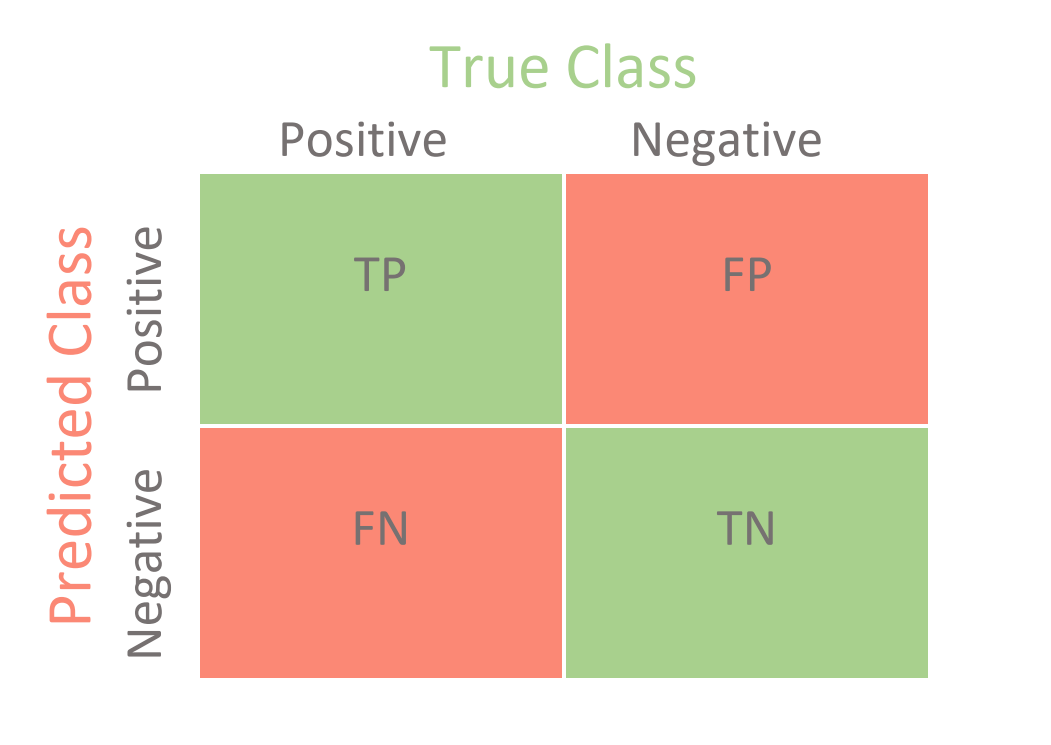

## Confusion Matrix

#### Create confusion matrix for baseline model

In [46]:
class_labels = ["No Default","Default"]
import numpy as np
from sklearn.metrics import confusion_matrix

def confusion_matrix_normalized(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    cm_train = confusion_matrix(y_train, y_train_pred, normalize='true').astype(np.float32)
    cm_test = confusion_matrix(y_test, y_test_pred, normalize='true').astype(np.float32)

    return cm_train, cm_test


# Processing pipeline

In [47]:
# Create a class to select numerical or categorical columns
from sklearn.base import BaseEstimator, TransformerMixin

# Create a transformer to select numerical or categorical columns
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.columns].values

In [48]:
def pct(x):
    return round(100*x,3)

## Tracking results in dataframe

In [49]:
try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "description",
                                   "Train Time (sec)",
                                   "Test Time (sec)", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC", 
                                   "Train F1 Score",
                                   "Valid F1 Score",
                                   "Test F1 Score"
                                  ])


In [50]:
def get_results(expLog, exp_name, description, model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test):
    expLog.loc[len(expLog)] = [f"{exp_name}", description] + list(np.round(
               [train_time, test_time, 
                accuracy_score(y_train, model.predict(X_train)), 
                accuracy_score(y_valid, model.predict(X_valid)),
                accuracy_score(y_test, model.predict(X_test)),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
                f1_score(y_train, model.predict(X_train)), 
                f1_score(y_valid, model.predict(X_valid)), 
                f1_score(y_test, model.predict(X_test))],
    4))
    return expLog


##  OHE when previously unseen unique values in the test/validation set

Train, validation and Test sets (and the leakage problem we have mentioned previously):

 

Let's look at a small usecase to tell us how to deal with this:

* The OneHotEncoder is fitted to the training set, which means that for each unique value present in the training set, for each feature, a new column is created. Let's say we have 39 columns after the encoding up from 30 (before preprocessing).
* The output is a numpy array (when the option sparse=False is used), which has the disadvantage of losing all the information about the original column names and values.
* When we try to transform the test set, after having fitted the encoder to the training set, we obtain a `ValueError`. This is because the there are new, previously unseen unique values in the test set and the encoder doesn’t know how to handle these values. In order to use both the transformed training and test sets in machine learning algorithms, we need them to have the same number of columns.

This last problem can be solved by using the option handle_unknown='ignore'of the OneHotEncoder, which, as the name suggests, will ignore previously unseen values when transforming the test set.

 

Here is a example that in action:

```python
# Identify the categorical features we wish to consider.
cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
               'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

# Notice handle_unknown="ignore" in OHE which ignore values from the validation/test that
# do NOT occur in the training set
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

```


# MACHINE LEARNING PIPELINES

## HCDR preprocessing with all columns

By opting to incorporate a variety of data sources, including the Previous Application, Installment Payments, and Credit Card Applications tables, our analysis benefits from the diversification of our dataset, circumventing the limitations posed by solely utilizing the application_train data. Given the imbalanced nature of the data, which prompted the implementation of undersampling techniques to offset the surplus of non-defaulters (those classified with a target variable of 0), leveraging additional tables with relevant features is imperative for establishing a robust predictive model. Furthermore, our correlation analysis has confirmed the salience of features contained within these other tables, further substantiating our decision to utilize this multi-faceted approach.

### Block Diagram

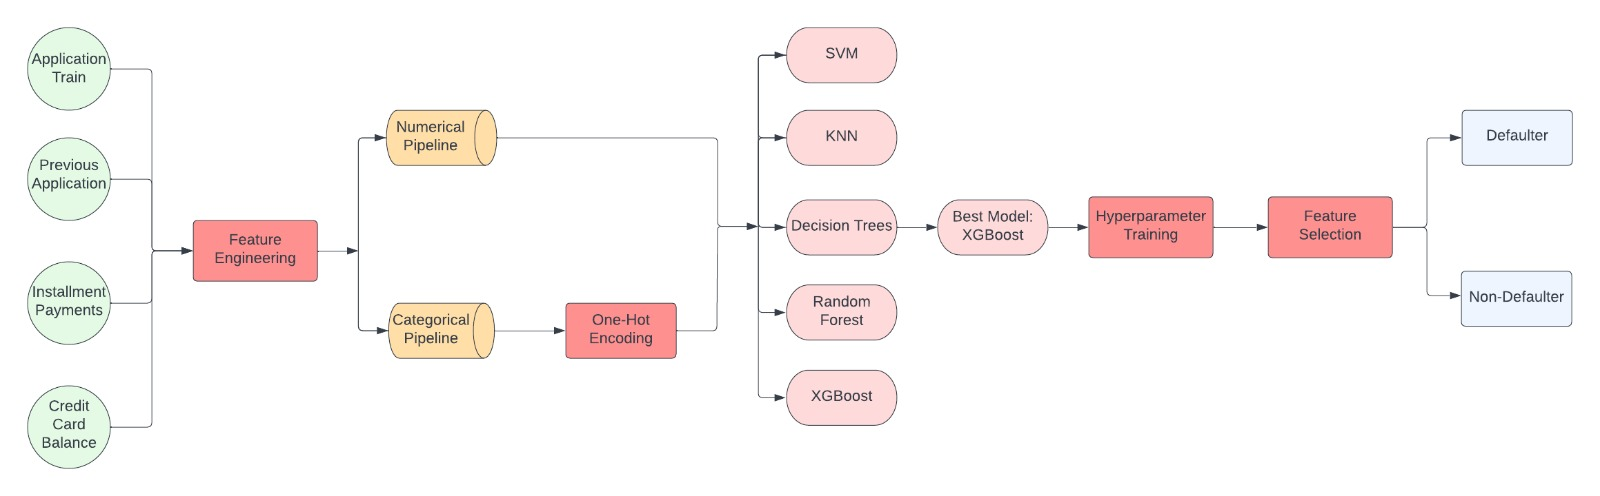

### Selecting the numerical and categorical features

In [51]:
# Load the undersampled training dataset
train_dataset = datasets["undersampled_application_train_4"]

# Separate numerical and categorical features
numerical_features = []
categorical_features = []

for feature_name in train_dataset:
    # Check if feature is numerical or categorical
    if train_dataset[feature_name].dtype in [np.float64, np.int64]:
        numerical_features.append(feature_name)
    else:
        categorical_features.append(feature_name)

# Remove target and ID columns from numerical features
numerical_features.remove('TARGET')
numerical_features.remove('SK_ID_CURR')

# Define pipelines for categorical and numerical features
categorical_pipeline = Pipeline([
    ('selector', ColumnSelector(categorical_features)),  # Select categorical features
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent category
    ('one_hot_encoder', OneHotEncoder(sparse=False, handle_unknown="ignore"))  # One-hot encode categorical features
])

numerical_pipeline = Pipeline([
    ('selector', ColumnSelector(numerical_features)),  # Select numerical features
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('standard_scaler', StandardScaler()),  # Standardize numerical features
])

# Combine pipelines for numerical and categorical features
data_prep_pipeline = FeatureUnion(transformer_list=[
    ("numerical_pipeline", numerical_pipeline),
    ("categorical_pipeline", categorical_pipeline),
])  

# Compute the total number of features, as well as the number of numerical and categorical features
selected_features = numerical_features + categorical_features + ["SK_ID_CURR"]
total_features = f"Total Features: {len(selected_features)} - Numerical: {len(numerical_features)}, Categorical: {len(categorical_features)}"

print(total_features)  # Print the total number of features and their breakdown


Total Features: 124 - Numerical: 107, Categorical: 16


## Create Train and Test Datasets

In [52]:
y_train = train_dataset['TARGET']
X_train = train_dataset[selected_features]
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_kaggle_test= X_kaggle_test[selected_features]

print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")

X train           shape: (72123, 124)
X validation      shape: (14974, 124)
X test            shape: (12728, 124)
X X_kaggle_test   shape: (48744, 124)


#  LEARNER MODELS

In order to establish a benchmark for comparison, we shall employ the utilization of a logistic regression model, which will make use of certain preprocessed features, processed by our established pipeline.

## Model-1 baseline using training columns for the application with LogisticRegression( )

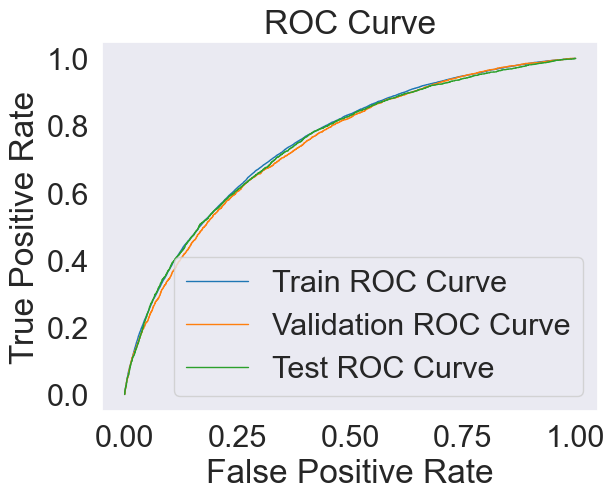

exp_name                                        description  \
0  Model-1 Baseline LR  Logistic regression with undersampled data 124...   

   Train Time (sec)  Test Time (sec)  Train Acc  Valid Acc  Test  Acc  \
0            2.3376           0.0619     0.7731     0.7666     0.7777   

   Train AUC  Valid AUC  Test  AUC  Train F1 Score  Valid F1 Score  \
0     0.7525     0.7433     0.7477          0.3586          0.3285   

   Test F1 Score  
0         0.3636

In [53]:
from sklearn.metrics import roc_curve
# Logistic Regression model with under-sampled data
np.random.seed(42)

# Define a pipeline that includes data preparation and logistic regression
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),  # Data preparation pipeline
        ("linear", LogisticRegression())  # Logistic Regression model
    ])

# Train the model and measure the training time
start_time = time.time()
model = full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time.time() - start_time, 4)

# Evaluate the model on the test set and measure the test time
start_time = time.time()
test_score = full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time.time() - start_time, 4)

# Define an experiment name based on the number of selected features
experiment_name = f"Model-1 Baseline LR"
experiment_description =f"Logistic regression with undersampled data {len(selected_features)} features"

# Log the results of the experiment
expLog = get_results(expLog, experiment_name,experiment_description, model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog


# Model Training and Validation
model.fit(X_train, y_train)

# Model Predictions
train_preds = model.predict_proba(X_train)[:, 1]
valid_preds = model.predict_proba(X_valid)[:, 1]
test_preds = model.predict_proba(X_test)[:, 1]

# Compute Metrics
train_fpr, train_tpr, _ = roc_curve(y_train, train_preds)
valid_fpr, valid_tpr, _ = roc_curve(y_valid, valid_preds)
test_fpr, test_tpr, _ = roc_curve(y_test, test_preds)
# Plot ROC Curve
plt.plot(train_fpr, train_tpr, label="Train ROC Curve")
plt.plot(valid_fpr, valid_tpr, label="Validation ROC Curve")
plt.plot(test_fpr, test_tpr, label="Test ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
expLog

## After performing correlation analysis, specific columns were selected from the "application train" dataset

In [54]:
## Model-2 baseline using training columns for the application with LogisticRegression( )

### Creating data preparation pipeline from given columns

In [55]:
def get_pipeline(num_cols = None):
    # Load the undersampled training dataset and join with additional feature datasets
    train_dataset = datasets["undersampled_application_train_2"]
    train_dataset = train_dataset.merge(datasets["previous_application_agg"], how='left', on='SK_ID_CURR')
    train_dataset = train_dataset.merge(datasets["installments_payments_agg"], how='left', on="SK_ID_CURR")
    train_dataset = train_dataset.merge(datasets["credit_card_balance_agg"], how='left', on="SK_ID_CURR")

    # Separate numerical and categorical features
    numerical_features = []
    categorical_features = []
    for feature_name in train_dataset:
        if train_dataset[feature_name].dtype in [np.float64, np.int64]:
            numerical_features.append(feature_name)
        else:
            categorical_features.append(feature_name)

    # Remove unnecessary features
    numerical_features.remove('TARGET')
    numerical_features.remove('weight')
    numerical_features.remove('SK_ID_CURR')

    # Define pipelines for categorical and numerical features
    categorical_pipeline = Pipeline([
        ('selector', ColumnSelector(categorical_features)),  # Select categorical features
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent category
        ('one_hot_encoder', OneHotEncoder(sparse=False, handle_unknown="ignore"))  # One-hot encode categorical features
    ])
    
    # If columns are provided, use only those columns for numerical pipeline
    if num_cols == None:
        final_numerical_features = numerical_features
    else:
        final_numerical_features = num_cols
        
    numerical_pipeline = Pipeline([
        ('selector', ColumnSelector(final_numerical_features)),  # Select numerical features
        ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
        ('standard_scaler', StandardScaler()),  # Standardize numerical features
    ])

    # Combine pipelines for numerical and categorical features
    data_prep_pipeline = FeatureUnion(transformer_list=[
        ("numerical_pipeline", numerical_pipeline),
        ("categorical_pipeline", categorical_pipeline),
    ])  

    # Compute the total number of features, as well as the number of numerical and categorical features
    selected_features = final_numerical_features + categorical_features + ["SK_ID_CURR"]
    total_features = f"Total Features: {len(selected_features)} - Numerical: {len(final_numerical_features)}, Categorical: {len(categorical_features)}"

    # Print the total number of features and their breakdown
    print(total_features)

    return data_prep_pipeline, selected_features


### Creating Train, Test, and Validation datasets

In [56]:
# Load the undersampled training dataset and join with additional feature datasets
train_dataset = datasets["undersampled_application_train_2"]
train_dataset = train_dataset.merge(datasets["previous_application_agg"], how='left', on='SK_ID_CURR')
train_dataset = train_dataset.merge(datasets["installments_payments_agg"], how='left', on="SK_ID_CURR")
train_dataset = train_dataset.merge(datasets["credit_card_balance_agg"], how='left', on="SK_ID_CURR")

# Select the target variable
y_train = train_dataset['TARGET']

# Select the features for the training set
X_train = train_dataset[selected_features]

# Split the data into training and validation sets
# The training set will be used to train the model, and the validation set will be used to tune hyperparameters
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

# Split the training set into training and test sets
# The training set will be used to train the model, and the test set will be used to evaluate its performance
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

# Print the shapes of the training, validation, and test sets
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_valid.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (35871, 124)
Validation set shape: (7448, 124)
Test set shape: (6331, 124)


# Model-2 baseline using LogisticRegression( )

For establishing a baseline, we shall employ certain processed features stemming from the pipeline. The logistic regression model shall serve as the rudimentary benchmark model 2 . We will use two undersampled data here .


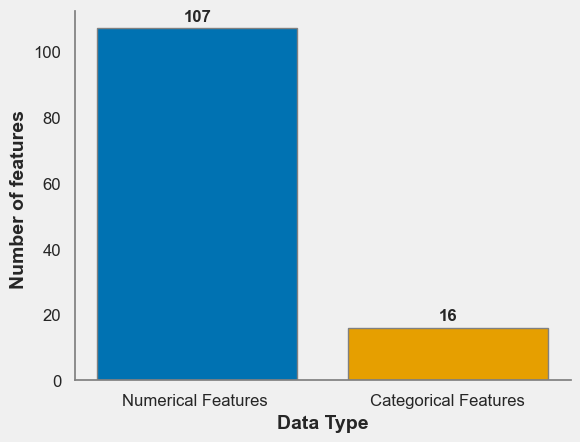

In [57]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

data = [len(numerical_features),len(categorical_features)]
labels = ['Numerical Features ', 'Categorical Features']

fig, ax = plt.subplots()
bars = ax.bar(labels, data, color=['#0072B2', '#E69F00'], edgecolor='black')

# Add shadows to the bars
for bar in bars:
    bar.set_edgecolor('gray')
    bar.set_linewidth(1)
    bar.set_zorder(0)

    # Add labels to the bars
    height = bar.get_height()
    ax.annotate(f'{height:.0f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom',
                fontsize=12, fontweight='bold')

# Customize the axis labels and ticks
ax.set_xlabel('Data Type', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of features ', fontsize=14, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)

# Customize the plot background
ax.set_facecolor('#F0F0F0')
fig.set_facecolor('#F0F0F0')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


Total Features: 124 - Numerical: 107, Categorical: 16
Cross-validation scores: [0.67953007 0.67992832 0.67905217]
Test score: 0.6904122571473701


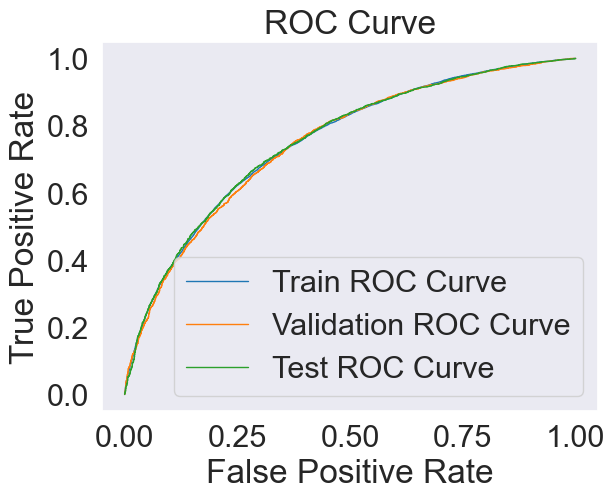

exp_name                                        description  \
0  Model-1 Baseline LR  Logistic regression with undersampled data 124...   
1  Model-2 Baseline LR  Logistic regression with undersampled data-2 1...   

   Train Time (sec)  Test Time (sec)  Train Acc  Valid Acc  Test  Acc  \
0            2.3376           0.0619     0.7731     0.7666     0.7777   
1            1.4645           0.0486     0.6876     0.6843     0.6904   

   Train AUC  Valid AUC  Test  AUC  Train F1 Score  Valid F1 Score  \
0     0.7525     0.7433     0.7477          0.3586          0.3285   
1     0.7525     0.7489     0.7535          0.6865          0.6854   

   Test F1 Score  
0         0.3636  
1         0.6900

In [58]:
# Set the random seed for reproducibility
np.random.seed(42)

# Create pipeline for preparing the data and select features
data_prep_pipeline, selected_features = get_pipeline()

# Join the preparation pipeline with logistic regression model
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("logistic_regression", LogisticRegression())
    ])

# Train the model on the training set
start = time.time()
model = full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time.time() - start, 4)

# Compute cross-validation scores
cv_splits = ShuffleSplit(n_splits=3, test_size=0.7, random_state=42)
logit_scores = cross_val_score(full_pipeline_with_predictor,X_train, y_train, cv=cv_splits)

print("Cross-validation scores:", logit_scores)

# Compute the test score
start = time.time()
test_score = full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time.time() - start, 4)

print("Test score:", test_score)

# Save the experiment results
exp_name = f"Model-2 Baseline LR"
experiment_description =f"Logistic regression with undersampled data-2 {len(selected_features)} features"
expLog = get_results(expLog, exp_name,experiment_description,model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog



# Model Training and Validation
model.fit(X_train, y_train)

# Model Predictions
train_preds = model.predict_proba(X_train)[:, 1]
valid_preds = model.predict_proba(X_valid)[:, 1]
test_preds = model.predict_proba(X_test)[:, 1]

# Compute Metrics
train_fpr, train_tpr, _ = roc_curve(y_train, train_preds)
valid_fpr, valid_tpr, _ = roc_curve(y_valid, valid_preds)
test_fpr, test_tpr, _ = roc_curve(y_test, test_preds)
# Plot ROC Curve
plt.plot(train_fpr, train_tpr, label="Train ROC Curve")
plt.plot(valid_fpr, valid_tpr, label="Validation ROC Curve")
plt.plot(test_fpr, test_tpr, label="Test ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
expLog


# Model-3 KNN model


Total Features: 124 - Numerical: 107, Categorical: 16
Test score: 0.6183857210551256


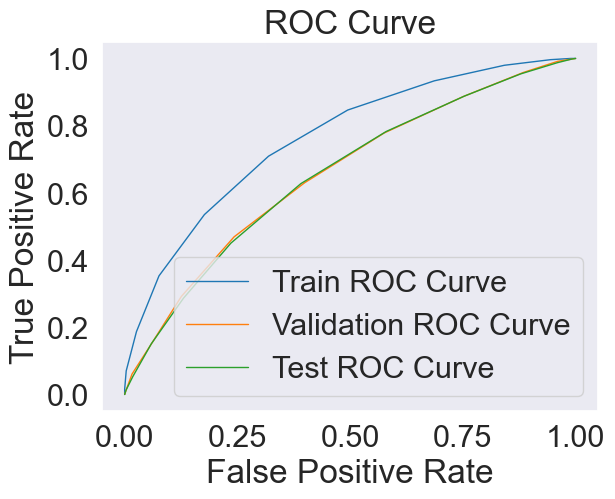

exp_name                                        description  \
0  Model-1 Baseline LR  Logistic regression with undersampled data 124...   
1  Model-2 Baseline LR  Logistic regression with undersampled data-2 1...   
2          Model-3 KNN          KNN with undersampled data-2 124 features   

   Train Time (sec)  Test Time (sec)  Train Acc  Valid Acc  Test  Acc  \
0            2.3376           0.0619     0.7731     0.7666     0.7777   
1            1.4645           0.0486     0.6876     0.6843     0.6904   
2            0.1864           0.5851     0.6950     0.6155     0.6184   

   Train AUC  Valid AUC  Test  AUC  Train F1 Score  Valid F1 Score  \
0     0.7525     0.7433     0.7477          0.3586          0.3285   
1     0.7525     0.7489     0.7535          0.6865          0.6854   
2     0.7625     0.6571     0.6550          0.6992          0.6205   

   Test F1 Score  
0         0.3636  
1         0.6900  
2         0.6226

In [59]:
from sklearn.neighbors import KNeighborsClassifier

# Set the random seed for reproducibility
np.random.seed(42)

# Create pipeline for preparing the data and select features
data_prep_pipeline, selected_features = get_pipeline()

# Join the preparation pipeline with KNN model
knn_full_pipeline_with_predictor = Pipeline([
    ("preparation", data_prep_pipeline),
    ("knn", KNeighborsClassifier(n_neighbors=11, p=2))
])

# Train the model on the training set
start = time.time()
model = knn_full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time.time() - start, 4)

# Compute the test score
start = time.time()
test_score = knn_full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time.time() - start, 4)

print("Test score:", test_score)

# Results
# Save the experiment results
exp_name = f"Model-3 KNN"
experiment_description =f"KNN with undersampled data-2 {len(selected_features)} features"
expLog = get_results(expLog, exp_name,experiment_description,model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog

# Model Training and Validation
model.fit(X_train, y_train)

# Model Predictions
train_preds = model.predict_proba(X_train)[:, 1]
valid_preds = model.predict_proba(X_valid)[:, 1]
test_preds = model.predict_proba(X_test)[:, 1]

# Compute Metrics
train_fpr, train_tpr, _ = roc_curve(y_train, train_preds)
valid_fpr, valid_tpr, _ = roc_curve(y_valid, valid_preds)
test_fpr, test_tpr, _ = roc_curve(y_test, test_preds)
# Plot ROC Curve
plt.plot(train_fpr, train_tpr, label="Train ROC Curve")
plt.plot(valid_fpr, valid_tpr, label="Validation ROC Curve")
plt.plot(test_fpr, test_tpr, label="Test ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
expLog


## Model 4 - SVM model

In [60]:
# from sklearn.svm import SVC

# # Create pipeline for preparing the data and select features
# data_prep_pipeline, selected_features = get_pipeline()

# # Join the preparation pipeline with SVM model
# svm_full_pipeline_with_predictor = Pipeline([
#     ("preparation", data_prep_pipeline),
#     ("svm", SVC(random_state=42, C=0.1, degree=1, kernel="poly", probability=True))
# ])

# # Train the model on the training set
# start = time.time()
# model = svm_full_pipeline_with_predictor.fit(X_train, y_train)
# train_time = np.round(time.time() - start, 4)

# # Compute the test score
# start = time.time()
# test_score = svm_full_pipeline_with_predictor.score(X_test, y_test)
# test_time = np.round(time.time() - start, 4)

# print("Test score:", test_score)

# # Results
# exp_name = f"SVM_undersampled2_{len(selected_features)}_features"
# expLog = get_results(expLog, exp_name, model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
# expLog


## Model 5-Decision Tree

Total Features: 124 - Numerical: 107, Categorical: 16
Test score: 0.6591
Training time: 0.784 sec
Test time: 0.0232 sec
Number of features: 124


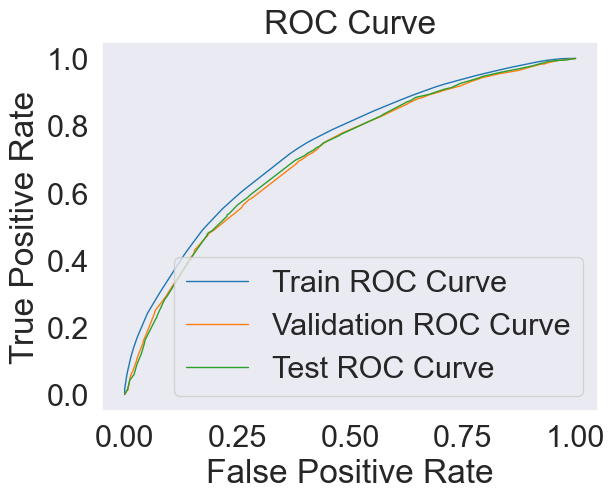

exp_name                                        description  \
0    Model-1 Baseline LR  Logistic regression with undersampled data 124...   
1    Model-2 Baseline LR  Logistic regression with undersampled data-2 1...   
2            Model-3 KNN          KNN with undersampled data-2 124 features   
3  Model-5 Decision Tree  Decision tree with undersampled data-2 124 fea...   

   Train Time (sec)  Test Time (sec)  Train Acc  Valid Acc  Test  Acc  \
0            2.3376           0.0619     0.7731     0.7666     0.7777   
1            1.4645           0.0486     0.6876     0.6843     0.6904   
2            0.1864           0.5851     0.6950     0.6155     0.6184   
3            0.7840           0.0232     0.6749     0.6535     0.6591   

   Train AUC  Valid AUC  Test  AUC  Train F1 Score  Valid F1 Score  \
0     0.7525     0.7433     0.7477          0.3586          0.3285   
1     0.7525     0.7489     0.7535          0.6865          0.6854   
2     0.7625     0.6571     0.6550          0.6992          0.6205   
3     0.7380     0.7105     0.7129          0.6881          0.6678   

   Test F1 Score  
0         0.3636  
1         0.6900  
2         0.6226  
3         0.6730

In [61]:
from sklearn.tree import DecisionTreeClassifier

np.random.seed(42)

# Create pipeline for preparing the data and select features
data_prep_pipeline, selected_features = get_pipeline()

# Join the preparation pipeline with Decision Tree model
decision_tree_full_pipeline_with_predictor = Pipeline([
    ("preparation", data_prep_pipeline),
    ("decision tree", DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=7, min_samples_leaf=5))
])

# Train the model on the training set
start = time.time()
model = decision_tree_full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time.time() - start, 4)

# Compute the test score
start = time.time()
test_score = decision_tree_full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time.time() - start, 4)

# Print the test score and other details
print(f"Test score: {test_score:.4f}")
print(f"Training time: {train_time} sec")
print(f"Test time: {test_time} sec")
#print(f"Selected features: {selected_features}")
print(f"Number of features: {len(selected_features)}")

# Results
# Save the experiment results
exp_name = f"Model-5 Decision Tree"
experiment_description =f"Decision tree with undersampled data-2 {len(selected_features)} features"
expLog = get_results(expLog, exp_name,experiment_description,model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog
# Model Training and Validation
model.fit(X_train, y_train)

# Model Predictions
train_preds = model.predict_proba(X_train)[:, 1]
valid_preds = model.predict_proba(X_valid)[:, 1]
test_preds = model.predict_proba(X_test)[:, 1]

# Compute Metrics
train_fpr, train_tpr, _ = roc_curve(y_train, train_preds)
valid_fpr, valid_tpr, _ = roc_curve(y_valid, valid_preds)
test_fpr, test_tpr, _ = roc_curve(y_test, test_preds)
# Plot ROC Curve
plt.plot(train_fpr, train_tpr, label="Train ROC Curve")
plt.plot(valid_fpr, valid_tpr, label="Validation ROC Curve")
plt.plot(test_fpr, test_tpr, label="Test ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
expLog


## Model 6- Random Forest

Total Features: 124 - Numerical: 107, Categorical: 16
Training the model...
Training time:  10.8707
Evaluating the model on the test set...
Test score:  0.6660875059232348
Test time:  0.3122


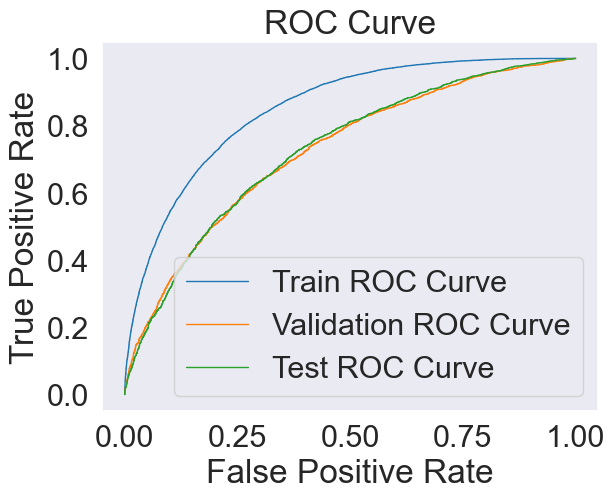

exp_name                                        description  \
0     Model-1 Baseline LR  Logistic regression with undersampled data 124...   
1     Model-2 Baseline LR  Logistic regression with undersampled data-2 1...   
2             Model-3 KNN          KNN with undersampled data-2 124 features   
3   Model-5 Decision Tree  Decision tree with undersampled data-2 124 fea...   
4  Model-6 Random Forest   Random Forest with undersampled data-2 124 fea...   

   Train Time (sec)  Test Time (sec)  Train Acc  Valid Acc  Test  Acc  \
0            2.3376           0.0619     0.7731     0.7666     0.7777   
1            1.4645           0.0486     0.6876     0.6843     0.6904   
2            0.1864           0.5851     0.6950     0.6155     0.6184   
3            0.7840           0.0232     0.6749     0.6535     0.6591   
4           10.8707           0.3122     0.7664     0.6654     0.6661   

   Train AUC  Valid AUC  Test  AUC  Train F1 Score  Valid F1 Score  \
0     0.7525     0.7433     0.7477          0.3586          0.3285   
1     0.7525     0.7489     0.7535          0.6865          0.6854   
2     0.7625     0.6571     0.6550          0.6992          0.6205   
3     0.7380     0.7105     0.7129          0.6881          0.6678   
4     0.8504     0.7243     0.7273          0.7673          0.6631   

   Test F1 Score  
0         0.3636  
1         0.6900  
2         0.6226  
3         0.6730  
4         0.6640

In [62]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Creating pipeline by joining numerical and categorical pipelines
data_prep_pipeline, selected_features = get_pipeline()

# Attaching random forest model to the above pipeline
random_forest_full_pipeline_with_predictor = Pipeline([
    ("preparation", data_prep_pipeline),
    ("random forest", RandomForestClassifier(random_state=42, bootstrap=True, max_depth=20, 
                      max_features=5, min_samples_leaf=10, min_samples_split=15, n_estimators=500))
])

# Training the model
print("Training the model...")
start_time = time.time()
model = random_forest_full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time.time() - start_time, 4)
print("Training time: ", train_time)

# Evaluate the model on the test set and measure the test time
print("Evaluating the model on the test set...")
start_time = time.time()
score_test  = random_forest_full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time.time() - start_time, 4)
print("Test score: ", score_test)
print("Test time: ", test_time)


# Results
exp_name = f"Model-6 Random Forest "
experiment_description =f"Random Forest with undersampled data-2 {len(selected_features)} features"
expLog = get_results(expLog, exp_name,experiment_description,model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog
# Model Training and Validation
model.fit(X_train, y_train)

# Model Predictions
train_preds = model.predict_proba(X_train)[:, 1]
valid_preds = model.predict_proba(X_valid)[:, 1]
test_preds = model.predict_proba(X_test)[:, 1]

# Compute Metrics
train_fpr, train_tpr, _ = roc_curve(y_train, train_preds)
valid_fpr, valid_tpr, _ = roc_curve(y_valid, valid_preds)
test_fpr, test_tpr, _ = roc_curve(y_test, test_preds)
# Plot ROC Curve
plt.plot(train_fpr, train_tpr, label="Train ROC Curve")
plt.plot(valid_fpr, valid_tpr, label="Validation ROC Curve")
plt.plot(test_fpr, test_tpr, label="Test ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
expLog

## Model 7- Extra Trees 

Total Features: 124 - Numerical: 107, Categorical: 16


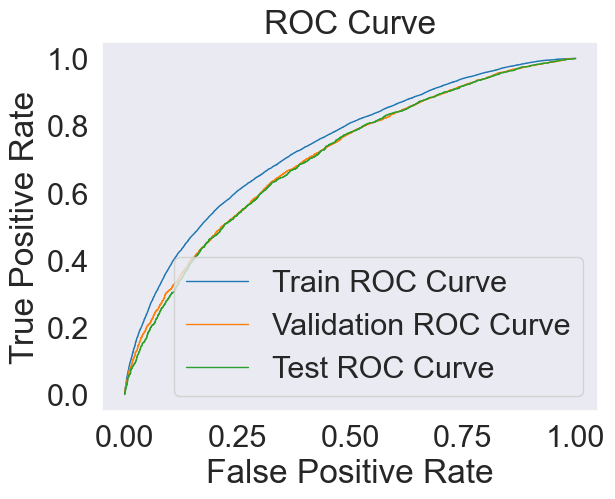

exp_name                                        description  \
0     Model-1 Baseline LR  Logistic regression with undersampled data 124...   
1     Model-2 Baseline LR  Logistic regression with undersampled data-2 1...   
2             Model-3 KNN          KNN with undersampled data-2 124 features   
3   Model-5 Decision Tree  Decision tree with undersampled data-2 124 fea...   
4  Model-6 Random Forest   Random Forest with undersampled data-2 124 fea...   
5    Model-7 Extra Trees   Extra Trees with undersampled data-2 124 features   

   Train Time (sec)  Test Time (sec)  Train Acc  Valid Acc  Test  Acc  \
0            2.3376           0.0619     0.7731     0.7666     0.7777   
1            1.4645           0.0486     0.6876     0.6843     0.6904   
2            0.1864           0.5851     0.6950     0.6155     0.6184   
3            0.7840           0.0232     0.6749     0.6535     0.6591   
4           10.8707           0.3122     0.7664     0.6654     0.6661   
5            1.4820           0.0905     0.6738     0.6502     0.6482   

   Train AUC  Valid AUC  Test  AUC  Train F1 Score  Valid F1 Score  \
0     0.7525     0.7433     0.7477          0.3586          0.3285   
1     0.7525     0.7489     0.7535          0.6865          0.6854   
2     0.7625     0.6571     0.6550          0.6992          0.6205   
3     0.7380     0.7105     0.7129          0.6881          0.6678   
4     0.8504     0.7243     0.7273          0.7673          0.6631   
5     0.7405     0.7059     0.7023          0.6771          0.6559   

   Test F1 Score  
0         0.3636  
1         0.6900  
2         0.6226  
3         0.6730  
4         0.6640  
5         0.6536

In [63]:
from sklearn.ensemble import ExtraTreesClassifier

np.random.seed(42)

# creating pipeline by joining numerical and categorical pipelines
data_prep_pipeline, selected_features = get_pipeline()

# Attaching Extra-Trees model to the above pipeline
extra_trees_full_pipeline_with_predictor = Pipeline([
    ("preparation", data_prep_pipeline),
    ("extra trees", ExtraTreesClassifier(random_state=42, bootstrap=True, max_depth=20, 
                      max_features=5, min_samples_leaf=10, min_samples_split=15, n_estimators=500,n_jobs=-1))
])

# Training the model
start = time.time()
model = extra_trees_full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time.time() - start, 4)

start = time.time()
score_test  = extra_trees_full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time.time() - start, 4)

# Results
exp_name = f"Model-7 Extra Trees "
experiment_description =f"Extra Trees with undersampled data-2 {len(selected_features)} features"
expLog = get_results(expLog, exp_name,experiment_description,model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog

# Model Training and Validation
model.fit(X_train, y_train)

# Model Predictions
train_preds = model.predict_proba(X_train)[:, 1]
valid_preds = model.predict_proba(X_valid)[:, 1]
test_preds = model.predict_proba(X_test)[:, 1]

# Compute Metrics
train_fpr, train_tpr, _ = roc_curve(y_train, train_preds)
valid_fpr, valid_tpr, _ = roc_curve(y_valid, valid_preds)
test_fpr, test_tpr, _ = roc_curve(y_test, test_preds)
# Plot ROC Curve
plt.plot(train_fpr, train_tpr, label="Train ROC Curve")
plt.plot(valid_fpr, valid_tpr, label="Validation ROC Curve")
plt.plot(test_fpr, test_tpr, label="Test ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
expLog


## Model 8-Bagging Meta Estimator 

Total Features: 124 - Numerical: 107, Categorical: 16


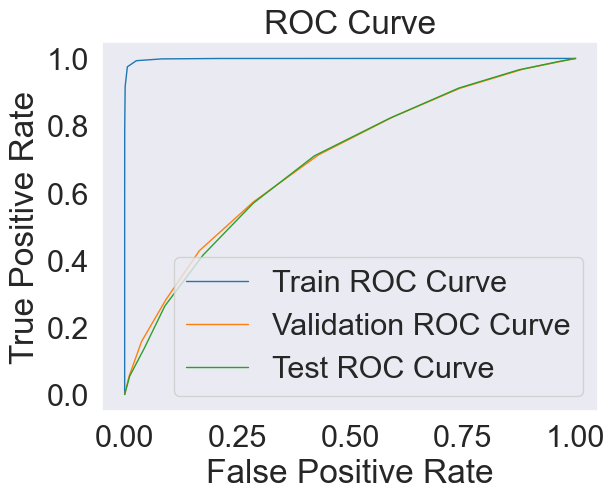

exp_name  \
0              Model-1 Baseline LR   
1              Model-2 Baseline LR   
2                      Model-3 KNN   
3            Model-5 Decision Tree   
4           Model-6 Random Forest    
5             Model-7 Extra Trees    
6  Model-8 Bagging Meta Estimator    

                                         description  Train Time (sec)  \
0  Logistic regression with undersampled data 124...            2.3376   
1  Logistic regression with undersampled data-2 1...            1.4645   
2          KNN with undersampled data-2 124 features            0.1864   
3  Decision tree with undersampled data-2 124 fea...            0.7840   
4  Random Forest with undersampled data-2 124 fea...           10.8707   
5  Extra Trees with undersampled data-2 124 features            1.4820   
6  Bagging Meta Estimator with undersampled data-...            2.7168   

   Test Time (sec)  Train Acc  Valid Acc  Test  Acc  Train AUC  Valid AUC  \
0           0.0619     0.7731     0.7666     0.7777     0.7525     0.7433   
1           0.0486     0.6876     0.6843     0.6904     0.7525     0.7489   
2           0.5851     0.6950     0.6155     0.6184     0.7625     0.6571   
3           0.0232     0.6749     0.6535     0.6591     0.7380     0.7105   
4           0.3122     0.7664     0.6654     0.6661     0.8504     0.7243   
5           0.0905     0.6738     0.6502     0.6482     0.7405     0.7059   
6           0.1855     0.9844     0.6477     0.6446     0.9990     0.6978   

   Test  AUC  Train F1 Score  Valid F1 Score  Test F1 Score  
0     0.7477          0.3586          0.3285         0.3636  
1     0.7535          0.6865          0.6854         0.6900  
2     0.6550          0.6992          0.6205         0.6226  
3     0.7129          0.6881          0.6678         0.6730  
4     0.7273          0.7673          0.6631         0.6640  
5     0.7023          0.6771          0.6559         0.6536  
6     0.6983          0.9842          0.6210         0.6164

In [64]:
from sklearn.ensemble import BaggingClassifier

np.random.seed(42)

# creating pipeline by joining numerical and categorical pipelines
data_prep_pipeline, selected_features = get_pipeline()

# Attaching bagging meta-estimator to the above pipeline
bagging_full_pipeline_with_predictor = Pipeline([
    ("preparation", data_prep_pipeline),
    ("bagging", BaggingClassifier(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, 
                                   bootstrap=True, bootstrap_features=False, n_jobs=-1, random_state=None, 
                                   verbose=0, warm_start=False))
])

# Training the model
start = time.time()
model = bagging_full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time.time() - start, 4)

start = time.time()
score_test  = bagging_full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time.time() - start, 4)

# Results
exp_name = f"Model-8 Bagging Meta Estimator "
experiment_description =f"Bagging Meta Estimator with undersampled data-2 {len(selected_features)} features"
expLog = get_results(expLog, exp_name,experiment_description,model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog




# Model Training and Validation
model.fit(X_train, y_train)

# Model Predictions
train_preds = model.predict_proba(X_train)[:, 1]
valid_preds = model.predict_proba(X_valid)[:, 1]
test_preds = model.predict_proba(X_test)[:, 1]

# Compute Metrics
train_fpr, train_tpr, _ = roc_curve(y_train, train_preds)
valid_fpr, valid_tpr, _ = roc_curve(y_valid, valid_preds)
test_fpr, test_tpr, _ = roc_curve(y_test, test_preds)
# Plot ROC Curve
plt.plot(train_fpr, train_tpr, label="Train ROC Curve")
plt.plot(valid_fpr, valid_tpr, label="Validation ROC Curve")
plt.plot(test_fpr, test_tpr, label="Test ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
expLog


## Model 9 - ADABOOST SAMME

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

# Define data preparation pipeline
data_prep_pipeline, selected_features = get_pipeline()

# Define base estimator
base_estimator = DecisionTreeClassifier(max_depth=5)

# Define AdaBoost classifier with SAMME using Bagging and enable parallelization
adaboost_full_pipeline_with_predictor = Pipeline([
    ("preparation", data_prep_pipeline),
    ("Bagging", BaggingClassifier(base_estimator=AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, learning_rate=1.0, algorithm='SAMME', 
                                     random_state=None), n_jobs=-1))
])

# Train AdaBoost classifier and log results
start = time.time()
model = adaboost_full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time.time() - start, 4)

start = time.time()
score_test  = adaboost_full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time.time() - start, 4)

# Results
exp_name = f"Model-9 ADABoost SAMME "
experiment_description =f"ADABoost SAMME with undersampled data-2 {len(selected_features)} features"
expLog = get_results(expLog, exp_name,experiment_description,model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
#expLog



Total Features: 124 - Numerical: 107, Categorical: 16


/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  

/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(s

/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(s

/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(s

/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(s

/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(s

/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(s

/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(s

/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(s

/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(s

/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  

/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(s

/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(s

/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(s

/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(s

/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(s

/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(s

/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(s

/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(s

/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(s

/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:677: RuntimeWarning: divide by zero encountered in log
  np.log(sample_weight)


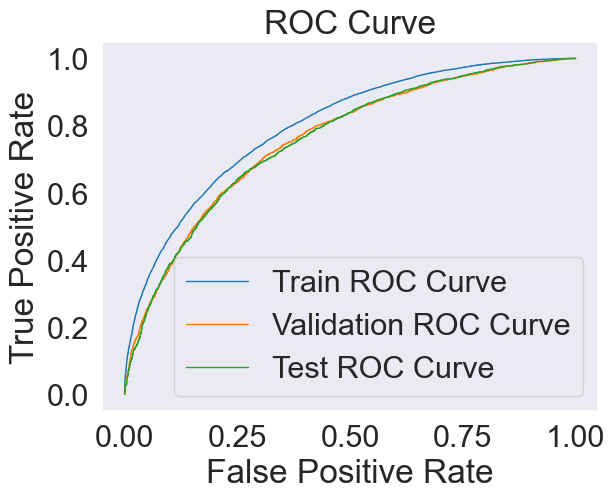

exp_name  \
0              Model-1 Baseline LR   
1              Model-2 Baseline LR   
2                      Model-3 KNN   
3            Model-5 Decision Tree   
4           Model-6 Random Forest    
5             Model-7 Extra Trees    
6  Model-8 Bagging Meta Estimator    
7          Model-9 ADABoost SAMME    

                                         description  Train Time (sec)  \
0  Logistic regression with undersampled data 124...            2.3376   
1  Logistic regression with undersampled data-2 1...            1.4645   
2          KNN with undersampled data-2 124 features            0.1864   
3  Decision tree with undersampled data-2 124 fea...            0.7840   
4  Random Forest with undersampled data-2 124 fea...           10.8707   
5  Extra Trees with undersampled data-2 124 features            1.4820   
6  Bagging Meta Estimator with undersampled data-...            2.7168   
7  ADABoost SAMME with undersampled data-2 124 fe...           22.8602   

   Test Time (sec)  Train Acc  Valid Acc  Test  Acc  Train AUC  Valid AUC  \
0           0.0619     0.7731     0.7666     0.7777     0.7525     0.7433   
1           0.0486     0.6876     0.6843     0.6904     0.7525     0.7489   
2           0.5851     0.6950     0.6155     0.6184     0.7625     0.6571   
3           0.0232     0.6749     0.6535     0.6591     0.7380     0.7105   
4           0.3122     0.7664     0.6654     0.6661     0.8504     0.7243   
5           0.0905     0.6738     0.6502     0.6482     0.7405     0.7059   
6           0.1855     0.9844     0.6477     0.6446     0.9990     0.6978   
7           0.3029     0.7185     0.6966     0.6950     0.7989     0.7580   

   Test  AUC  Train F1 Score  Valid F1 Score  Test F1 Score  
0     0.7477          0.3586          0.3285         0.3636  
1     0.7535          0.6865          0.6854         0.6900  
2     0.6550          0.6992          0.6205         0.6226  
3     0.7129          0.6881          0.6678         0.6730  
4     0.7273          0.7673          0.6631         0.6640  
5     0.7023          0.6771          0.6559         0.6536  
6     0.6983          0.9842          0.6210         0.6164  
7     0.7594          0.7174          0.6971         0.6948

In [66]:
# Model Training and Validation
model.fit(X_train, y_train)

# Model Predictions
train_preds = model.predict_proba(X_train)[:, 1]
valid_preds = model.predict_proba(X_valid)[:, 1]
test_preds = model.predict_proba(X_test)[:, 1]

# Compute Metrics
train_fpr, train_tpr, _ = roc_curve(y_train, train_preds)
valid_fpr, valid_tpr, _ = roc_curve(y_valid, valid_preds)
test_fpr, test_tpr, _ = roc_curve(y_test, test_preds)
# Plot ROC Curve
plt.plot(train_fpr, train_tpr, label="Train ROC Curve")
plt.plot(valid_fpr, valid_tpr, label="Validation ROC Curve")
plt.plot(test_fpr, test_tpr, label="Test ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
expLog

In [67]:
expLog

exp_name  \
0              Model-1 Baseline LR   
1              Model-2 Baseline LR   
2                      Model-3 KNN   
3            Model-5 Decision Tree   
4           Model-6 Random Forest    
5             Model-7 Extra Trees    
6  Model-8 Bagging Meta Estimator    
7          Model-9 ADABoost SAMME    

                                         description  Train Time (sec)  \
0  Logistic regression with undersampled data 124...            2.3376   
1  Logistic regression with undersampled data-2 1...            1.4645   
2          KNN with undersampled data-2 124 features            0.1864   
3  Decision tree with undersampled data-2 124 fea...            0.7840   
4  Random Forest with undersampled data-2 124 fea...           10.8707   
5  Extra Trees with undersampled data-2 124 features            1.4820   
6  Bagging Meta Estimator with undersampled data-...            2.7168   
7  ADABoost SAMME with undersampled data-2 124 fe...           22.8602   

   Test Time (sec)  Train Acc  Valid Acc  Test  Acc  Train AUC  Valid AUC  \
0           0.0619     0.7731     0.7666     0.7777     0.7525     0.7433   
1           0.0486     0.6876     0.6843     0.6904     0.7525     0.7489   
2           0.5851     0.6950     0.6155     0.6184     0.7625     0.6571   
3           0.0232     0.6749     0.6535     0.6591     0.7380     0.7105   
4           0.3122     0.7664     0.6654     0.6661     0.8504     0.7243   
5           0.0905     0.6738     0.6502     0.6482     0.7405     0.7059   
6           0.1855     0.9844     0.6477     0.6446     0.9990     0.6978   
7           0.3029     0.7185     0.6966     0.6950     0.7989     0.7580   

   Test  AUC  Train F1 Score  Valid F1 Score  Test F1 Score  
0     0.7477          0.3586          0.3285         0.3636  
1     0.7535          0.6865          0.6854         0.6900  
2     0.6550          0.6992          0.6205         0.6226  
3     0.7129          0.6881          0.6678         0.6730  
4     0.7273          0.7673          0.6631         0.6640  
5     0.7023          0.6771          0.6559         0.6536  
6     0.6983          0.9842          0.6210         0.6164  
7     0.7594          0.7174          0.6971         0.6948

## Model 10 - XGBoost

Total Features: 124 - Numerical: 107, Categorical: 16


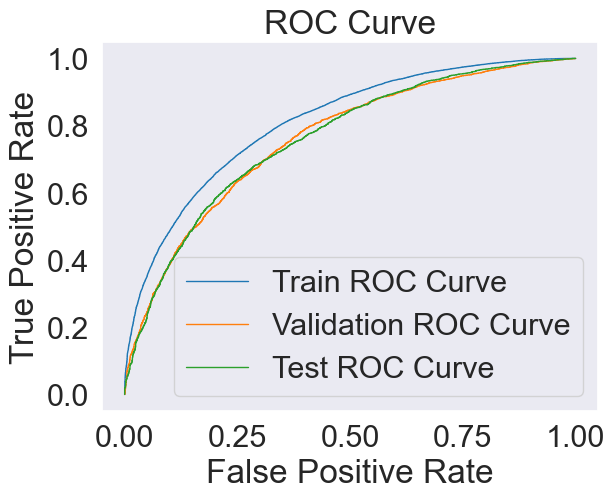

exp_name  \
0   Baseline_undersampled1_124_features   
1                   Model-1 Baseline LR   
2                   Model-2 Baseline LR   
3                           Model-3 KNN   
4                  Model-5 Baseline KNN   
5                Model-5 Random Forest    
6                  Model-6 Extra Trees    
7                  Model-7 Extra Trees    
8       Model-8 Bagging Meta Estimator    
9               Model-9 ADABoost SAMME    
10                  Model-11 ADABoost     
11                  Model-12 CATBoost     
12                   Model-10 XGBoost     
13                   Model-10 XGBoost     

                                          description  Train Time (sec)  \
0                 Baseline_undersampled1_124_features            2.1989   
1   Logistic regression with undersampled data 124...            2.4495   
2   Logistic regression with undersampled data-2 1...            1.3669   
3           KNN with undersampled data-2 124 features            0.1888   
4   Decision tree with undersampled data-2 124 fea...            0.8050   
5   Random Forest with undersampled data-2 124 fea...           10.9049   
6   Extra Trees with undersampled data-2 124 features            1.3018   
7   Extra Trees with undersampled data-2 124 features            1.3846   
8   Bagging Meta Estimator with undersampled data-...            2.5269   
9   ADABoost SAMME with undersampled data-2 124 fe...           24.1679   
10  ADABoost SAMME with undersampled data-2 124 fe...          124.1598   
11  CATBoost SAMME with undersampled data-2 124 fe...            7.1576   
12  XGBoost SAMME with undersampled data-2 124 fea...           24.6309   
13  XGBoost SAMME with undersampled data-2 124 fea...           22.5526   

    Test Time (sec)  Train Acc  Valid Acc  Test  Acc  Train AUC  Valid AUC  \
0            0.0676     0.7744     0.7673     0.7784     0.7548     0.7427   
1            0.0561     0.7744     0.7673     0.7784     0.7548     0.7427   
2            0.0458     0.6876     0.6843     0.6904     0.7525     0.7489   
3            0.6119     0.6950     0.6155     0.6184     0.7625     0.6571   
4            0.0233     0.6749     0.6535     0.6591     0.7380     0.7105   
5            0.3207     0.7664     0.6654     0.6661     0.8504     0.7243   
6            0.0993     0.6738     0.6502     0.6482     0.7405     0.7059   
7            0.1044     0.6738     0.6502     0.6482     0.7405     0.7059   
8            0.1712     0.9844     0.6477     0.6446     0.9990     0.6978   
9            0.3530     0.7185     0.6966     0.6950     0.7989     0.7580   
10           2.8513     0.6774     0.6776     0.6771     0.7388     0.7402   
11           0.2061     0.6964     0.6904     0.6926     0.7671     0.7580   
12           0.0353     0.7312     0.6937     0.6940     0.8116     0.7612   
13           0.0354     0.7312     0.6937     0.6940     0.8116     0.7612   

    Test  AUC  Train F1 Score  Valid F1 Score  Test F1 Score  
0      0.7496          0.3638          0.3363         0.3660  
1      0.7496          0.3638          0.3363         0.3660  
2      0.7535          0.6865          0.6854         0.6900  
3      0.6550          0.6992          0.6205         0.6226  
4      0.7129          0.6881          0.6678         0.6730  
5      0.7273          0.7673          0.6631         0.6640  
6      0.7023          0.6771          0.6559         0.6536  
7      0.7023          0.6771          0.6559         0.6536  
8      0.6983          0.9842          0.6210         0.6164  
9      0.7594          0.7174          0.6971         0.6948  
10     0.7398          0.6749          0.6740         0.6725  
11     0.7591          0.6954          0.6901         0.6906  
12     0.7611          0.7308          0.6935         0.6935  
13     0.7611          0.7308          0.6935         0.6935

In [72]:
np.random.seed(42)

# creating pipeline by joining numerical and categorical pipelines
data_prep_pipeline, selected_features = get_pipeline()

# Attaching XGBoost model to the above pipeline
xgboost_full_pipeline_with_predictor = Pipeline([
    ("preparation", data_prep_pipeline),
    ("xgboost", XGBClassifier(random_state=42, 
                objective='binary:logistic', max_depth=5, eta=0.001, 
                learning_rate=0.01, colsample_bytree=0.7, n_estimators=1000))
])

# Training the model
start = time.time()
model = xgboost_full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time.time() - start, 4)

start = time.time()
score_test  = xgboost_full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time.time() - start, 4)

# Results
exp_name = f"Model-10 XGBoost  "
experiment_description =f"XGBoost SAMME with undersampled data-2 {len(selected_features)} features"
expLog = get_results(expLog, exp_name,experiment_description,model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog


# Model Training and Validation
model.fit(X_train, y_train)

# Model Predictions
train_preds = model.predict_proba(X_train)[:, 1]
valid_preds = model.predict_proba(X_valid)[:, 1]
test_preds = model.predict_proba(X_test)[:, 1]

# Compute Metrics
train_fpr, train_tpr, _ = roc_curve(y_train, train_preds)
valid_fpr, valid_tpr, _ = roc_curve(y_valid, valid_preds)
test_fpr, test_tpr, _ = roc_curve(y_test, test_preds)
# Plot ROC Curve
plt.plot(train_fpr, train_tpr, label="Train ROC Curve")
plt.plot(valid_fpr, valid_tpr, label="Validation ROC Curve")
plt.plot(test_fpr, test_tpr, label="Test ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
expLog

## Model 11-ADABOOST 

Total Features: 124 - Numerical: 107, Categorical: 16


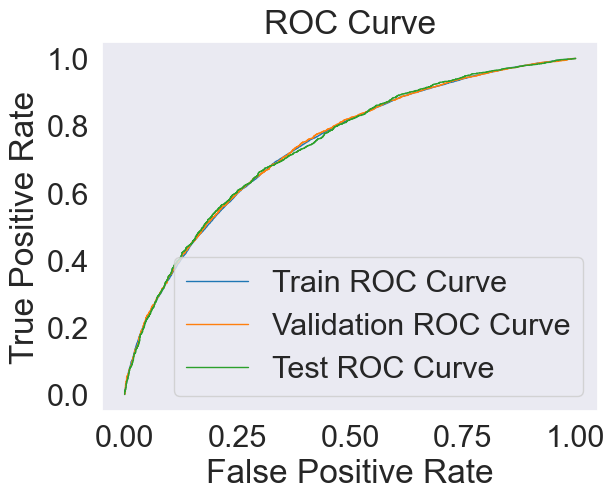

exp_name  \
0   Baseline_undersampled1_124_features   
1                   Model-1 Baseline LR   
2                   Model-2 Baseline LR   
3                           Model-3 KNN   
4                  Model-5 Baseline KNN   
5                Model-5 Random Forest    
6                  Model-6 Extra Trees    
7                  Model-7 Extra Trees    
8       Model-8 Bagging Meta Estimator    
9               Model-9 ADABoost SAMME    
10                  Model-11 ADABoost     
11                  Model-12 CATBoost     
12                   Model-10 XGBoost     
13                   Model-10 XGBoost     
14                  Model-11 ADABoost     

                                          description  Train Time (sec)  \
0                 Baseline_undersampled1_124_features            2.1989   
1   Logistic regression with undersampled data 124...            2.4495   
2   Logistic regression with undersampled data-2 1...            1.3669   
3           KNN with undersampled data-2 124 features            0.1888   
4   Decision tree with undersampled data-2 124 fea...            0.8050   
5   Random Forest with undersampled data-2 124 fea...           10.9049   
6   Extra Trees with undersampled data-2 124 features            1.3018   
7   Extra Trees with undersampled data-2 124 features            1.3846   
8   Bagging Meta Estimator with undersampled data-...            2.5269   
9   ADABoost SAMME with undersampled data-2 124 fe...           24.1679   
10  ADABoost SAMME with undersampled data-2 124 fe...          124.1598   
11  CATBoost SAMME with undersampled data-2 124 fe...            7.1576   
12  XGBoost SAMME with undersampled data-2 124 fea...           24.6309   
13  XGBoost SAMME with undersampled data-2 124 fea...           22.5526   
14  ADABoost SAMME with undersampled data-2 124 fe...          116.3467   

    Test Time (sec)  Train Acc  Valid Acc  Test  Acc  Train AUC  Valid AUC  \
0            0.0676     0.7744     0.7673     0.7784     0.7548     0.7427   
1            0.0561     0.7744     0.7673     0.7784     0.7548     0.7427   
2            0.0458     0.6876     0.6843     0.6904     0.7525     0.7489   
3            0.6119     0.6950     0.6155     0.6184     0.7625     0.6571   
4            0.0233     0.6749     0.6535     0.6591     0.7380     0.7105   
5            0.3207     0.7664     0.6654     0.6661     0.8504     0.7243   
6            0.0993     0.6738     0.6502     0.6482     0.7405     0.7059   
7            0.1044     0.6738     0.6502     0.6482     0.7405     0.7059   
8            0.1712     0.9844     0.6477     0.6446     0.9990     0.6978   
9            0.3530     0.7185     0.6966     0.6950     0.7989     0.7580   
10           2.8513     0.6774     0.6776     0.6771     0.7388     0.7402   
11           0.2061     0.6964     0.6904     0.6926     0.7671     0.7580   
12           0.0353     0.7312     0.6937     0.6940     0.8116     0.7612   
13           0.0354     0.7312     0.6937     0.6940     0.8116     0.7612   
14           2.8445     0.6774     0.6776     0.6771     0.7388     0.7402   

    Test  AUC  Train F1 Score  Valid F1 Score  Test F1 Score  
0      0.7496          0.3638          0.3363         0.3660  
1      0.7496          0.3638          0.3363         0.3660  
2      0.7535          0.6865          0.6854         0.6900  
3      0.6550          0.6992          0.6205         0.6226  
4      0.7129          0.6881          0.6678         0.6730  
5      0.7273          0.7673          0.6631         0.6640  
6      0.7023          0.6771          0.6559         0.6536  
7      0.7023          0.6771          0.6559         0.6536  
8      0.6983          0.9842          0.6210         0.6164  
9      0.7594          0.7174          0.6971         0.6948  
10     0.7398          0.6749          0.6740         0.6725  
11     0.7591          0.6954          0.6901         0.6906  
12     0.7611          0.7308          0.6935         0.6935  
13     0.7

In [73]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.utils import parallel_backend
from joblib import parallel_backend

np.random.seed(42)

# creating pipeline by joining numerical and categorical pipelines
data_prep_pipeline, selected_features = get_pipeline()

# Define base estimator
base_estimator = AdaBoostClassifier(random_state=42, n_estimators=1000, learning_rate=0.01)

# Enable parallelization with Bagging
with parallel_backend('multiprocessing', n_jobs=10):
    adaboost_full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("Bagging", BaggingClassifier(base_estimator=base_estimator, n_jobs=-1))
    ])

# Training the model
start = time.time()
model = adaboost_full_pipeline_with_predictor.fit(X_train, y_train) 
train_time = np.round(time.time() - start, 4)

start = time.time()
score_test = adaboost_full_pipeline_with_predictor.score(X_test, y_test) 
test_time = np.round(time.time() - start, 4)

# Results
exp_name = f"Model-11 ADABoost  "
experiment_description =f"ADABoost SAMME with undersampled data-2 {len(selected_features)} features"
expLog = get_results(expLog, exp_name,experiment_description,model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog


# Model Training and Validation
model.fit(X_train, y_train)

# Model Predictions
train_preds = model.predict_proba(X_train)[:, 1]
valid_preds = model.predict_proba(X_valid)[:, 1]
test_preds = model.predict_proba(X_test)[:, 1]

# Compute Metrics
train_fpr, train_tpr, _ = roc_curve(y_train, train_preds)
valid_fpr, valid_tpr, _ = roc_curve(y_valid, valid_preds)
test_fpr, test_tpr, _ = roc_curve(y_test, test_preds)
# Plot ROC Curve
plt.plot(train_fpr, train_tpr, label="Train ROC Curve")
plt.plot(valid_fpr, valid_tpr, label="Validation ROC Curve")
plt.plot(test_fpr, test_tpr, label="Test ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
expLog


## Model 12 - CatBoost

Total Features: 124 - Numerical: 107, Categorical: 16


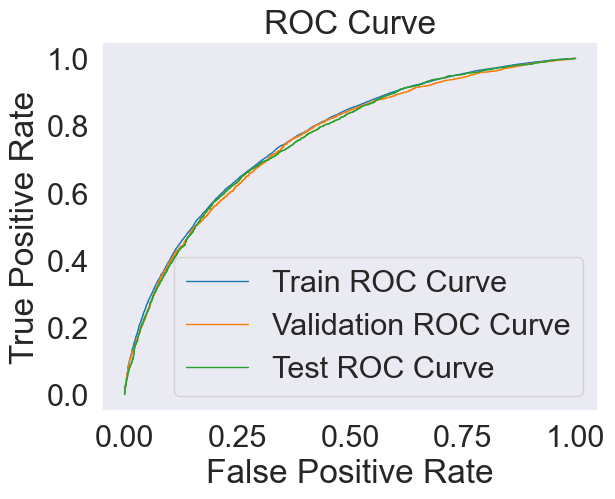

exp_name  \
0              Model-1 Baseline LR   
1              Model-2 Baseline LR   
2                      Model-3 KNN   
3            Model-5 Decision Tree   
4           Model-6 Random Forest    
5             Model-7 Extra Trees    
6  Model-8 Bagging Meta Estimator    
7          Model-9 ADABoost SAMME    
8              Model-12 CATBoost     

                                         description  Train Time (sec)  \
0  Logistic regression with undersampled data 124...            2.3376   
1  Logistic regression with undersampled data-2 1...            1.4645   
2          KNN with undersampled data-2 124 features            0.1864   
3  Decision tree with undersampled data-2 124 fea...            0.7840   
4  Random Forest with undersampled data-2 124 fea...           10.8707   
5  Extra Trees with undersampled data-2 124 features            1.4820   
6  Bagging Meta Estimator with undersampled data-...            2.7168   
7  ADABoost SAMME with undersampled data-2 124 fe...           22.8602   
8  CATBoost SAMME with undersampled data-2 124 fe...            6.4653   

   Test Time (sec)  Train Acc  Valid Acc  Test  Acc  Train AUC  Valid AUC  \
0           0.0619     0.7731     0.7666     0.7777     0.7525     0.7433   
1           0.0486     0.6876     0.6843     0.6904     0.7525     0.7489   
2           0.5851     0.6950     0.6155     0.6184     0.7625     0.6571   
3           0.0232     0.6749     0.6535     0.6591     0.7380     0.7105   
4           0.3122     0.7664     0.6654     0.6661     0.8504     0.7243   
5           0.0905     0.6738     0.6502     0.6482     0.7405     0.7059   
6           0.1855     0.9844     0.6477     0.6446     0.9990     0.6978   
7           0.3029     0.7185     0.6966     0.6950     0.7989     0.7580   
8           0.1827     0.6964     0.6904     0.6926     0.7671     0.7580   

   Test  AUC  Train F1 Score  Valid F1 Score  Test F1 Score  
0     0.7477          0.3586          0.3285         0.3636  
1     0.7535          0.6865          0.6854         0.6900  
2     0.6550          0.6992          0.6205         0.6226  
3     0.7129          0.6881          0.6678         0.6730  
4     0.7273          0.7673          0.6631         0.6640  
5     0.7023          0.6771          0.6559         0.6536  
6     0.6983          0.9842          0.6210         0.6164  
7     0.7594          0.7174          0.6971         0.6948  
8     0.7591          0.6954          0.6901         0.6906

In [68]:
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
import numpy as np
import time

np.random.seed(42)

# creating pipeline by joining numerical and categorical pipelines
data_prep_pipeline, selected_features = get_pipeline()

# Attaching CatBoost model to the above pipeline
catboost_full_pipeline_with_predictor = Pipeline([
    ("preparation", data_prep_pipeline),
    ("catboost", CatBoostClassifier(random_state=42, iterations=1000, learning_rate=0.01,
                                    depth=5, thread_count=-1, verbose=False))
])

# Training the model
start = time.time()
model = catboost_full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time.time() - start, 4)

start = time.time()
score_test = catboost_full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time.time() - start, 4)

# Results
exp_name = f"Model-12 CATBoost  "
experiment_description =f"CATBoost SAMME with undersampled data-2 {len(selected_features)} features"
expLog = get_results(expLog, exp_name,experiment_description,model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog
# Model Training and Validation
model.fit(X_train, y_train)

# Model Predictions
train_preds = model.predict_proba(X_train)[:, 1]
valid_preds = model.predict_proba(X_valid)[:, 1]
test_preds = model.predict_proba(X_test)[:, 1]

# Compute Metrics
train_fpr, train_tpr, _ = roc_curve(y_train, train_preds)
valid_fpr, valid_tpr, _ = roc_curve(y_valid, valid_preds)
test_fpr, test_tpr, _ = roc_curve(y_test, test_preds)
# Plot ROC Curve
plt.plot(train_fpr, train_tpr, label="Train ROC Curve")
plt.plot(valid_fpr, valid_tpr, label="Validation ROC Curve")
plt.plot(test_fpr, test_tpr, label="Test ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
expLog

# Selecting 3 best learners , hyper parameter tuning , and ensemble learner 

## HYPERPARMETER TUNING AND FEATURE SELECTION

### XGBOOST Hyper paramter Tuning and feature selection 

In [72]:
def pct(x):
    return round(100*x,3)

In [120]:
results = pd.DataFrame(columns=["ExpID", "Cross-fold Train Accuracy", "Test Accuracy", "p-value", "Train Time(s)", "Test Time(s)", "Experiment Description"])
features_dict = dict()

# A Function to execute the grid search and record the results.
def ConductGridSearch(X_train, y_train, X_test, y_test):
    # classifier for our grid search experiment
    classifiers = [
#         ('DecisionTrees', DecisionTreeClassifier(random_state=42))
        ('XGBoost', XGBClassifier(random_state=42))
    ]
    
    # grid search parameters for the classifier
    param_grid = {

       'XGBoost':  {
            'max_depth': [5,9], # Lower helps with overfitting
            'n_estimators':[800, 1000],
            'learning_rate': [0.001, 0.01],
            'eta' : [0.001, 0.01],
            'colsample_bytree' : [0.5, 0.7], 
        }
    }
    
#         # grid search parameters for the classifier
#     param_grid = {

#        'XGBoost':  {
#             'max_depth': [5], # Lower helps with overfitting
#             'n_estimators':[20],
#             'learning_rate': [ 0.1],
#             'eta' : [0.1],
#             'colsample_bytree' : [0.5], 
#         }
#     }
    
    for (name, classifier) in classifiers:
        
        print('****** STARTING TUNING', name,'*****')
        parameters = param_grid[name]
        print("Parameters:")
        for p in sorted(parameters.keys()):
            print("\t"+str(p)+": "+ str(parameters[p]))
        
        # generate the pipeline
        full_pipeline_with_predictor = Pipeline([
            ("preparation", FeatureUnion(transformer_list=[("num_pipeline", numerical_pipeline)])),
            ("predictor", classifier)
        ])
        
        
        # Execute the grid search
        params = {}
        for p in parameters.keys():
            pipe_key = 'predictor__'+str(p)
            params[pipe_key] = parameters[p] 
        
        grid_search = GridSearchCV(full_pipeline_with_predictor, params, scoring='accuracy', cv=2, 
                                   n_jobs=-1, verbose=1)
        grid_search.fit(X_train, y_train)


        # Best estimator training time
        start = time.time()
        grid_search.best_estimator_.fit(X_train, y_train)
        train_time = round(time.time() - start, 4)
        
        # Training accuracy
        cvSplits = ShuffleSplit(n_splits=3, test_size=0.7, random_state=42)
        best_train_scores = cross_val_score(full_pipeline_with_predictor,X_train , y_train, cv=cvSplits)
        best_train_accuracy = pct(best_train_scores.mean())
        
        # Best estimator prediction time and test accuracy
        start = time.time()
        best_test_accuracy = pct(grid_search.best_estimator_.score(X_test, y_test))
        test_time = round(time.time() - start, 4)
        
        
        # Importance of features
        features = numerical_features[:]
        print('\nTotal number of features:', len(features))
        importances = grid_search.best_estimator_.named_steps["predictor"].feature_importances_
        
        # selecting features based on importance values
        new_indices = [idx for idx, x in enumerate(importances) if x>0.01]
        new_importances = [x for idx, x in enumerate(importances) if x>0.01]
        new_features = [features[i] for i in new_indices]
        
        print('Total number of selected features:', len(new_features))


        
       # Plotting a barplot to visualize feature importance
        sns.set(style='whitegrid')
        plt.figure(figsize=(10, 6))
        sns.barplot(x=importances, y=features, color='red')
        plt.title('Feature Importances')
        plt.xlabel('Relative Importance')
        plt.ylabel('Feature')
        plt.show()

       
        # Conduct t-test with baseline logit and best estimator
        (t_stat, p_value) = stats.ttest_rel(logit_scores, best_train_scores)
        
        # Best parameters found using grid search
        print(f"Best Parameters for {name}:")
        best_parameters = grid_search.best_estimator_.get_params()
        best_params = []
        for param_name in sorted(params.keys()):
            best_params.append((param_name, best_parameters[param_name]))
            print("\t"+str(param_name)+": " + str(best_parameters[param_name]))
        print("****** FINISHED TUNING",name," *****")
        
        # Results
        results.loc[len(results)] = [name, best_train_accuracy, best_test_accuracy, round(p_value,5), train_time, test_time, json.dumps(best_params)]
        
        # Storing the importances of the features
        features_dict['features'] = features
        features_dict['importances'] = importances
        

****** STARTING TUNING XGBoost *****
Parameters:
	colsample_bytree: [0.5, 0.7]
	eta: [0.001, 0.01]
	learning_rate: [0.001, 0.01]
	max_depth: [5, 9]
	n_estimators: [800, 1000]
Fitting 2 folds for each of 32 candidates, totalling 64 fits

Total number of features: 107
Total number of selected features: 25


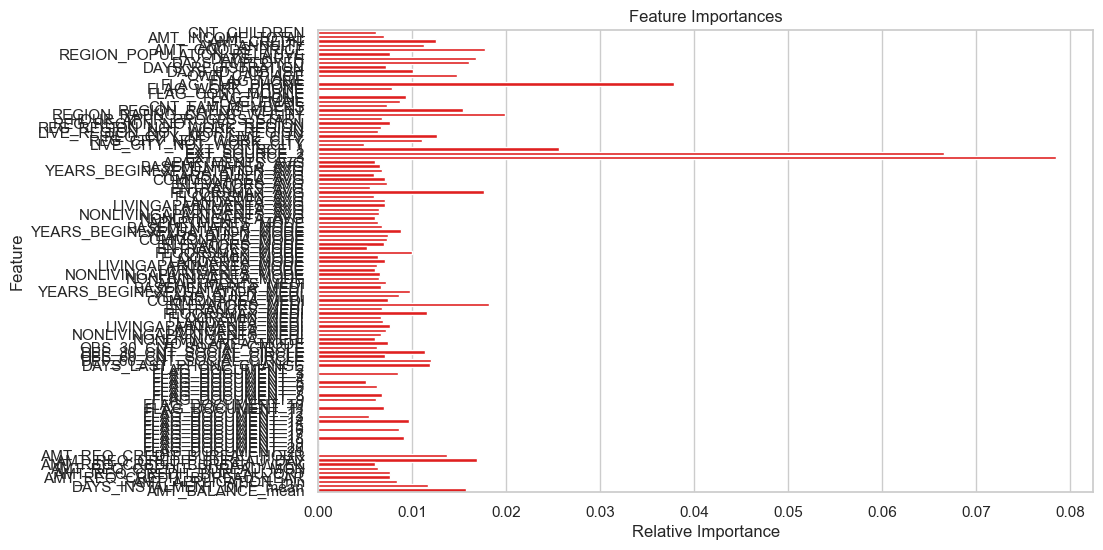

Best Parameters for XGBoost:
	predictor__colsample_bytree: 0.5
	predictor__eta: 0.001
	predictor__learning_rate: 0.01
	predictor__max_depth: 5
	predictor__n_estimators: 1000
****** FINISHED TUNING XGBoost  *****


In [121]:
ConductGridSearch(X_train[numerical_features], y_train, X_test[numerical_features], y_test)

In [122]:
results

ExpID  Cross-fold Train Accuracy  Test Accuracy  p-value  Train Time(s)  \
0  XGBoost                     66.004         68.789  0.00148        13.1208   

   Test Time(s)                             Experiment Description  
0        0.0174  [["predictor__colsample_bytree", 0.5], ["predi...

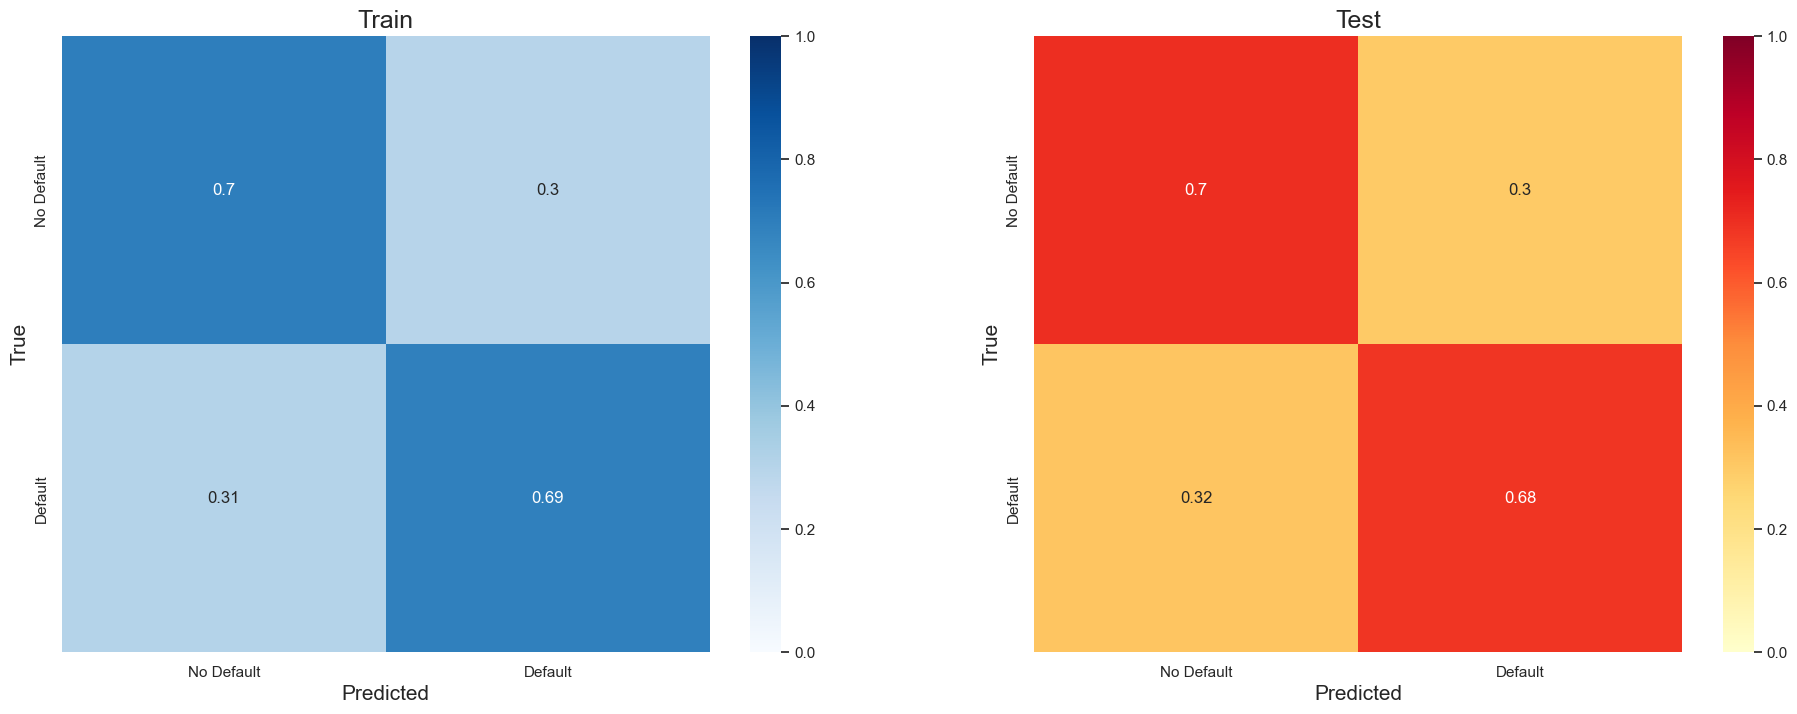

In [123]:
cm_train,cm_test=confusion_matrix_normalized(model,X_train,y_train,X_test,y_test)
fig, axes = plt.subplots(1, 2, figsize=(23, 8))

# Plot the first heatmap in the first subplot
sns.heatmap(cm_train, vmin=0, vmax=1, annot=True, cmap="Blues", ax=axes[0])
axes[0].set_xlabel("Predicted", fontsize=15)
axes[0].set_ylabel("True", fontsize=15)
axes[0].set_xticklabels(class_labels)
axes[0].set_yticklabels(class_labels)
axes[0].set_title("Train", fontsize=18)

# Plot the second heatmap in the second subplot
sns.heatmap(cm_test, vmin=0, vmax=1, annot=True, cmap="YlOrRd", ax=axes[1])
axes[1].set_xlabel("Predicted", fontsize=15)
axes[1].set_ylabel("True", fontsize=15)
axes[1].set_xticklabels(class_labels)
axes[1].set_yticklabels(class_labels)
axes[1].set_title("Test", fontsize=18)

plt.show()


F1 Score:  0.6906200317965024


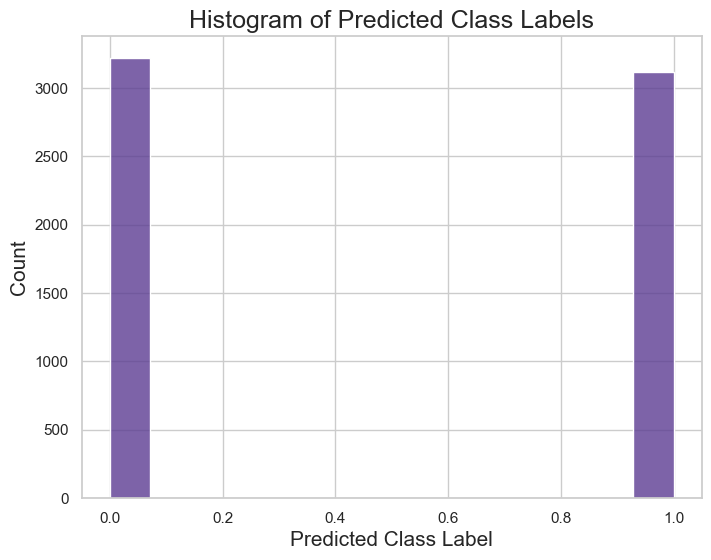

In [124]:
pred = model.predict(X_test)
# Create histogram of predicted class labels with a new color scheme
plt.figure(figsize=(8, 6))
sns.histplot(pred, kde=False, color="#5C3C92", alpha=0.8)
plt.xlabel("Predicted Class Label", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Histogram of Predicted Class Labels", fontsize=18)
f1 = f1_score(y_test, pred)
print("F1 Score: ", f1)

In [125]:
with open('features_dict_XG.pickle', 'wb') as handle:
    pickle.dump(features_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [126]:
with open('features_dict_XG.pickle', 'rb') as handle:
    x = pickle.load(handle)

## Model 13 - XGBOOST -Feature &hyperParameter Tuning x>0

In [129]:
features = features_dict['features']
importances = features_dict['importances']

new_indices = [idx for idx, x in enumerate(importances) if x>0]
new_importances = [x for idx, x in enumerate(importances) if x>0]

new_features = [features[i] for i in new_indices]
print(len(new_features))

num_attribs = new_features

np.random.seed(42)

# creating pipeline by joining numerical and categorical pipelines
data_prep_pipeline, selected_features = get_pipeline(num_attribs)

# Attaching XGBoost model to the above pipeline
xgboost_full_pipeline_with_predictor = Pipeline([
    ("preparation", data_prep_pipeline),
    ("xgboost", XGBClassifier(random_state=42, 
                objective='binary:logistic', max_depth=5, eta=0.001, 
                learning_rate=0.01, colsample_bytree=0.5, n_estimators=1000))
])

# Training the model
start = time.time()
model = xgboost_full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time.time() - start, 4)

start = time.time()
score_test  = xgboost_full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time.time() - start, 4)

# Results
exp_name = f"Model 13 - XGBOOST -Feature &hyperParameter Tuning"
experiment_description =f"XGBOOST Tuned with x>0 {len(selected_features)} features"
expLog = get_results(expLog, exp_name,experiment_description,model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog


95
Total Features: 112 - Numerical: 95, Categorical: 16


exp_name  \
0                 Baseline_undersampled1_124_features   
1                                 Model-1 Baseline LR   
2                                 Model-2 Baseline LR   
3                                         Model-3 KNN   
4                                Model-5 Baseline KNN   
5                              Model-5 Random Forest    
6                                Model-6 Extra Trees    
7                                Model-7 Extra Trees    
8                     Model-8 Bagging Meta Estimator    
9                             Model-9 ADABoost SAMME    
10                                Model-11 ADABoost     
11                                Model-12 CATBoost     
12                                 Model-10 XGBoost     
13                                 Model-10 XGBoost     
14                                Model-11 ADABoost     
15                                Model-12 CATBoost     
16  Model 13 - XGBOOST -Feature &hyperParameter Tu...   

                                          description  Train Time (sec)  \
0                 Baseline_undersampled1_124_features            2.1989   
1   Logistic regression with undersampled data 124...            2.4495   
2   Logistic regression with undersampled data-2 1...            1.3669   
3           KNN with undersampled data-2 124 features            0.1888   
4   Decision tree with undersampled data-2 124 fea...            0.8050   
5   Random Forest with undersampled data-2 124 fea...           10.9049   
6   Extra Trees with undersampled data-2 124 features            1.3018   
7   Extra Trees with undersampled data-2 124 features            1.3846   
8   Bagging Meta Estimator with undersampled data-...            2.5269   
9   ADABoost SAMME with undersampled data-2 124 fe...           24.1679   
10  ADABoost SAMME with undersampled data-2 124 fe...          124.1598   
11  CATBoost SAMME with undersampled data-2 124 fe...            7.1576   
12  XGBoost SAMME with undersampled data-2 124 fea...           24.6309   
13  XGBoost SAMME with undersampled data-2 124 fea...           22.5526   
14  ADABoost SAMME with undersampled data-2 124 fe...          116.3467   
15  CATBoost SAMME with undersampled data-2 124 fe...            6.5630   
16                XGBOOST Tuned with x>0 112 features           16.3471   

    Test Time (sec)  Train Acc  Valid Acc  Test  Acc  Train AUC  Valid AUC  \
0            0.0676     0.7744     0.7673     0.7784     0.7548     0.7427   
1            0.0561     0.7744     0.7673     0.7784     0.7548     0.7427   
2            0.0458     0.6876     0.6843     0.6904     0.7525     0.7489   
3            0.6119     0.6950     0.6155     0.6184     0.7625     0.6571   
4            0.0233     0.6749     0.6535     0.6591     0.7380     0.7105   
5            0.3207     0.7664     0.6654     0.6661     0.8504     0.7243   
6            0.0993     0.6738     0.6502     0.6482     0.7405     0.7059   
7            0.1044     0.6738     0.6502     0.6482     0.7405     0.7059   
8            0.1712     0.9844     0.6477     0.6446     0.9990     0.6978   
9            0.3530     0.7185     0.6966     0.6950     0.7989     0.7580   
10           2.8513     0.6774     0.6776     0.6771     0.7388     0.7402   
11           0.2061     0.6964     0.6904     0.6926     0.7671     0.7580   
12           0.0353     0.7312     0.6937     0.6940     0.8116     0.7612   
13           0.0354     0.7312     0.6937     0.6940     0.8116     0.7612   
14           2.8445     0.6774     0.6776     0.6771     0.7388     0.7402   
15           0.2007     0.6964     0.6904     0.6926     0.7671     0.7580   
16           0.0319     0.7308     0.6959     0.6956     0.8101     0.7610   

    Test  AUC  Train F1 Score  Valid F1 Score  Test F1 Score  
0      0.7496          0.3638          0.3363         0.3660  
1      0.7496          0.3638          0.3363         0.3660  
2      0.7535          0.6865          0.6854         0.6900  
3      0.6

## Model 14 - XGBOOST -Feature & hyperParameter Tuning 


In [130]:
features = features_dict['features']
importances = features_dict['importances']

new_indices = [idx for idx, x in enumerate(importances) if x>0.01]
new_importances = [x for idx, x in enumerate(importances) if x>0.01]

new_features = [features[i] for i in new_indices]
print(len(new_features))

num_attribs = new_features

np.random.seed(42)

# creating pipeline by joining numerical and categorical pipelines
data_prep_pipeline, selected_features = get_pipeline(num_attribs)

# Attaching XGBoost model to the above pipeline
xgboost_full_pipeline_with_predictor = Pipeline([
    ("preparation", data_prep_pipeline),
    ("xgboost", XGBClassifier(random_state=42, 
                objective='binary:logistic', max_depth=5, eta=0.001, 
                learning_rate=0.01, colsample_bytree=0.5, n_estimators=1000))
])

# Training the model
start = time.time()
model = xgboost_full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time.time() - start, 4)

start = time.time()
score_test  = xgboost_full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time.time() - start, 4)

# Results
# Results
exp_name = f"Model 14 - XGBOOST -Feature &hyperParameter Tuning"
experiment_description =f"XGBOOST Tuned with x>0.01 {len(selected_features)} features"
expLog = get_results(expLog, exp_name,experiment_description,model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog


25
Total Features: 42 - Numerical: 25, Categorical: 16


exp_name  \
0                 Baseline_undersampled1_124_features   
1                                 Model-1 Baseline LR   
2                                 Model-2 Baseline LR   
3                                         Model-3 KNN   
4                                Model-5 Baseline KNN   
5                              Model-5 Random Forest    
6                                Model-6 Extra Trees    
7                                Model-7 Extra Trees    
8                     Model-8 Bagging Meta Estimator    
9                             Model-9 ADABoost SAMME    
10                                Model-11 ADABoost     
11                                Model-12 CATBoost     
12                                 Model-10 XGBoost     
13                                 Model-10 XGBoost     
14                                Model-11 ADABoost     
15                                Model-12 CATBoost     
16  Model 13 - XGBOOST -Feature &hyperParameter Tu...   
17  Model 14 - XGBOOST -Feature &hyperParameter Tu...   

                                          description  Train Time (sec)  \
0                 Baseline_undersampled1_124_features            2.1989   
1   Logistic regression with undersampled data 124...            2.4495   
2   Logistic regression with undersampled data-2 1...            1.3669   
3           KNN with undersampled data-2 124 features            0.1888   
4   Decision tree with undersampled data-2 124 fea...            0.8050   
5   Random Forest with undersampled data-2 124 fea...           10.9049   
6   Extra Trees with undersampled data-2 124 features            1.3018   
7   Extra Trees with undersampled data-2 124 features            1.3846   
8   Bagging Meta Estimator with undersampled data-...            2.5269   
9   ADABoost SAMME with undersampled data-2 124 fe...           24.1679   
10  ADABoost SAMME with undersampled data-2 124 fe...          124.1598   
11  CATBoost SAMME with undersampled data-2 124 fe...            7.1576   
12  XGBoost SAMME with undersampled data-2 124 fea...           24.6309   
13  XGBoost SAMME with undersampled data-2 124 fea...           22.5526   
14  ADABoost SAMME with undersampled data-2 124 fe...          116.3467   
15  CATBoost SAMME with undersampled data-2 124 fe...            6.5630   
16                XGBOOST Tuned with x>0 112 features           16.3471   
17              XGBOOST Tuned with x>0.01 42 features           13.6924   

    Test Time (sec)  Train Acc  Valid Acc  Test  Acc  Train AUC  Valid AUC  \
0            0.0676     0.7744     0.7673     0.7784     0.7548     0.7427   
1            0.0561     0.7744     0.7673     0.7784     0.7548     0.7427   
2            0.0458     0.6876     0.6843     0.6904     0.7525     0.7489   
3            0.6119     0.6950     0.6155     0.6184     0.7625     0.6571   
4            0.0233     0.6749     0.6535     0.6591     0.7380     0.7105   
5            0.3207     0.7664     0.6654     0.6661     0.8504     0.7243   
6            0.0993     0.6738     0.6502     0.6482     0.7405     0.7059   
7            0.1044     0.6738     0.6502     0.6482     0.7405     0.7059   
8            0.1712     0.9844     0.6477     0.6446     0.9990     0.6978   
9            0.3530     0.7185     0.6966     0.6950     0.7989     0.7580   
10           2.8513     0.6774     0.6776     0.6771     0.7388     0.7402   
11           0.2061     0.6964     0.6904     0.6926     0.7671     0.7580   
12           0.0353     0.7312     0.6937     0.6940     0.8116     0.7612   
13           0.0354     0.7312     0.6937     0.6940     0.8116     0.7612   
14           2.8445     0.6774     0.6776     0.6771     0.7388     0.7402   
15           0.2007     0.6964     0.6904     0.6926     0.7671     0.7580   
16           0.0319     0.7308     0.6959     0.6956     0.8101     0.7610   
17           0.0257     0.7245     0.6944     0.6952     0.8029     0.7611   

    Test  AUC  Train F1 Score  Valid F1 Score  Test 


## Model 15 - XGBOOST -Feature &hyperParameter Tuning

In [131]:
features = features_dict['features']
importances = features_dict['importances']

new_indices = [idx for idx, x in enumerate(importances) if x>0.005]
new_importances = [x for idx, x in enumerate(importances) if x>0.005]

new_features = [features[i] for i in new_indices]
print(len(new_features))

num_attribs = new_features

np.random.seed(42)

# creating pipeline by joining numerical and categorical pipelines
data_prep_pipeline, selected_features = get_pipeline(num_attribs)

# Attaching XGBoost model to the above pipeline
xgboost_full_pipeline_with_predictor = Pipeline([
    ("preparation", data_prep_pipeline),
    ("xgboost", XGBClassifier(random_state=42, 
                objective='binary:logistic', max_depth=5, eta=0.001, 
                learning_rate=0.01, colsample_bytree=0.7, n_estimators=1000))
])

# Training the model
start = time.time()
model = xgboost_full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time.time() - start, 4)

start = time.time()
score_test  = xgboost_full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time.time() - start, 4)

# Results
# Results
exp_name = f"Model 15 - XGBOOST -Feature &hyperParameter Tuning"
experiment_description =f"XGBOOST Tuned with x>0.005 {len(selected_features)} features"
expLog = get_results(expLog, exp_name,experiment_description,model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog



94
Total Features: 111 - Numerical: 94, Categorical: 16


exp_name  \
0                 Baseline_undersampled1_124_features   
1                                 Model-1 Baseline LR   
2                                 Model-2 Baseline LR   
3                                         Model-3 KNN   
4                                Model-5 Baseline KNN   
5                              Model-5 Random Forest    
6                                Model-6 Extra Trees    
7                                Model-7 Extra Trees    
8                     Model-8 Bagging Meta Estimator    
9                             Model-9 ADABoost SAMME    
10                                Model-11 ADABoost     
11                                Model-12 CATBoost     
12                                 Model-10 XGBoost     
13                                 Model-10 XGBoost     
14                                Model-11 ADABoost     
15                                Model-12 CATBoost     
16  Model 13 - XGBOOST -Feature &hyperParameter Tu...   
17  Model 14 - XGBOOST -Feature &hyperParameter Tu...   
18  Model 15 - XGBOOST -Feature &hyperParameter Tu...   

                                          description  Train Time (sec)  \
0                 Baseline_undersampled1_124_features            2.1989   
1   Logistic regression with undersampled data 124...            2.4495   
2   Logistic regression with undersampled data-2 1...            1.3669   
3           KNN with undersampled data-2 124 features            0.1888   
4   Decision tree with undersampled data-2 124 fea...            0.8050   
5   Random Forest with undersampled data-2 124 fea...           10.9049   
6   Extra Trees with undersampled data-2 124 features            1.3018   
7   Extra Trees with undersampled data-2 124 features            1.3846   
8   Bagging Meta Estimator with undersampled data-...            2.5269   
9   ADABoost SAMME with undersampled data-2 124 fe...           24.1679   
10  ADABoost SAMME with undersampled data-2 124 fe...          124.1598   
11  CATBoost SAMME with undersampled data-2 124 fe...            7.1576   
12  XGBoost SAMME with undersampled data-2 124 fea...           24.6309   
13  XGBoost SAMME with undersampled data-2 124 fea...           22.5526   
14  ADABoost SAMME with undersampled data-2 124 fe...          116.3467   
15  CATBoost SAMME with undersampled data-2 124 fe...            6.5630   
16                XGBOOST Tuned with x>0 112 features           16.3471   
17              XGBOOST Tuned with x>0.01 42 features           13.6924   
18            XGBOOST Tuned with x>0.005 111 features           21.2228   

    Test Time (sec)  Train Acc  Valid Acc  Test  Acc  Train AUC  Valid AUC  \
0            0.0676     0.7744     0.7673     0.7784     0.7548     0.7427   
1            0.0561     0.7744     0.7673     0.7784     0.7548     0.7427   
2            0.0458     0.6876     0.6843     0.6904     0.7525     0.7489   
3            0.6119     0.6950     0.6155     0.6184     0.7625     0.6571   
4            0.0233     0.6749     0.6535     0.6591     0.7380     0.7105   
5            0.3207     0.7664     0.6654     0.6661     0.8504     0.7243   
6            0.0993     0.6738     0.6502     0.6482     0.7405     0.7059   
7            0.1044     0.6738     0.6502     0.6482     0.7405     0.7059   
8            0.1712     0.9844     0.6477     0.6446     0.9990     0.6978   
9            0.3530     0.7185     0.6966     0.6950     0.7989     0.7580   
10           2.8513     0.6774     0.6776     0.6771     0.7388     0.7402   
11           0.2061     0.6964     0.6904     0.6926     0.7671     0.7580   
12           0.0353     0.7312     0.6937     0.6940     0.8116     0.7612   
13           0.0354     0.7312     0.6937     0.6940     0.8116     0.7612   
14           2.8445     0.6774     0.6776     0.6771     0.7388     0.7402   
15           0.2007     0.6964     0.6904     0.6926     0.7671     0.7580   
16           0.0319     0.7308     0.6959     0.6956     0.8101     0.7610   

### CatBoost Hyper Parameter Tuning and Feature Selection 

In [83]:
import time
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import GridSearchCV, ShuffleSplit, cross_val_score
from sklearn.pipeline import Pipeline, FeatureUnion
from catboost import CatBoostClassifier

# Helper function to convert decimal to percentage
def pct(decimal):
    return round(decimal * 100, 2)

results = pd.DataFrame(columns=["ExpID", "Cross-fold Train Accuracy", "Test Accuracy", "p-value", "Train Time(s)", "Test Time(s)", "Experiment Description"])
features_dict = dict()

# A Function to execute the grid search and record the results.
def ConductGridSearch(X_train, y_train, X_test, y_test):
    # classifier for our grid search experiment
    classifiers = [
        ('CatBoost', CatBoostClassifier(random_state=42, verbose=False))
    ]
    
    # grid search parameters for the classifier
    param_grid = {
       'CatBoost':  {
            'depth': [5, 9],
            'iterations': [800, 1000],
            'learning_rate': [0.001, 0.01],
            'colsample_bylevel': [0.5, 0.7], 
        }
    }
    
#       # grid search parameters for the classifier
#     param_grid = {
#        'CatBoost':  {
#             'depth': [5],
#             'iterations': [20],
#             'learning_rate': [ 0.01],
#             'colsample_bylevel': [0.5], 
#         }
#     }
    
    for (name, classifier) in classifiers:
        
        #name = "example"
        print(f"****** STARTING {name.upper()} *****")
       
        parameters = param_grid[name]
        print("Parameters:")
        for p in sorted(parameters.keys()):
            print("\t"+str(p)+": "+ str(parameters[p]))
        
        # generate the pipeline
        full_pipeline_with_predictor = Pipeline([
            ("preparation", FeatureUnion(transformer_list=[("num_pipeline", numerical_pipeline)])),
            ("predictor", classifier)
        ])
        
        
        # Execute the grid search
        params = {}
        for p in parameters.keys():
            pipe_key = 'predictor__'+str(p)
            params[pipe_key] = parameters[p] 
        
        grid_search = GridSearchCV(full_pipeline_with_predictor, params, scoring='accuracy', cv=2, 
                                   n_jobs=-1, verbose=1)
        grid_search.fit(X_train, y_train)


        # Best estimator training time
        start = time.time()
        grid_search.best_estimator_.fit(X_train, y_train)
        train_time = round(time.time() - start, 4)
        
        # Training accuracy
        cvSplits = ShuffleSplit(n_splits=3, test_size=0.7, random_state=42)
        best_train_scores = cross_val_score(full_pipeline_with_predictor,X_train , y_train, cv=cvSplits)
        best_train_accuracy = pct(best_train_scores.mean())
        
        # Best estimator prediction time and test accuracy
        start = time.time()
        best_test_accuracy = pct(grid_search.best_estimator_.score(X_test, y_test))
        test_time = round(time.time() - start, 4)
        
        
        # Importance of features
        features = numerical_features[:]
        print('\nTotal number of features:', len(features))
        importances = grid_search.best_estimator_.named_steps["predictor"].feature_importances_
        
        # selecting features based on importance values
        new_indices = [idx for idx, x in enumerate(importances) if x>0.01]
        new_importances = [x for idx, x in enumerate(importances) if x>0.01]
        new_features = [features[i] for i in new_indices]
        
        print('Total number of selected features:', len(new_features))

        # Plotting a barplot to visualize feature importance
        sns.set(style='whitegrid')
        plt.figure(figsize=(10, 6))
        sns.barplot(x=importances, y=features, color='red')
        plt.title('Feature Importances')
        plt.xlabel('Relative Importance')
        plt.ylabel('Feature')
        plt.show()


        # Conduct t-test with baseline logit and best estimator
        (t_stat, p_value) = stats.ttest_rel(logit_scores, best_train_scores)

        # Best parameters found using grid search
        print(f"Best Parameters for {name}:")
        best_parameters = grid_search.best_estimator_.get_params()
        best_params = []
        for param_name in sorted(params.keys()):
            best_params.append((param_name, best_parameters[param_name]))
            print("\t"+str(param_name)+": " + str(best_parameters[param_name]))
        
        print(f"****** FINISHED {name.upper()} *****")

        # Results
        results.loc[len(results)] = [name, best_train_accuracy, best_test_accuracy, round(p_value,5), train_time, test_time, json.dumps(best_params)]

        # Storing the importances of the features
        features_dict['features'] = features
        features_dict['importances'] = importances



****** STARTING CATBOOST *****
Parameters:
	colsample_bylevel: [0.5, 0.7]
	depth: [5, 9]
	iterations: [800, 1000]
	learning_rate: [0.001, 0.01]
Fitting 2 folds for each of 16 candidates, totalling 32 fits

Total number of features: 107
Total number of selected features: 95


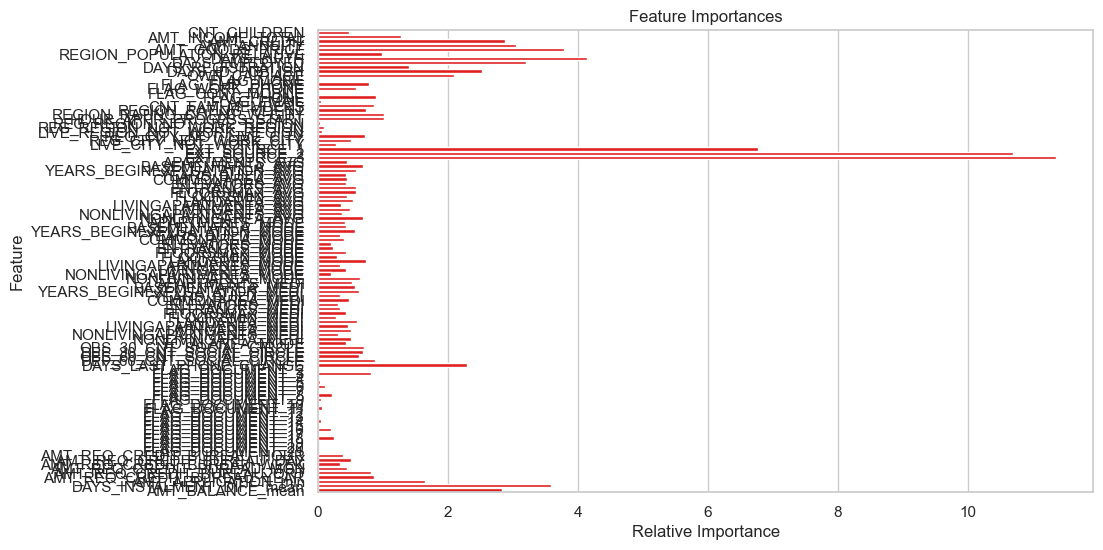

Best Parameters for CatBoost:
	predictor__colsample_bylevel: 0.5
	predictor__depth: 9
	predictor__iterations: 1000
	predictor__learning_rate: 0.01
****** FINISHED CATBOOST *****


In [84]:
ConductGridSearch(X_train[numerical_features], y_train, X_test[numerical_features], y_test)

In [88]:
results 

ExpID  Cross-fold Train Accuracy  Test Accuracy  p-value  Train Time(s)  \
0  CatBoost                      68.02          68.55   0.3751        16.2538   

   Test Time(s)                             Experiment Description  
0        0.0117  [["predictor__colsample_bylevel", 0.5], ["pred...

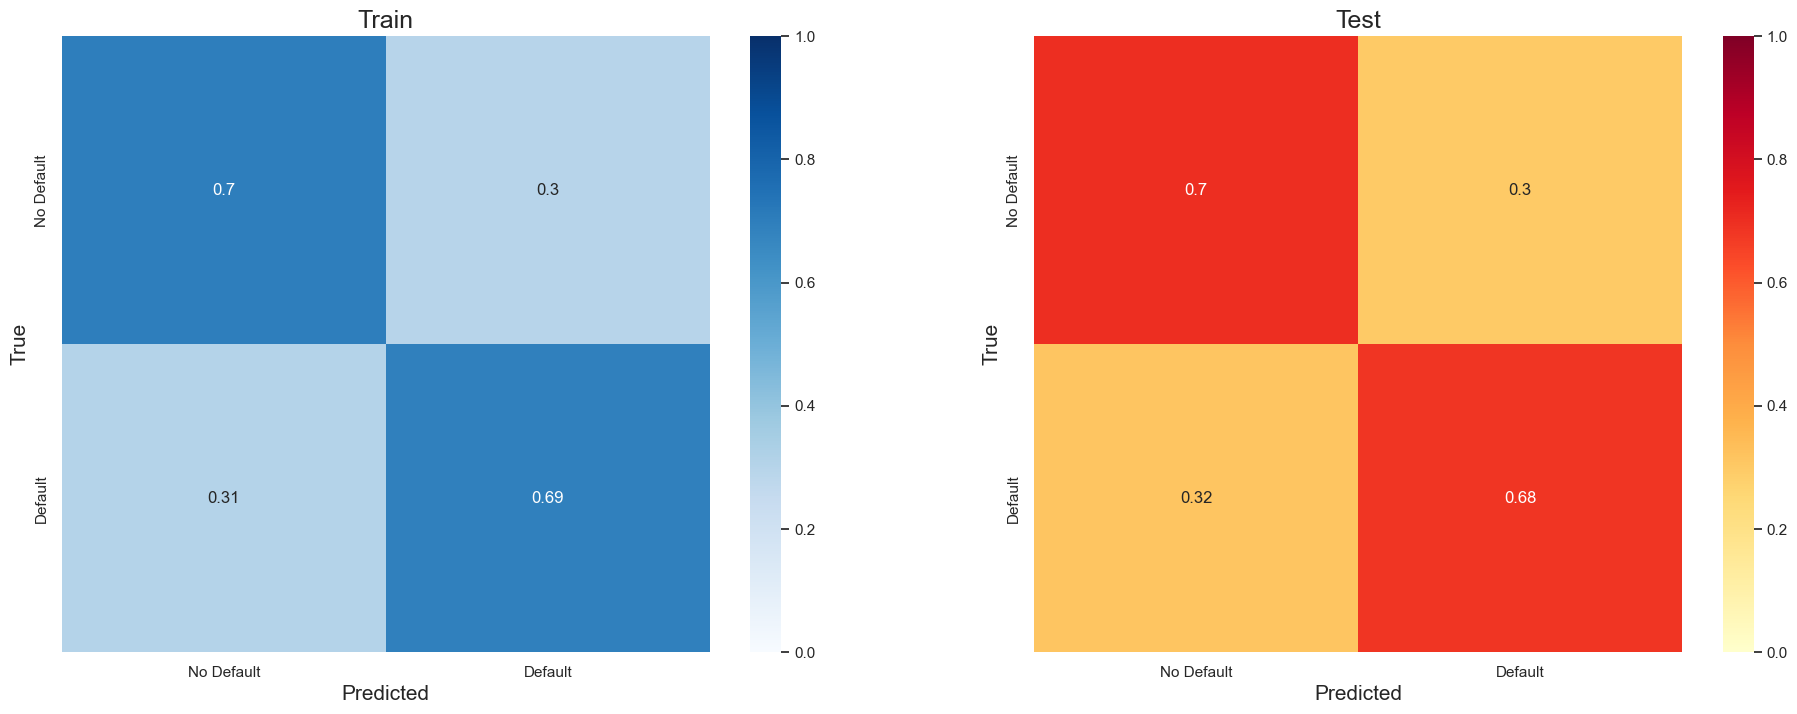

In [89]:
cm_train,cm_test=confusion_matrix_normalized(model,X_train,y_train,X_test,y_test)
fig, axes = plt.subplots(1, 2, figsize=(23, 8))

# Plot the first heatmap in the first subplot
sns.heatmap(cm_train, vmin=0, vmax=1, annot=True, cmap="Blues", ax=axes[0])
axes[0].set_xlabel("Predicted", fontsize=15)
axes[0].set_ylabel("True", fontsize=15)
axes[0].set_xticklabels(class_labels)
axes[0].set_yticklabels(class_labels)
axes[0].set_title("Train", fontsize=18)

# Plot the second heatmap in the second subplot
sns.heatmap(cm_test, vmin=0, vmax=1, annot=True, cmap="YlOrRd", ax=axes[1])
axes[1].set_xlabel("Predicted", fontsize=15)
axes[1].set_ylabel("True", fontsize=15)
axes[1].set_xticklabels(class_labels)
axes[1].set_yticklabels(class_labels)
axes[1].set_title("Test", fontsize=18)

plt.show()

F1 Score:  0.6906200317965024


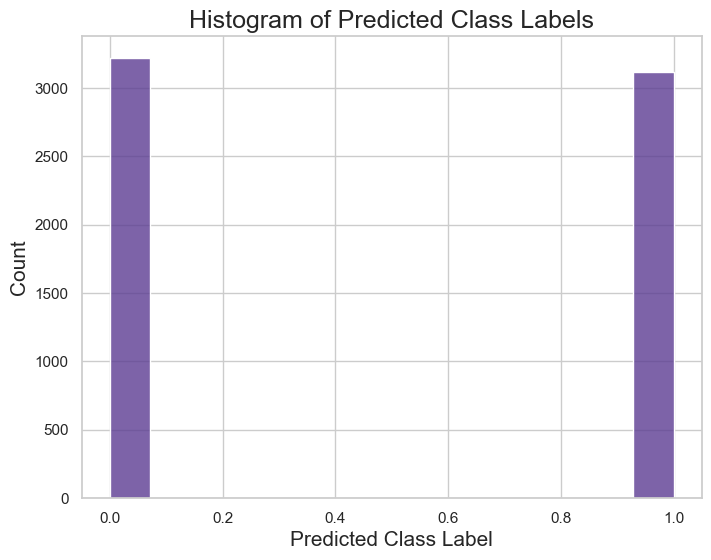

In [90]:
pred = model.predict(X_test)
# Create histogram of predicted class labels with a new color scheme
plt.figure(figsize=(8, 6))
sns.histplot(pred, kde=False, color="#5C3C92", alpha=0.8)
plt.xlabel("Predicted Class Label", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Histogram of Predicted Class Labels", fontsize=18)
f1 = f1_score(y_test, pred)
f1 = f1_score(y_test, pred)
print("F1 Score: ", f1)

In [91]:
with open('features_dict_catboost.pickle', 'wb') as handle:
    pickle.dump(features_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [92]:
with open('features_dict_catboost.pickle', 'rb') as handle:
    x = pickle.load(handle)

## Model 16 - CatBOOST -Feature &hyperParameter Tuning


In [95]:
features = features_dict['features']
importances = features_dict['importances']

new_indices = [idx for idx, x in enumerate(importances) if x > 0]
new_importances = [x for idx, x in enumerate(importances) if x > 0]

new_features = [features[i] for i in new_indices]
print(len(new_features))

num_attribs = new_features

np.random.seed(42)

# creating pipeline by joining numerical and categorical pipelines
data_prep_pipeline, selected_features = get_pipeline(num_attribs)

# Attaching CatBoost model to the above pipeline
catboost_full_pipeline_with_predictor = Pipeline([
    ("preparation", data_prep_pipeline),
    ("catboost", CatBoostClassifier(random_state=42, 
                iterations=1000, learning_rate=0.01, depth=9, 
                colsample_bylevel=0.5, thread_count=-1, verbose=False))
])

# Training the model
start = time.time()
model = catboost_full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time.time() - start, 4)

start = time.time()
score_test = catboost_full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time.time() - start, 4)

# Results
exp_name = f"Model 16 - CatBOOST -Feature &hyperParameter Tuning"
experiment_description =f"CatBOOST Tuned with x>0 {len(selected_features)} features"
expLog = get_results(expLog, exp_name,experiment_description,model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog


103
Total Features: 120 - Numerical: 103, Categorical: 16


exp_name  \
0                                 Model-1 Baseline LR   
1                                 Model-2 Baseline LR   
2                                         Model-3 KNN   
3                               Model-5 Decision Tree   
4                              Model-6 Random Forest    
5                                Model-7 Extra Trees    
6                     Model-8 Bagging Meta Estimator    
7                             Model-9 ADABoost SAMME    
8                             Model-9 ADABoost SAMME    
9                                 Model-12 CATBoost     
10                                Model-12 CATBoost     
11  Model 16 - CatOOST -Feature &hyperParameter Tu...   
12  Model 16 - CatBOOST -Feature &hyperParameter T...   

                                          description  Train Time (sec)  \
0   Logistic regression with undersampled data 124...            2.3559   
1   Logistic regression with undersampled data-2 1...            1.4254   
2           KNN with undersampled data-2 124 features            0.1751   
3   Decision tree with undersampled data-2 124 fea...            0.7844   
4   Random Forest with undersampled data-2 124 fea...           10.9068   
5   Extra Trees with undersampled data-2 124 features            1.4413   
6   Bagging Meta Estimator with undersampled data-...            2.2834   
7   ADABoost SAMME with undersampled data-2 124 fe...           22.3935   
8   ADABoost SAMME with undersampled data-2 124 fe...           23.0637   
9   CATBoost SAMME with undersampled data-2 124 fe...            6.8641   
10  CATBoost SAMME with undersampled data-2 124 fe...            7.3245   
11               CatBOOST Tuned with x>0 120 features           20.7806   
12               CatBOOST Tuned with x>0 120 features           20.8028   

    Test Time (sec)  Train Acc  Valid Acc  Test  Acc  Train AUC  Valid AUC  \
0            0.0695     0.7730     0.7658     0.7736     0.7545     0.7407   
1            0.0596     0.6876     0.6843     0.6904     0.7525     0.7489   
2            0.5618     0.6950     0.6155     0.6184     0.7625     0.6571   
3            0.0233     0.6749     0.6535     0.6591     0.7380     0.7105   
4            0.3101     0.7664     0.6654     0.6661     0.8504     0.7243   
5            0.1003     0.6738     0.6502     0.6482     0.7405     0.7059   
6            0.1983     0.9844     0.6477     0.6446     0.9990     0.6978   
7            0.2999     0.7185     0.6966     0.6950     0.7989     0.7580   
8            0.3044     0.7182     0.6963     0.6969     0.7980     0.7585   
9            0.2315     0.6964     0.6904     0.6926     0.7671     0.7580   
10           0.2304     0.6964     0.6904     0.6926     0.7671     0.7580   
11           0.2240     0.7528     0.6935     0.6970     0.8367     0.7594   
12           0.2269     0.7528     0.6935     0.6970     0.8367     0.7594   

    Test  AUC  Train F1 Score  Valid F1 Score  Test F1 Score  
0      0.7440          0.3575          0.3319         0.3558  
1      0.7535          0.6865          0.6854         0.6900  
2      0.6550          0.6992          0.6205         0.6226  
3      0.7129          0.6881          0.6678         0.6730  
4      0.7273          0.7673          0.6631         0.6640  
5      0.7023          0.6771          0.6559         0.6536  
6      0.6983          0.9842          0.6210         0.6164  
7      0.7594          0.7174          0.6971         0.6948  
8      0.7624          0.7177          0.6968         0.6959  
9      0.7591          0.6954          0.6901         0.6906  
10     0.7591          0.6954          0.6901         0.6906  
11     0.7618          0.7524          0.6940         0.6964  
12     0.7618          0.7524          0.6940         0.6964

## Model 17 - CatBOOST -Feature & HyperParameter Tuning

In [96]:
features = features_dict['features']
importances = features_dict['importances']

new_indices = [idx for idx, x in enumerate(importances) if x > 0.1]
new_importances = [x for idx, x in enumerate(importances) if x > 0.1]

new_features = [features[i] for i in new_indices]
print(len(new_features))

num_attribs = new_features

np.random.seed(42)

# creating pipeline by joining numerical and categorical pipelines
data_prep_pipeline, selected_features = get_pipeline(num_attribs)

# Attaching CatBoost model to the above pipeline
catboost_full_pipeline_with_predictor = Pipeline([
    ("preparation", data_prep_pipeline),
    ("catboost", CatBoostClassifier(random_state=42, 
                iterations=1000, learning_rate=0.01, depth=9, 
                colsample_bylevel=0.5, thread_count=-1, verbose=False))
])

# Training the model
start = time.time()
model = catboost_full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time.time() - start, 4)

start = time.time()
score_test = catboost_full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time.time() - start, 4)

# Results
exp_name = f"Model 17 - CatBOOST -Feature &hyperParameter Tuning"
experiment_description =f"CatBOOST Tuned with x>0.1 {len(selected_features)} features"
expLog = get_results(expLog, exp_name,experiment_description,model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog



86
Total Features: 103 - Numerical: 86, Categorical: 16


exp_name  \
0                                 Model-1 Baseline LR   
1                                 Model-2 Baseline LR   
2                                         Model-3 KNN   
3                               Model-5 Decision Tree   
4                              Model-6 Random Forest    
5                                Model-7 Extra Trees    
6                     Model-8 Bagging Meta Estimator    
7                             Model-9 ADABoost SAMME    
8                             Model-9 ADABoost SAMME    
9                                 Model-12 CATBoost     
10                                Model-12 CATBoost     
11  Model 16 - CatOOST -Feature &hyperParameter Tu...   
12  Model 16 - CatBOOST -Feature &hyperParameter T...   
13  Model 17 - CatBOOST -Feature &hyperParameter T...   

                                          description  Train Time (sec)  \
0   Logistic regression with undersampled data 124...            2.3559   
1   Logistic regression with undersampled data-2 1...            1.4254   
2           KNN with undersampled data-2 124 features            0.1751   
3   Decision tree with undersampled data-2 124 fea...            0.7844   
4   Random Forest with undersampled data-2 124 fea...           10.9068   
5   Extra Trees with undersampled data-2 124 features            1.4413   
6   Bagging Meta Estimator with undersampled data-...            2.2834   
7   ADABoost SAMME with undersampled data-2 124 fe...           22.3935   
8   ADABoost SAMME with undersampled data-2 124 fe...           23.0637   
9   CATBoost SAMME with undersampled data-2 124 fe...            6.8641   
10  CATBoost SAMME with undersampled data-2 124 fe...            7.3245   
11               CatBOOST Tuned with x>0 120 features           20.7806   
12               CatBOOST Tuned with x>0 120 features           20.8028   
13             CatBOOST Tuned with x>0.1 103 features           19.0881   

    Test Time (sec)  Train Acc  Valid Acc  Test  Acc  Train AUC  Valid AUC  \
0            0.0695     0.7730     0.7658     0.7736     0.7545     0.7407   
1            0.0596     0.6876     0.6843     0.6904     0.7525     0.7489   
2            0.5618     0.6950     0.6155     0.6184     0.7625     0.6571   
3            0.0233     0.6749     0.6535     0.6591     0.7380     0.7105   
4            0.3101     0.7664     0.6654     0.6661     0.8504     0.7243   
5            0.1003     0.6738     0.6502     0.6482     0.7405     0.7059   
6            0.1983     0.9844     0.6477     0.6446     0.9990     0.6978   
7            0.2999     0.7185     0.6966     0.6950     0.7989     0.7580   
8            0.3044     0.7182     0.6963     0.6969     0.7980     0.7585   
9            0.2315     0.6964     0.6904     0.6926     0.7671     0.7580   
10           0.2304     0.6964     0.6904     0.6926     0.7671     0.7580   
11           0.2240     0.7528     0.6935     0.6970     0.8367     0.7594   
12           0.2269     0.7528     0.6935     0.6970     0.8367     0.7594   
13           0.2117     0.7513     0.6897     0.6944     0.8358     0.7590   

    Test  AUC  Train F1 Score  Valid F1 Score  Test F1 Score  
0      0.7440          0.3575          0.3319         0.3558  
1      0.7535          0.6865          0.6854         0.6900  
2      0.6550          0.6992          0.6205         0.6226  
3      0.7129          0.6881          0.6678         0.6730  
4      0.7273          0.7673          0.6631         0.6640  
5      0.7023          0.6771          0.6559         0.6536  
6      0.6983          0.9842          0.6210         0.6164  
7      0.7594          0.7174          0.6971         0.6948  
8      0.7624          0.7177          0.6968         0.6959  
9      0.7591          0.6954          0.6901         0.6906  
10     0.7591          0.6954          0.6901         0.6906  
11     0.7618          0.7524          0.6940         0.6964  
12     0.7618          0.7524          0.6940         0.6964  
13     0.7

## Model 18 - CatBOOST -Feature &hyperParameter Tuning

In [97]:
features = features_dict['features']
importances = features_dict['importances']

new_indices = [idx for idx, x in enumerate(importances) if x > 0.005]
new_importances = [x for idx, x in enumerate(importances) if x > 0.005]

new_features = [features[i] for i in new_indices]
print(len(new_features))

num_attribs = new_features

np.random.seed(42)

# creating pipeline by joining numerical and categorical pipelines
data_prep_pipeline, selected_features = get_pipeline(num_attribs)

# Attaching CatBoost model to the above pipeline
catboost_full_pipeline_with_predictor = Pipeline([
    ("preparation", data_prep_pipeline),
    ("catboost", CatBoostClassifier(random_state=42, 
                iterations=1000, learning_rate=0.01, depth=9, 
                colsample_bylevel=0.5, thread_count=-1, verbose=False))
])

# Training the model
start = time.time()
model = catboost_full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time.time() - start, 4)

start = time.time()
score_test = catboost_full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time.time() - start, 4)

# Results
exp_name = f"Model 18 - CatBOOST -Feature &hyperParameter Tuning"
experiment_description =f"CatBOOST Tuned with x>0.005 {len(selected_features)} features"
expLog = get_results(expLog, exp_name,experiment_description,model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog


96
Total Features: 113 - Numerical: 96, Categorical: 16


exp_name  \
0                                 Model-1 Baseline LR   
1                                 Model-2 Baseline LR   
2                                         Model-3 KNN   
3                               Model-5 Decision Tree   
4                              Model-6 Random Forest    
5                                Model-7 Extra Trees    
6                     Model-8 Bagging Meta Estimator    
7                             Model-9 ADABoost SAMME    
8                             Model-9 ADABoost SAMME    
9                                 Model-12 CATBoost     
10                                Model-12 CATBoost     
11  Model 16 - CatOOST -Feature &hyperParameter Tu...   
12  Model 16 - CatBOOST -Feature &hyperParameter T...   
13  Model 17 - CatBOOST -Feature &hyperParameter T...   
14  Model 18 - CatBOOST -Feature &hyperParameter T...   

                                          description  Train Time (sec)  \
0   Logistic regression with undersampled data 124...            2.3559   
1   Logistic regression with undersampled data-2 1...            1.4254   
2           KNN with undersampled data-2 124 features            0.1751   
3   Decision tree with undersampled data-2 124 fea...            0.7844   
4   Random Forest with undersampled data-2 124 fea...           10.9068   
5   Extra Trees with undersampled data-2 124 features            1.4413   
6   Bagging Meta Estimator with undersampled data-...            2.2834   
7   ADABoost SAMME with undersampled data-2 124 fe...           22.3935   
8   ADABoost SAMME with undersampled data-2 124 fe...           23.0637   
9   CATBoost SAMME with undersampled data-2 124 fe...            6.8641   
10  CATBoost SAMME with undersampled data-2 124 fe...            7.3245   
11               CatBOOST Tuned with x>0 120 features           20.7806   
12               CatBOOST Tuned with x>0 120 features           20.8028   
13             CatBOOST Tuned with x>0.1 103 features           19.0881   
14           CatBOOST Tuned with x>0.005 113 features           19.3895   

    Test Time (sec)  Train Acc  Valid Acc  Test  Acc  Train AUC  Valid AUC  \
0            0.0695     0.7730     0.7658     0.7736     0.7545     0.7407   
1            0.0596     0.6876     0.6843     0.6904     0.7525     0.7489   
2            0.5618     0.6950     0.6155     0.6184     0.7625     0.6571   
3            0.0233     0.6749     0.6535     0.6591     0.7380     0.7105   
4            0.3101     0.7664     0.6654     0.6661     0.8504     0.7243   
5            0.1003     0.6738     0.6502     0.6482     0.7405     0.7059   
6            0.1983     0.9844     0.6477     0.6446     0.9990     0.6978   
7            0.2999     0.7185     0.6966     0.6950     0.7989     0.7580   
8            0.3044     0.7182     0.6963     0.6969     0.7980     0.7585   
9            0.2315     0.6964     0.6904     0.6926     0.7671     0.7580   
10           0.2304     0.6964     0.6904     0.6926     0.7671     0.7580   
11           0.2240     0.7528     0.6935     0.6970     0.8367     0.7594   
12           0.2269     0.7528     0.6935     0.6970     0.8367     0.7594   
13           0.2117     0.7513     0.6897     0.6944     0.8358     0.7590   
14           0.2194     0.7513     0.6931     0.6959     0.8360     0.7596   

    Test  AUC  Train F1 Score  Valid F1 Score  Test F1 Score  
0      0.7440          0.3575          0.3319         0.3558  
1      0.7535          0.6865          0.6854         0.6900  
2      0.6550          0.6992          0.6205         0.6226  
3      0.7129          0.6881          0.6678         0.6730  
4      0.7273          0.7673          0.6631         0.6640  
5      0.7023          0.6771          0.6559         0.6536  
6      0.6983          0.9842          0.6210         0.6164  
7      0.7594          0.7174          0.6971         0.6948  
8      0.7624          0.7177          0.6968         0.6959  
9      0.7591          0.6954          0.6901       

### Random Forest Hyper Parameter Tuning and Feature Selection 

In [79]:
from sklearn.ensemble import RandomForestClassifier

results = pd.DataFrame(columns=["ExpID", "Cross-fold Train Accuracy", "Test Accuracy", "p-value", "Train Time(s)", "Test Time(s)", "Experiment Description"])
features_dict = dict()

# A Function to execute the grid search and record the results.
def ConductGridSearch(X_train, y_train, X_test, y_test):
    # classifier for our grid search experiment
    classifiers = [
        ('RandomForest', RandomForestClassifier(random_state=42))
    ]
    
    # grid search parameters for the classifier
    param_grid = {
        'RandomForest':  {
            'n_estimators': [100, 200],
            'max_depth': [5, 10],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2],
            'max_features': ['auto', 'sqrt']
        }
    }
    
    for (name, classifier) in classifiers:
        
        print('****** START', name,'*****')
        parameters = param_grid[name]
        print("Parameters:")
        for p in sorted(parameters.keys()):
            print("\t"+str(p)+": "+ str(parameters[p]))
        
        # generate the pipeline
        full_pipeline_with_predictor = Pipeline([
            ("preparation", FeatureUnion(transformer_list=[("num_pipeline", numerical_pipeline)])),
            ("predictor", classifier)
        ])
        
        
        # Execute the grid search
        params = {}
        for p in parameters.keys():
            pipe_key = 'predictor__'+str(p)
            params[pipe_key] = parameters[p] 
        
        grid_search = GridSearchCV(full_pipeline_with_predictor, params, scoring='accuracy', cv=2, 
                                   n_jobs=-1, verbose=1)
        grid_search.fit(X_train, y_train)


        # Best estimator training time
        start = time.time()
        grid_search.best_estimator_.fit(X_train, y_train)
        train_time = round(time.time() - start, 4)
        
        # Training accuracy
        cvSplits = ShuffleSplit(n_splits=3, test_size=0.7, random_state=42)
        best_train_scores = cross_val_score(full_pipeline_with_predictor,X_train , y_train, cv=cvSplits)
        best_train_accuracy = pct(best_train_scores.mean())
        
        # Best estimator prediction time and test accuracy
        start = time.time()
        best_test_accuracy = pct(grid_search.best_estimator_.score(X_test, y_test))
        test_time = round(time.time() - start, 4)
        
        
        # Importance of features
        features = numerical_features[:]
        print('\nTotal number of features:', len(features))
        importances = grid_search.best_estimator_.named_steps["predictor"].feature_importances_
        
        # selecting features based on importance values
        new_indices = [idx for idx, x in enumerate(importances) if x>0.01]
        new_importances = [x for idx, x in enumerate(importances) if x>0.01]
        new_features = [features[i] for i in new_indices]
        
        print('Total number of selected features:', len(new_features))

        
         # Plotting a barplot to visualize feature importance
        sns.set(style='whitegrid')
        plt.figure(figsize=(10, 6))
        sns.barplot(x=importances, y=features, color='red')
        plt.title('Feature Importances')
        plt.xlabel('Relative Importance')
        plt.ylabel('Feature')
        plt.show()
       
         # Conduct t-test with baseline logit and best estimator
        (t_stat, p_value) = stats.ttest_rel(logit_scores, best_train_scores)
            # Best parameters found using grid search
        print(f"Best Parameters for {name}:")
        best_parameters = grid_search.best_estimator_.get_params()
        best_params = []
        for param_name in sorted(params.keys()):
            best_params.append((param_name, best_parameters[param_name]))
            print("\t"+str(param_name)+": " + str(best_parameters[param_name]))
        print("****** FINISH",name," *****")

        # Results
        results.loc[len(results)] = [name, best_train_accuracy, best_test_accuracy, round(p_value,5), train_time, test_time, json.dumps(best_params)]

        # Storing the importances of the features
        features_dict['features'] = features
        features_dict['importances'] = importances



****** START RandomForest *****
Parameters:
	max_depth: [5, 10]
	max_features: ['auto', 'sqrt']
	min_samples_leaf: [1, 2]
	min_samples_split: [2, 5]
	n_estimators: [100, 200]
Fitting 2 folds for each of 32 candidates, totalling 64 fits


/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it 

/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it 


Total number of features: 107
Total number of selected features: 15


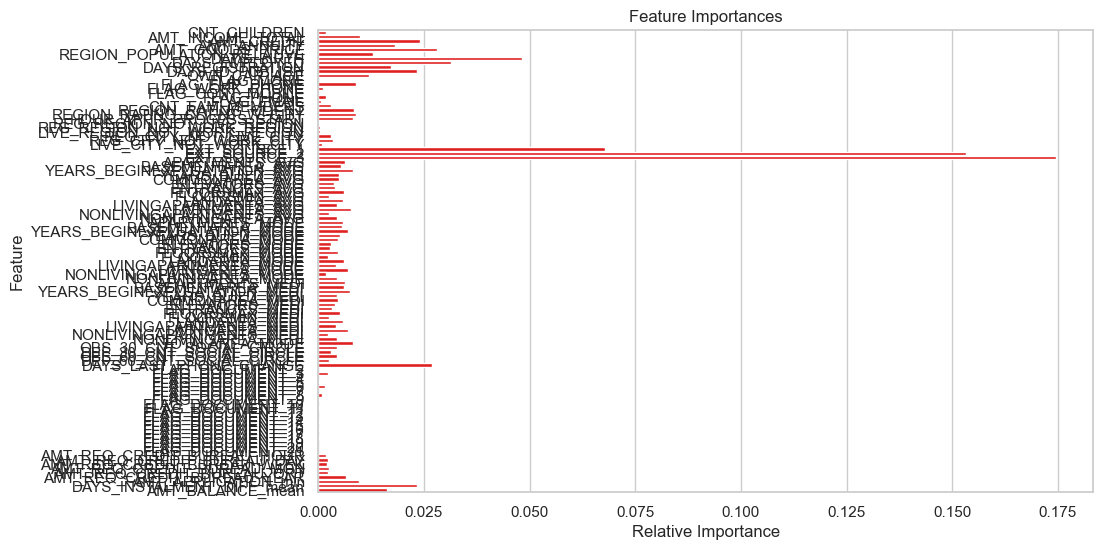

Best Parameters for RandomForest:
	predictor__max_depth: 10
	predictor__max_features: auto
	predictor__min_samples_leaf: 2
	predictor__min_samples_split: 5
	predictor__n_estimators: 200
****** FINISH RandomForest  *****


In [80]:
ConductGridSearch(X_train[numerical_features], y_train, X_test[numerical_features], y_test)

In [81]:
results

ExpID  Cross-fold Train Accuracy  Test Accuracy  p-value  \
0  RandomForest                     66.567         67.162  0.00287   

   Train Time(s)  Test Time(s)  \
0         8.1618         0.089   

                              Experiment Description  
0  [["predictor__max_depth", 10], ["predictor__ma...

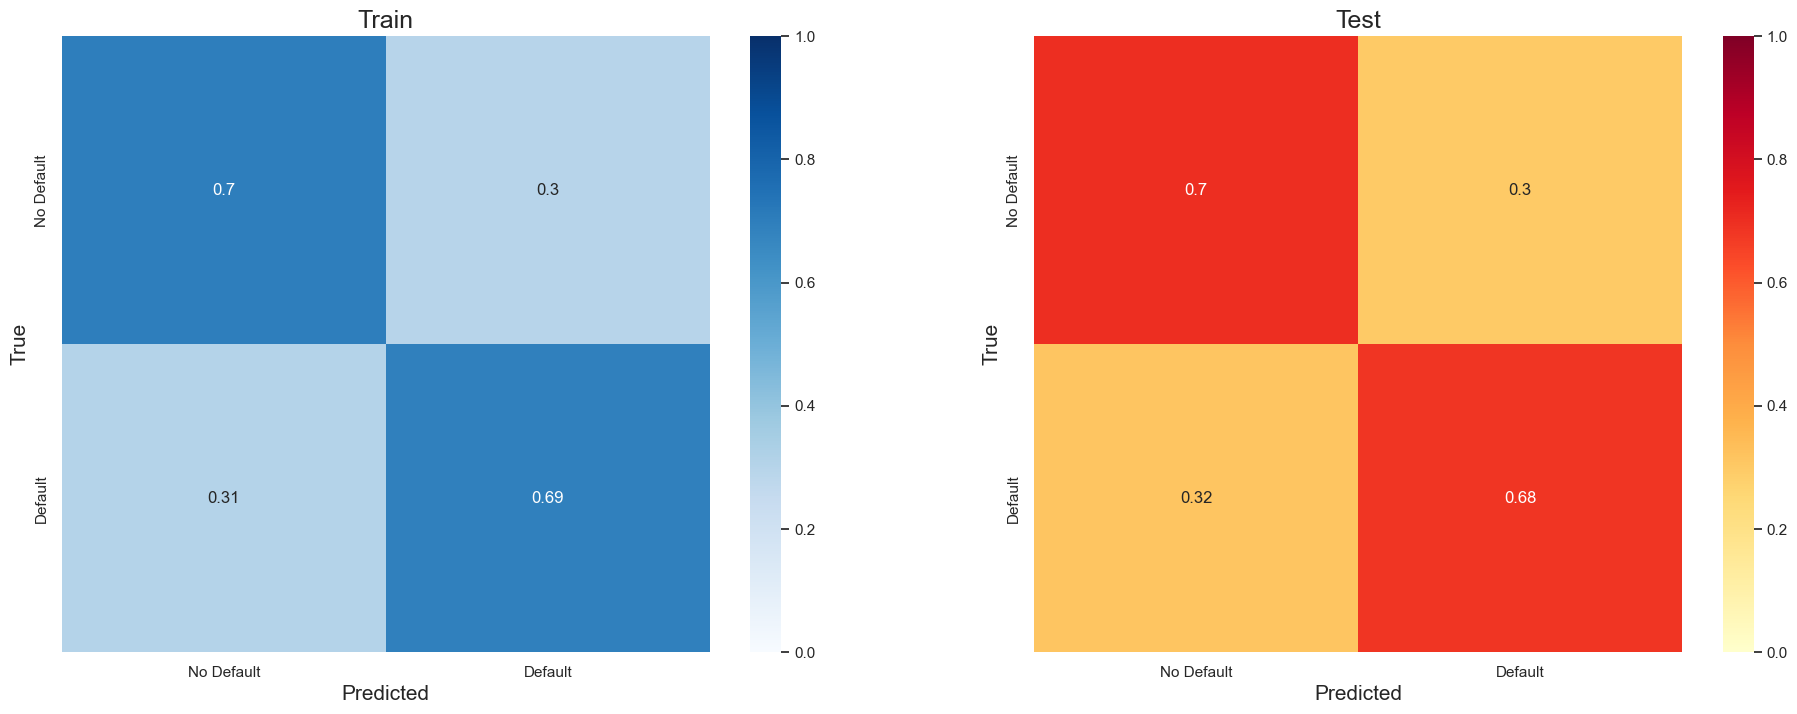

In [82]:
cm_train,cm_test=confusion_matrix_normalized(model,X_train,y_train,X_test,y_test)
fig, axes = plt.subplots(1, 2, figsize=(23, 8))

# Plot the first heatmap in the first subplot
sns.heatmap(cm_train, vmin=0, vmax=1, annot=True, cmap="Blues", ax=axes[0])
axes[0].set_xlabel("Predicted", fontsize=15)
axes[0].set_ylabel("True", fontsize=15)
axes[0].set_xticklabels(class_labels)
axes[0].set_yticklabels(class_labels)
axes[0].set_title("Train", fontsize=18)

# Plot the second heatmap in the second subplot
sns.heatmap(cm_test, vmin=0, vmax=1, annot=True, cmap="YlOrRd", ax=axes[1])
axes[1].set_xlabel("Predicted", fontsize=15)
axes[1].set_ylabel("True", fontsize=15)
axes[1].set_xticklabels(class_labels)
axes[1].set_yticklabels(class_labels)
axes[1].set_title("Test", fontsize=18)

plt.show()


F1 Score:  0.6906200317965024


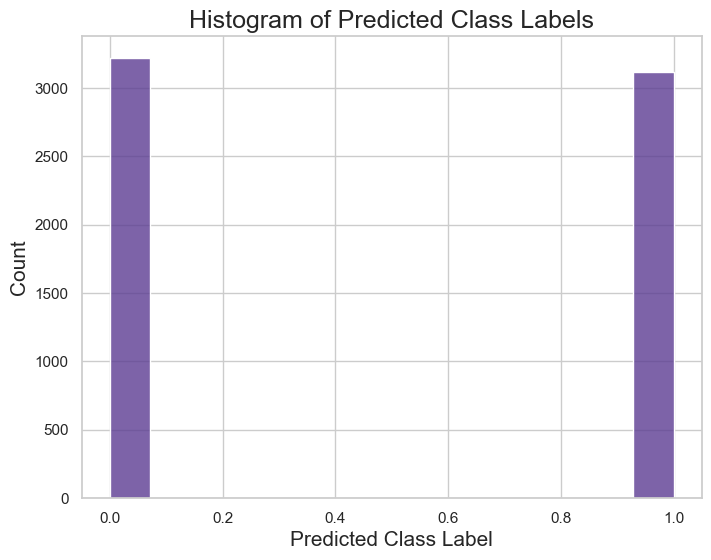

In [83]:
pred = model.predict(X_test)
# Create histogram of predicted class labels with a new color scheme
plt.figure(figsize=(8, 6))
sns.histplot(pred, kde=False, color="#5C3C92", alpha=0.8)
plt.xlabel("Predicted Class Label", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Histogram of Predicted Class Labels", fontsize=18)
f1 = f1_score(y_test, pred)
print("F1 Score: ", f1)

In [84]:
with open('features_dict_rf.pickle', 'wb') as handle:
    pickle.dump(features_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [85]:
with open('features_dict_rf.pickle', 'rb') as handle:
    x = pickle.load(handle)


## Model 19- Random Forest -Feature &hyperParameter Tuning


In [87]:
features = features_dict['features']
importances = features_dict['importances']

new_indices = [idx for idx, x in enumerate(importances) if x > 0]
new_importances = [x for idx, x in enumerate(importances) if x > 0]

new_features = [features[i] for i in new_indices]
print(len(new_features))

num_attribs = new_features

np.random.seed(42)

# creating pipeline by joining numerical and categorical pipelines
data_prep_pipeline, selected_features = get_pipeline(num_attribs)

# Attaching RandomForest model to the above pipeline
random_forest_full_pipeline_with_predictor = Pipeline([
    ("preparation", data_prep_pipeline),
    ("random_forest", RandomForestClassifier(random_state=42, 
                n_estimators=200, max_depth=10, max_features='auto', 
                min_samples_leaf=2, min_samples_split=5, n_jobs=-1))
])

# Training the model
start = time.time()
model = random_forest_full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time.time() - start, 4)

start = time.time()
score_test = random_forest_full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time.time() - start, 4)

# Results
# Results
exp_name = f"Model 19 - Random Forest -Feature &hyperParameter Tuning"
experiment_description =f"Random Forest Tuned with x>0 {len(selected_features)} features"
expLog = get_results(expLog, exp_name,experiment_description,model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog


99
Total Features: 116 - Numerical: 99, Categorical: 16


exp_name  \
0                                 Model-1 Baseline LR   
1                                 Model-2 Baseline LR   
2                                         Model-3 KNN   
3                               Model-5 Decision Tree   
4                              Model-6 Random Forest    
5                                Model-7 Extra Trees    
6                     Model-8 Bagging Meta Estimator    
7                             Model-9 ADABoost SAMME    
8                                 Model-12 CATBoost     
9   Model 18 - CatBOOST -Feature &hyperParameter T...   
10  Model 19 - Random Forest -Feature &hyperParame...   

                                          description  Train Time (sec)  \
0   Logistic regression with undersampled data 124...            2.3376   
1   Logistic regression with undersampled data-2 1...            1.4645   
2           KNN with undersampled data-2 124 features            0.1864   
3   Decision tree with undersampled data-2 124 fea...            0.7840   
4   Random Forest with undersampled data-2 124 fea...           10.8707   
5   Extra Trees with undersampled data-2 124 features            1.4820   
6   Bagging Meta Estimator with undersampled data-...            2.7168   
7   ADABoost SAMME with undersampled data-2 124 fe...           22.8602   
8   CATBoost SAMME with undersampled data-2 124 fe...            6.4653   
9                CatBOOST Tuned with x>0 116 features            1.1723   
10          Random Forest Tuned with x>0 116 features            1.1767   

    Test Time (sec)  Train Acc  Valid Acc  Test  Acc  Train AUC  Valid AUC  \
0            0.0619     0.7731     0.7666     0.7777     0.7525     0.7433   
1            0.0486     0.6876     0.6843     0.6904     0.7525     0.7489   
2            0.5851     0.6950     0.6155     0.6184     0.7625     0.6571   
3            0.0232     0.6749     0.6535     0.6591     0.7380     0.7105   
4            0.3122     0.7664     0.6654     0.6661     0.8504     0.7243   
5            0.0905     0.6738     0.6502     0.6482     0.7405     0.7059   
6            0.1855     0.9844     0.6477     0.6446     0.9990     0.6978   
7            0.3029     0.7185     0.6966     0.6950     0.7989     0.7580   
8            0.1827     0.6964     0.6904     0.6926     0.7671     0.7580   
9            0.0520     0.7531     0.6821     0.6801     0.8325     0.7412   
10           0.0480     0.7531     0.6821     0.6801     0.8325     0.7412   

    Test  AUC  Train F1 Score  Valid F1 Score  Test F1 Score  
0      0.7477          0.3586          0.3285         0.3636  
1      0.7535          0.6865          0.6854         0.6900  
2      0.6550          0.6992          0.6205         0.6226  
3      0.7129          0.6881          0.6678         0.6730  
4      0.7273          0.7673          0.6631         0.6640  
5      0.7023          0.6771          0.6559         0.6536  
6      0.6983          0.9842          0.6210         0.6164  
7      0.7594          0.7174          0.6971         0.6948  
8      0.7591          0.6954          0.6901         0.6906  
9      0.7409          0.7570          0.6838         0.6816  
10     0.7409          0.7570          0.6838         0.6816


## Model 20 - Random Forest -Feature &hyperParameter Tuning


In [88]:
features = features_dict['features']
importances = features_dict['importances']

new_indices = [idx for idx, x in enumerate(importances) if x > 0.1]
new_importances = [x for idx, x in enumerate(importances) if x > 0.1]

new_features = [features[i] for i in new_indices]
print(len(new_features))

num_attribs = new_features

np.random.seed(42)

# creating pipeline by joining numerical and categorical pipelines
data_prep_pipeline, selected_features = get_pipeline(num_attribs)

# Attaching RandomForest model to the above pipeline
random_forest_full_pipeline_with_predictor = Pipeline([
    ("preparation", data_prep_pipeline),
    ("random_forest", RandomForestClassifier(random_state=42, 
                n_estimators=200, max_depth=10, max_features='auto', 
                min_samples_leaf=2, min_samples_split=5, n_jobs=-1))
])

# Training the model
start = time.time()
model = random_forest_full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time.time() - start, 4)

start = time.time()
score_test = random_forest_full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time.time() - start, 4)

# Results
exp_name = f"Model 20 - Random Forest -Feature &hyperParameter Tuning"
experiment_description =f"Random Forest Tuned with x>0.1 {len(selected_features)} features"
expLog = get_results(expLog, exp_name,experiment_description,model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog


2
Total Features: 19 - Numerical: 2, Categorical: 16


exp_name  \
0                                 Model-1 Baseline LR   
1                                 Model-2 Baseline LR   
2                                         Model-3 KNN   
3                               Model-5 Decision Tree   
4                              Model-6 Random Forest    
5                                Model-7 Extra Trees    
6                     Model-8 Bagging Meta Estimator    
7                             Model-9 ADABoost SAMME    
8                                 Model-12 CATBoost     
9   Model 18 - CatBOOST -Feature &hyperParameter T...   
10  Model 19 - Random Forest -Feature &hyperParame...   
11  Model 20 - Random Forest -Feature &hyperParame...   

                                          description  Train Time (sec)  \
0   Logistic regression with undersampled data 124...            2.3376   
1   Logistic regression with undersampled data-2 1...            1.4645   
2           KNN with undersampled data-2 124 features            0.1864   
3   Decision tree with undersampled data-2 124 fea...            0.7840   
4   Random Forest with undersampled data-2 124 fea...           10.8707   
5   Extra Trees with undersampled data-2 124 features            1.4820   
6   Bagging Meta Estimator with undersampled data-...            2.7168   
7   ADABoost SAMME with undersampled data-2 124 fe...           22.8602   
8   CATBoost SAMME with undersampled data-2 124 fe...            6.4653   
9                CatBOOST Tuned with x>0 116 features            1.1723   
10          Random Forest Tuned with x>0 116 features            1.1767   
11         Random Forest Tuned with x>0.1 19 features            0.5466   

    Test Time (sec)  Train Acc  Valid Acc  Test  Acc  Train AUC  Valid AUC  \
0            0.0619     0.7731     0.7666     0.7777     0.7525     0.7433   
1            0.0486     0.6876     0.6843     0.6904     0.7525     0.7489   
2            0.5851     0.6950     0.6155     0.6184     0.7625     0.6571   
3            0.0232     0.6749     0.6535     0.6591     0.7380     0.7105   
4            0.3122     0.7664     0.6654     0.6661     0.8504     0.7243   
5            0.0905     0.6738     0.6502     0.6482     0.7405     0.7059   
6            0.1855     0.9844     0.6477     0.6446     0.9990     0.6978   
7            0.3029     0.7185     0.6966     0.6950     0.7989     0.7580   
8            0.1827     0.6964     0.6904     0.6926     0.7671     0.7580   
9            0.0520     0.7531     0.6821     0.6801     0.8325     0.7412   
10           0.0480     0.7531     0.6821     0.6801     0.8325     0.7412   
11           0.0414     0.6960     0.6733     0.6631     0.7617     0.7264   

    Test  AUC  Train F1 Score  Valid F1 Score  Test F1 Score  
0      0.7477          0.3586          0.3285         0.3636  
1      0.7535          0.6865          0.6854         0.6900  
2      0.6550          0.6992          0.6205         0.6226  
3      0.7129          0.6881          0.6678         0.6730  
4      0.7273          0.7673          0.6631         0.6640  
5      0.7023          0.6771          0.6559         0.6536  
6      0.6983          0.9842          0.6210         0.6164  
7      0.7594          0.7174          0.6971         0.6948  
8      0.7591          0.6954          0.6901         0.6906  
9      0.7409          0.7570          0.6838         0.6816  
10     0.7409          0.7570          0.6838         0.6816  
11     0.7218          0.6973          0.6763         0.6648


## Model 21 - Random Forest -Feature &hyperParameter Tuning


In [89]:
features = features_dict['features']
importances = features_dict['importances']

new_indices = [idx for idx, x in enumerate(importances) if x > 0.005]
new_importances = [x for idx, x in enumerate(importances) if x > 0.005]

new_features = [features[i] for i in new_indices]
print(len(new_features))

num_attribs = new_features

np.random.seed(42)

# creating pipeline by joining numerical and categorical pipelines
data_prep_pipeline, selected_features = get_pipeline(num_attribs)

# Attaching RandomForest model to the above pipeline
random_forest_full_pipeline_with_predictor = Pipeline([
    ("preparation", data_prep_pipeline),
    ("random_forest", RandomForestClassifier(random_state=42, 
                n_estimators=200, max_depth=10, max_features='auto', 
                min_samples_leaf=2, min_samples_split=5, n_jobs=-1))
])

# Training the model
start = time.time()
model = random_forest_full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time.time() - start, 4)

start = time.time()
score_test = random_forest_full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time.time() - start, 4)

# Results
exp_name = f"Model 21 - Random Forest -Feature &hyperParameter Tuning"
experiment_description =f"Random Forest Tuned with x>0.005 {len(selected_features)} features"
expLog = get_results(expLog, exp_name,experiment_description,model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog


41
Total Features: 58 - Numerical: 41, Categorical: 16


exp_name  \
0                                 Model-1 Baseline LR   
1                                 Model-2 Baseline LR   
2                                         Model-3 KNN   
3                               Model-5 Decision Tree   
4                              Model-6 Random Forest    
5                                Model-7 Extra Trees    
6                     Model-8 Bagging Meta Estimator    
7                             Model-9 ADABoost SAMME    
8                                 Model-12 CATBoost     
9   Model 18 - CatBOOST -Feature &hyperParameter T...   
10  Model 19 - Random Forest -Feature &hyperParame...   
11  Model 20 - Random Forest -Feature &hyperParame...   
12  Model 21 - Random Forest -Feature &hyperParame...   

                                          description  Train Time (sec)  \
0   Logistic regression with undersampled data 124...            2.3376   
1   Logistic regression with undersampled data-2 1...            1.4645   
2           KNN with undersampled data-2 124 features            0.1864   
3   Decision tree with undersampled data-2 124 fea...            0.7840   
4   Random Forest with undersampled data-2 124 fea...           10.8707   
5   Extra Trees with undersampled data-2 124 features            1.4820   
6   Bagging Meta Estimator with undersampled data-...            2.7168   
7   ADABoost SAMME with undersampled data-2 124 fe...           22.8602   
8   CATBoost SAMME with undersampled data-2 124 fe...            6.4653   
9                CatBOOST Tuned with x>0 116 features            1.1723   
10          Random Forest Tuned with x>0 116 features            1.1767   
11         Random Forest Tuned with x>0.1 19 features            0.5466   
12       Random Forest Tuned with x>0.005 58 features            1.0561   

    Test Time (sec)  Train Acc  Valid Acc  Test  Acc  Train AUC  Valid AUC  \
0            0.0619     0.7731     0.7666     0.7777     0.7525     0.7433   
1            0.0486     0.6876     0.6843     0.6904     0.7525     0.7489   
2            0.5851     0.6950     0.6155     0.6184     0.7625     0.6571   
3            0.0232     0.6749     0.6535     0.6591     0.7380     0.7105   
4            0.3122     0.7664     0.6654     0.6661     0.8504     0.7243   
5            0.0905     0.6738     0.6502     0.6482     0.7405     0.7059   
6            0.1855     0.9844     0.6477     0.6446     0.9990     0.6978   
7            0.3029     0.7185     0.6966     0.6950     0.7989     0.7580   
8            0.1827     0.6964     0.6904     0.6926     0.7671     0.7580   
9            0.0520     0.7531     0.6821     0.6801     0.8325     0.7412   
10           0.0480     0.7531     0.6821     0.6801     0.8325     0.7412   
11           0.0414     0.6960     0.6733     0.6631     0.7617     0.7264   
12           0.0435     0.7513     0.6841     0.6808     0.8299     0.7429   

    Test  AUC  Train F1 Score  Valid F1 Score  Test F1 Score  
0      0.7477          0.3586          0.3285         0.3636  
1      0.7535          0.6865          0.6854         0.6900  
2      0.6550          0.6992          0.6205         0.6226  
3      0.7129          0.6881          0.6678         0.6730  
4      0.7273          0.7673          0.6631         0.6640  
5      0.7023          0.6771          0.6559         0.6536  
6      0.6983          0.9842          0.6210         0.6164  
7      0.7594          0.7174          0.6971         0.6948  
8      0.7591          0.6954          0.6901         0.6906  
9      0.7409          0.7570          0.6838         0.6816  
10     0.7409          0.7570          0.6838         0.6816  
11     0.7218          0.6973          0.6763         0.6648  
12     0.7430          0.7544          0.6862         0.6822

In [90]:
# Write the data to a CSV file
expLog.to_csv('expLog.csv', index=False)

In [98]:

df = pd.read_csv('expLog1.csv')
df

exp_name  \
0                                 Model-1 Baseline LR   
1                                 Model-2 Baseline LR   
2                                         Model-3 KNN   
3                                                 NaN   
4                               Model-5 Decision Tree   
5                               Model-6 Random Forest   
6                                 Model-7 Extra Trees   
7                      Model-8 Bagging Meta Estimator   
8                              Model-9 ADABoost SAMME   
9                                                 NaN   
10                                                NaN   
11                                  Model-12 CATBoost   
12  Model 13 - XGBOOST -Feature &hyperParameter Tu...   
13  Model 14 - XGBOOST -Feature &hyperParameter Tu...   
14  Model 15 - XGBOOST -Feature &hyperParameter Tu...   
15  Model 16 - CatBOOST -Feature &hyperParameter T...   
16  Model 17 - CatBOOST -Feature &hyperParameter T...   
17  Model 18 - CatBOOST -Feature &hyperParameter T...   
18  Model 19 - Random Forest -Feature &hyperParame...   
19  Model 20 - Random Forest -Feature &hyperParame...   
20  Model 21 - Random Forest -Feature &hyperParame...   

                                          description  Train Time (sec)  \
0   Logistic regression with undersampled data 124...            2.3376   
1   Logistic regression with undersampled data-2 1...            1.4645   
2           KNN with undersampled data-2 124 features            0.1864   
3                                                 NaN               NaN   
4   Decision tree with undersampled data-2 124 fea...            0.7840   
5   Random Forest with undersampled data-2 124 fea...           10.8707   
6   Extra Trees with undersampled data-2 124 features            1.4820   
7   Bagging Meta Estimator with undersampled data-...            2.7168   
8   ADABoost SAMME with undersampled data-2 124 fe...           22.8602   
9                                                 NaN               NaN   
10                                                NaN               NaN   
11    CATBoost  with undersampled data-2 124 features            6.4653   
12                XGBOOST Tuned with x>0 112 features           16.3471   
13               XGBOOST Tuned with x>0.1 42 features           13.6924   
14            XGBOOST Tuned with x>0.005 111 features           21.2228   
15               CatBOOST Tuned with x>0 120 features           20.8028   
16             CatBOOST Tuned with x>0.1 103 features           19.0881   
17           CatBOOST Tuned with x>0.005 113 features           19.3895   
18          Random Forest Tuned with x>0 116 features            1.1767   
19         Random Forest Tuned with x>0.1 19 features            0.5466   
20       Random Forest Tuned with x>0.005 58 features            1.0561   

    Test Time (sec)  Train Acc  Valid Acc  Test  Acc  Train AUC  Valid AUC  \
0            0.0619     0.7731     0.7666     0.7777     0.7525     0.7433   
1            0.0486     0.6876     0.6843     0.6904     0.7525     0.7489   
2            0.5851     0.6950     0.6155     0.6184     0.7625     0.6571   
3               NaN        NaN        NaN        NaN        NaN        NaN   
4            0.0232     0.6749     0.6535     0.6591     0.7380     0.7105   
5            0.3122     0.7664     0.6654     0.6661     0.8504     0.7243   
6            0.0905     0.6738     0.6502     0.6482     0.7405     0.7059   
7            0.1855     0.9844     0.6477     0.6446     0.9990     0.6978   
8            0.3029     0.7185     0.6966     0.6950     0.7989     0.7580   
9               NaN        NaN        NaN        NaN        NaN        NaN   
10              NaN        NaN        NaN        NaN        NaN        NaN   
11           0.1827     0.6964     0.6904     0.6926     0.7671     0.7580   
12           0.0319     0.7308     0.6959     0.6956     0.8101     0.7610   
13           0.0257     0.7245     0.6944     0

## Loading selected Features to base classifiers before ensembling them 

In [99]:
#for Random forest 

with open('features_dict_XG.pickle', 'rb') as handle:
    x = pickle.load(handle)

    
features = features_dict['features']
importances = features_dict['importances']

new_indices = [idx for idx, x in enumerate(importances) if x > 0]
new_importances = [x for idx, x in enumerate(importances) if x > 0]

new_features = [features[i] for i in new_indices]
print(len(new_features))

num_attribs = new_features

np.random.seed(42)

# creating pipeline by joining numerical and categorical pipelines
data_prep_pipeline_XG, selected_features_XG = get_pipeline(num_attribs)


#for CatBoost

with open('features_dict_catboost.pickle', 'rb') as handle:
    x = pickle.load(handle)

    
features = features_dict['features']
importances = features_dict['importances']

new_indices = [idx for idx, x in enumerate(importances) if x > 0]
new_importances = [x for idx, x in enumerate(importances) if x > 0]

new_features = [features[i] for i in new_indices]
print(len(new_features))

num_attribs = new_features

np.random.seed(42)

# creating pipeline by joining numerical and categorical pipelines
data_prep_pipeline_cb, selected_features_cb= get_pipeline(num_attribs)

#for Random forest 

with open('features_dict_rf.pickle', 'rb') as handle:
    x = pickle.load(handle)

    
features = features_dict['features']
importances = features_dict['importances']

new_indices = [idx for idx, x in enumerate(importances) if x > 0.005]
new_importances = [x for idx, x in enumerate(importances) if x > 0.005]

new_features = [features[i] for i in new_indices]
print(len(new_features))

num_attribs = new_features

np.random.seed(42)

# creating pipeline by joining numerical and categorical pipelines
data_prep_pipeline_rf, selected_features_rf = get_pipeline(num_attribs)

99
Total Features: 116 - Numerical: 99, Categorical: 16
99
Total Features: 116 - Numerical: 99, Categorical: 16
41
Total Features: 58 - Numerical: 41, Categorical: 16


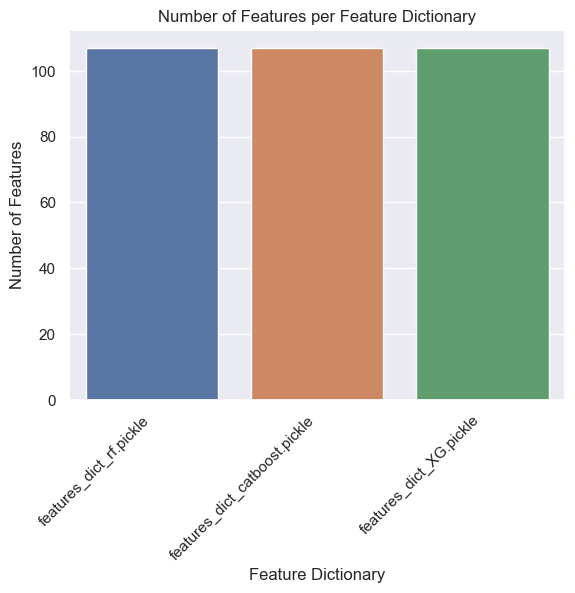

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the names and lengths of the feature dictionaries
feature_dicts = ['features_dict_rf.pickle', 'features_dict_catboost.pickle', 'features_dict_XG.pickle']
feature_dict_lengths = [99, 99, 41]

# Loop through the feature dictionaries and get their lengths
for i, feature_dict in enumerate(feature_dicts):
    with open(feature_dict, 'rb') as handle:
        x = pickle.load(handle)
        feature_dict_lengths[i] = len(x['features'])

# Create a Seaborn bar chart
sns.set_style('darkgrid')
sns.barplot(x=feature_dicts, y=feature_dict_lengths)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature Dictionary')
plt.ylabel('Number of Features')
plt.title('Number of Features per Feature Dictionary')

# Display the chart
plt.show()


# Ensemble Learning 

## MODEL 22 ENSEMBLE LEARNER WITH VOTING CLASSIFER 

In [103]:
import pickle
import numpy as np
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
import time

# Function to load features_dict and get new_features and num_attribs
# Function to load features_dict and get new_features and num_attribs
def load_features_dict_and_prepare(file_path, threshold):
    with open(file_path, 'rb') as handle:
        features_dict = pickle.load(handle)

    features = features_dict['features']
    importances = features_dict['importances']

    new_indices = [idx for idx, x in enumerate(importances) if x > threshold]
    new_importances = [x for idx, x in enumerate(importances) if x > threshold]

    new_features = [features[i] for i in new_indices]
    print(len(new_features))

    num_attribs = new_features

    return num_attribs

np.random.seed(42)

# Load features_dict and get num_attribs for each model with different thresholds
num_attribs_XG = load_features_dict_and_prepare('features_dict_XG.pickle', 0)
num_attribs_cb = load_features_dict_and_prepare('features_dict_catboost.pickle', 0)
num_attribs_rf = load_features_dict_and_prepare('features_dict_rf.pickle', 0.005)


# np.random.seed(42)

# # Load features_dict and get num_attribs for each model
# num_attribs_XG = load_features_dict_and_prepare('features_dict_XG.pickle')
# num_attribs_cb = load_features_dict_and_prepare('features_dict_catboost.pickle')
# num_attribs_rf = load_features_dict_and_prepare('features_dict_rf.pickle')

# Assuming get_pipeline() function is already defined
data_prep_pipeline_XG, selected_features_XG = get_pipeline(num_attribs_XG)
data_prep_pipeline_cb, selected_features_cb = get_pipeline(num_attribs_cb)
data_prep_pipeline_rf, selected_features_rf = get_pipeline(num_attribs_rf)

# Attaching classifiers to the above pipeline with the best parameters
catboost = CatBoostClassifier(random_state=42, iterations=1000, learning_rate=0.01,
                              depth=9, colsample_bylevel=0.5, thread_count=-1, verbose=False)
xgboost = XGBClassifier(random_state=42, n_estimators=1000, max_depth=5, learning_rate=0.01, eta=0.001,
                        colsample_bytree=0.5, n_jobs=-1)
rf = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10, max_features='auto',
                            min_samples_leaf=2, min_samples_split=5, n_jobs=-1)

catboost_pipeline = Pipeline([
    ("preparation", data_prep_pipeline_cb),
    ("catboost", catboost)
])

xgboost_pipeline = Pipeline([
    ("preparation", data_prep_pipeline_XG),
    ("xgboost", xgboost)
])

rf_pipeline = Pipeline([
    ("preparation", data_prep_pipeline_rf),
    ("rf", rf)
])

# Ensemble model with voting classifier
ensemble_model = VotingClassifier(estimators=[('catboost', catboost_pipeline),
                                              ('xgboost', xgboost_pipeline),
                                              ('rf', rf_pipeline)],
                                  voting='soft', n_jobs=-1)

# Training the model
start = time.time()
model = ensemble_model.fit(X_train, y_train)
train_time = np.round(time.time() - start, 4)

start = time.time()
score_test = ensemble_model.score(X_test, y_test)
test_time = np.round(time.time() - start, 4)

# Results
exp_name = f"Model 22 - Ensemble Learner - Voting Classsifier "
experiment_description =f" Tuned and selected XgBoost, catboost, random forest  {len(selected_features)} features"
expLog = get_results(expLog, exp_name,experiment_description,model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog

95
103
41
Total Features: 112 - Numerical: 95, Categorical: 16
Total Features: 120 - Numerical: 103, Categorical: 16
Total Features: 58 - Numerical: 41, Categorical: 16


/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/preprocess

exp_name  \
0                                 Model-1 Baseline LR   
1                                 Model-2 Baseline LR   
2                                         Model-3 KNN   
3                               Model-5 Decision Tree   
4                              Model-6 Random Forest    
5                                Model-7 Extra Trees    
6                     Model-8 Bagging Meta Estimator    
7                             Model-9 ADABoost SAMME    
8                                 Model-12 CATBoost     
9   Model 18 - CatBOOST -Feature &hyperParameter T...   
10  Model 19 - Random Forest -Feature &hyperParame...   
11  Model 20 - Random Forest -Feature &hyperParame...   
12  Model 21 - Random Forest -Feature &hyperParame...   
13  Model 22 - Ensemble Learner - Voting Classsifier    
14  Model 22 - Ensemble Learner - Voting Classsifier    

                                          description  Train Time (sec)  \
0   Logistic regression with undersampled data 124...            2.3376   
1   Logistic regression with undersampled data-2 1...            1.4645   
2           KNN with undersampled data-2 124 features            0.1864   
3   Decision tree with undersampled data-2 124 fea...            0.7840   
4   Random Forest with undersampled data-2 124 fea...           10.8707   
5   Extra Trees with undersampled data-2 124 features            1.4820   
6   Bagging Meta Estimator with undersampled data-...            2.7168   
7   ADABoost SAMME with undersampled data-2 124 fe...           22.8602   
8   CATBoost SAMME with undersampled data-2 124 fe...            6.4653   
9                CatBOOST Tuned with x>0 116 features            1.1723   
10          Random Forest Tuned with x>0 116 features            1.1767   
11         Random Forest Tuned with x>0.1 19 features            0.5466   
12       Random Forest Tuned with x>0.005 58 features            1.0561   
13   Tuned and selected XgBoost, catboost, random ...          109.9585   
14   Tuned and selected XgBoost, catboost, random ...          111.8600   

    Test Time (sec)  Train Acc  Valid Acc  Test  Acc  Train AUC  Valid AUC  \
0            0.0619     0.7731     0.7666     0.7777     0.7525     0.7433   
1            0.0486     0.6876     0.6843     0.6904     0.7525     0.7489   
2            0.5851     0.6950     0.6155     0.6184     0.7625     0.6571   
3            0.0232     0.6749     0.6535     0.6591     0.7380     0.7105   
4            0.3122     0.7664     0.6654     0.6661     0.8504     0.7243   
5            0.0905     0.6738     0.6502     0.6482     0.7405     0.7059   
6            0.1855     0.9844     0.6477     0.6446     0.9990     0.6978   
7            0.3029     0.7185     0.6966     0.6950     0.7989     0.7580   
8            0.1827     0.6964     0.6904     0.6926     0.7671     0.7580   
9            0.0520     0.7531     0.6821     0.6801     0.8325     0.7412   
10           0.0480     0.7531     0.6821     0.6801     0.8325     0.7412   
11           0.0414     0.6960     0.6733     0.6631     0.7617     0.7264   
12           0.0435     0.7513     0.6841     0.6808     0.8299     0.7429   
13           0.2921     0.7475     0.6912     0.6948     0.8292     0.7597   
14           0.2854     0.7475     0.6912     0.6948     0.8292     0.7597   

    Test  AUC  Train F1 Score  Valid F1 Score  Test F1 Score  
0      0.7477          0.3586          0.3285         0.3636  
1      0.7535          0.6865          0.6854         0.6900  
2      0.6550          0.6992          0.6205         0.6226  
3      0.7129          0.6881          0.6678         0.6730  
4      0.7273          0.7673          0.6631         0.6640  
5      0.7023          0.6771          0.6559         0.6536  
6      0.6983          0.9842          0.6210         0.6164  
7      0.7594          0.7174          0.6971         0.6948  
8      0.7591          0.6954          0.6901         0.6906  
9      0.7409          0.7570          0.6838       

In [104]:
print("hello ")

hello 


## MODEL 23 ENSEMBLE LEARNER WITH STACKING CLASSIFER 

In [105]:
import pickle
import numpy as np
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
import time
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
import numpy as np
import time

# Function to load features_dict and get new_features and num_attribs
# Function to load features_dict and get new_features and num_attribs
def load_features_dict_and_prepare(file_path, threshold):
    with open(file_path, 'rb') as handle:
        features_dict = pickle.load(handle)

    features = features_dict['features']
    importances = features_dict['importances']

    new_indices = [idx for idx, x in enumerate(importances) if x > threshold]
    new_importances = [x for idx, x in enumerate(importances) if x > threshold]

    new_features = [features[i] for i in new_indices]
    print(len(new_features))

    num_attribs = new_features

    return num_attribs

np.random.seed(42)

# Load features_dict and get num_attribs for each model with different thresholds
num_attribs_XG = load_features_dict_and_prepare('features_dict_XG.pickle', 0)
num_attribs_cb = load_features_dict_and_prepare('features_dict_catboost.pickle', 0)
num_attribs_rf = load_features_dict_and_prepare('features_dict_rf.pickle', 0.005)


# Assuming get_pipeline() function is already defined
data_prep_pipeline_XG, selected_features_XG = get_pipeline(num_attribs_XG)
data_prep_pipeline_cb, selected_features_cb = get_pipeline(num_attribs_cb)
data_prep_pipeline_rf, selected_features_rf = get_pipeline(num_attribs_rf)

# Attaching classifiers to the above pipeline with the best parameters
catboost = CatBoostClassifier(random_state=42, iterations=1000, learning_rate=0.01,
                              depth=9, colsample_bylevel=0.5, thread_count=-1, verbose=False)
xgboost = XGBClassifier(random_state=42, n_estimators=1000, max_depth=5, learning_rate=0.01, eta=0.001,
                        colsample_bytree=0.5, n_jobs=-1)
rf = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10, max_features='auto',
                            min_samples_leaf=2, min_samples_split=5, n_jobs=-1)

catboost_pipeline = Pipeline([
    ("preparation", data_prep_pipeline_cb),
    ("catboost", catboost)
])

xgboost_pipeline = Pipeline([
    ("preparation", data_prep_pipeline_XG),
    ("xgboost", xgboost)
])

rf_pipeline = Pipeline([
    ("preparation", data_prep_pipeline_rf),
    ("rf", rf)
])

# Ensemble model with stacking classifier
final_estimator = LogisticRegression(random_state=42)
ensemble_model = StackingClassifier(estimators=[('catboost', catboost_pipeline),
                                                ('xgboost', xgboost_pipeline),
                                                ('rf', rf_pipeline)],
                                    final_estimator=final_estimator, n_jobs=-1)

# Training the model
start = time.time()
model = ensemble_model.fit(X_train, y_train)
train_time = np.round(time.time() - start, 4)

start = time.time()
score_test = ensemble_model.score(X_test, y_test)
test_time = np.round(time.time() - start, 4)

# Results
exp_name = f"Model 23 - Ensemble Learner - Stacking Classsifier "
experiment_description =f" Tuned and selected XgBoost, catboost, random forest  {len(selected_features)} features"
expLog = get_results(expLog, exp_name,experiment_description,model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog

95
103
41
Total Features: 112 - Numerical: 95, Categorical: 16
Total Features: 120 - Numerical: 103, Categorical: 16
Total Features: 58 - Numerical: 41, Categorical: 16


/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/deepak/anaconda3/lib/python3.10/site-packages/sklearn/preprocess

exp_name  \
0                                 Model-1 Baseline LR   
1                                 Model-2 Baseline LR   
2                                         Model-3 KNN   
3                               Model-5 Decision Tree   
4                              Model-6 Random Forest    
5                                Model-7 Extra Trees    
6                     Model-8 Bagging Meta Estimator    
7                             Model-9 ADABoost SAMME    
8                                 Model-12 CATBoost     
9   Model 18 - CatBOOST -Feature &hyperParameter T...   
10  Model 19 - Random Forest -Feature &hyperParame...   
11  Model 20 - Random Forest -Feature &hyperParame...   
12  Model 21 - Random Forest -Feature &hyperParame...   
13  Model 22 - Ensemble Learner - Voting Classsifier    
14  Model 22 - Ensemble Learner - Voting Classsifier    
15  Model 23 - Ensemble Learner - Stacking Classsi...   

                                          description  Train Time (sec)  \
0   Logistic regression with undersampled data 124...            2.3376   
1   Logistic regression with undersampled data-2 1...            1.4645   
2           KNN with undersampled data-2 124 features            0.1864   
3   Decision tree with undersampled data-2 124 fea...            0.7840   
4   Random Forest with undersampled data-2 124 fea...           10.8707   
5   Extra Trees with undersampled data-2 124 features            1.4820   
6   Bagging Meta Estimator with undersampled data-...            2.7168   
7   ADABoost SAMME with undersampled data-2 124 fe...           22.8602   
8   CATBoost SAMME with undersampled data-2 124 fe...            6.4653   
9                CatBOOST Tuned with x>0 116 features            1.1723   
10          Random Forest Tuned with x>0 116 features            1.1767   
11         Random Forest Tuned with x>0.1 19 features            0.5466   
12       Random Forest Tuned with x>0.005 58 features            1.0561   
13   Tuned and selected XgBoost, catboost, random ...          109.9585   
14   Tuned and selected XgBoost, catboost, random ...          111.8600   
15   Tuned and selected XgBoost, catboost, random ...          228.2858   

    Test Time (sec)  Train Acc  Valid Acc  Test  Acc  Train AUC  Valid AUC  \
0            0.0619     0.7731     0.7666     0.7777     0.7525     0.7433   
1            0.0486     0.6876     0.6843     0.6904     0.7525     0.7489   
2            0.5851     0.6950     0.6155     0.6184     0.7625     0.6571   
3            0.0232     0.6749     0.6535     0.6591     0.7380     0.7105   
4            0.3122     0.7664     0.6654     0.6661     0.8504     0.7243   
5            0.0905     0.6738     0.6502     0.6482     0.7405     0.7059   
6            0.1855     0.9844     0.6477     0.6446     0.9990     0.6978   
7            0.3029     0.7185     0.6966     0.6950     0.7989     0.7580   
8            0.1827     0.6964     0.6904     0.6926     0.7671     0.7580   
9            0.0520     0.7531     0.6821     0.6801     0.8325     0.7412   
10           0.0480     0.7531     0.6821     0.6801     0.8325     0.7412   
11           0.0414     0.6960     0.6733     0.6631     0.7617     0.7264   
12           0.0435     0.7513     0.6841     0.6808     0.8299     0.7429   
13           0.2921     0.7475     0.6912     0.6948     0.8292     0.7597   
14           0.2854     0.7475     0.6912     0.6948     0.8292     0.7597   
15           0.3566     0.7403     0.6951     0.6967     0.8228     0.7612   

    Test  AUC  Train F1 Score  Valid F1 Score  Test F1 Score  
0      0.7477          0.3586          0.3285         0.3636  
1      0.7535          0.6865          0.6854         0.6900  
2      0.6550          0.6992          0.6205         0.6226  
3      0.7129          0.6881          0.6678         0.6730  
4      0.7273          0.7673          0.6631         0.6640  
5      0.7023          0.6771          0.6559         0.6536  
6      0.6983          0.9842  

In [115]:
# Write the data to a CSV file
expLog.to_csv('expLog2.csv', index=False)
df = pd.read_csv('expLog2.csv')


In this code, I replaced the VotingClassifier with StackingClassifier, and set the final_estimator parameter to None, which will use the default LogisticRegression as the meta-model. The cv parameter is set to 5, which means that 5-fold cross-validation will be used when generating the predictions for the meta-model.

## Final Table of Results :

In [117]:
df 

exp_name  \
0                                 Model-1 Baseline LR   
1                                 Model-2 Baseline LR   
2                                         Model-3 KNN   
3                               Model-5 Decision Tree   
4                              Model-6 Random Forest    
5                                Model-7 Extra Trees    
6                     Model-8 Bagging Meta Estimator    
7                             Model-9 ADABoost SAMME    
8                                 Model-12 CATBoost     
9   Model 18 - CatBOOST -Feature &hyperParameter T...   
10  Model 19 - Random Forest -Feature &hyperParame...   
11  Model 20 - Random Forest -Feature &hyperParame...   
12  Model 21 - Random Forest -Feature &hyperParame...   
13  Model 22 - Ensemble Learner - Voting Classsifier    
14  Model 22 - Ensemble Learner - Voting Classsifier    
15  Model 23 - Ensemble Learner - Stacking Classsi...   

                                          description  Train Time (sec)  \
0   Logistic regression with undersampled data 124...            2.3376   
1   Logistic regression with undersampled data-2 1...            1.4645   
2           KNN with undersampled data-2 124 features            0.1864   
3   Decision tree with undersampled data-2 124 fea...            0.7840   
4   Random Forest with undersampled data-2 124 fea...           10.8707   
5   Extra Trees with undersampled data-2 124 features            1.4820   
6   Bagging Meta Estimator with undersampled data-...            2.7168   
7   ADABoost SAMME with undersampled data-2 124 fe...           22.8602   
8   CATBoost SAMME with undersampled data-2 124 fe...            6.4653   
9                CatBOOST Tuned with x>0 116 features            1.1723   
10          Random Forest Tuned with x>0 116 features            1.1767   
11         Random Forest Tuned with x>0.1 19 features            0.5466   
12       Random Forest Tuned with x>0.005 58 features            1.0561   
13   Tuned and selected XgBoost, catboost, random ...          109.9585   
14   Tuned and selected XgBoost, catboost, random ...          111.8600   
15   Tuned and selected XgBoost, catboost, random ...          228.2858   

    Test Time (sec)  Train Acc  Valid Acc  Test  Acc  Train AUC  Valid AUC  \
0            0.0619     0.7731     0.7666     0.7777     0.7525     0.7433   
1            0.0486     0.6876     0.6843     0.6904     0.7525     0.7489   
2            0.5851     0.6950     0.6155     0.6184     0.7625     0.6571   
3            0.0232     0.6749     0.6535     0.6591     0.7380     0.7105   
4            0.3122     0.7664     0.6654     0.6661     0.8504     0.7243   
5            0.0905     0.6738     0.6502     0.6482     0.7405     0.7059   
6            0.1855     0.9844     0.6477     0.6446     0.9990     0.6978   
7            0.3029     0.7185     0.6966     0.6950     0.7989     0.7580   
8            0.1827     0.6964     0.6904     0.6926     0.7671     0.7580   
9            0.0520     0.7531     0.6821     0.6801     0.8325     0.7412   
10           0.0480     0.7531     0.6821     0.6801     0.8325     0.7412   
11           0.0414     0.6960     0.6733     0.6631     0.7617     0.7264   
12           0.0435     0.7513     0.6841     0.6808     0.8299     0.7429   
13           0.2921     0.7475     0.6912     0.6948     0.8292     0.7597   
14           0.2854     0.7475     0.6912     0.6948     0.8292     0.7597   
15           0.3566     0.7403     0.6951     0.6967     0.8228     0.7612   

    Test  AUC  Train F1 Score  Valid F1 Score  Test F1 Score  
0      0.7477          0.3586          0.3285         0.3636  
1      0.7535          0.6865          0.6854         0.6900  
2      0.6550          0.6992          0.6205         0.6226  
3      0.7129          0.6881          0.6678         0.6730  
4      0.7273          0.7673          0.6631         0.6640  
5      0.7023          0.6771          0.6559         0.6536  
6      0.6983          0.9842  

## Submission File Prep

For each SK_ID_CURR in the test set, you must predict a probability for the TARGET variable. The file should contain a header and have the following format:

```python 
SK_ID_CURR,TARGET
100001,0.1
100005,0.9
100013,0.2
etc.
```

In [109]:
X_kaggle_test

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                 0          135000.0    568800.0      20560.5   
1                 0           99000.0    222768.0      17370.0   
2                 0          202500.0    663264.0      69777.0   
3                 2          315000.0   1575000.0      49018.5   
4                 1          180000.0    625500.0      32067.0   
...             ...               ...         ...          ...   
48739             0          121500.0    412560.0      17473.5   
48740             2          157500.0    622413.0      31909.5   
48741             1          202500.0    315000.0      33205.5   
48742             0          225000.0    450000.0      25128.0   
48743             0          135000.0    312768.0      24709.5   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0             450000.0                    0.018850      -19241          -2329   
1             180000.0                    0.035792      -18064          -4469   
2             630000.0                    0.019101      -20038          -4458   
3            1575000.0                    0.026392      -13976          -1866   
4             625500.0                    0.010032      -13040          -2191   
...                ...                         ...         ...            ...   
48739         270000.0                    0.002042      -19970          -5169   
48740         495000.0                    0.035792      -11186          -1149   
48741         315000.0                    0.026392      -15922          -3037   
48742         450000.0                    0.018850      -13968          -2731   
48743         270000.0                    0.006629      -13962           -633   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  ...  NAME_FAMILY_STATUS  \
0                -5170.0             -812  ...             Married   
1                -9118.0            -1623  ...             Married   
2                -2175.0            -3503  ...             Married   
3                -2000.0            -4208  ...             Married   
4                -4000.0            -4262  ...             Married   
...                  ...              ...  ...                 ...   
48739            -9094.0            -3399  ...               Widow   
48740            -3015.0            -3003  ...             Married   
48741            -2681.0            -1504  ...             Married   
48742            -1461.0            -1364  ...             Married   
48743            -1072.0            -4220  ...             Married   

       NAME_HOUSING_TYPE     OCCUPATION_TYPE  WEEKDAY_APPR_PROCESS_START  \
0      House / apartment                 NaN                     TUESDAY   
1      House / apartment  Low-skill Laborers                      FRIDAY   
2      House / apartment             Drivers                      MONDAY   
3      House / apartment         Sales staff                   WEDNESDAY   
4      House / apartment                 NaN                      FRIDAY   
...                  ...                 ...                         ...   
48739  House / apartment                 NaN                   WEDNESDAY   
48740  House / apartment         Sales staff                      MONDAY   
48741  House / apartment                 NaN                   WEDNESDAY   
48742  House / apartment            Managers                      MONDAY   
48743  House / apartment          Core staff                     TUESDAY   

            ORGANIZATION_TYPE  FONDKAPREMONT_MODE  HOUSETYPE_MODE  \
0                Kindergarten                 NaN  block of flats   
1               Self-employed                 NaN             NaN   
2           Transport: type 3                 NaN             NaN   
3      Business Entity Type 3    reg oper account  block of flats   
4      Business Entity Type 3                 NaN             NaN   
...                       ...                 ...             ...   
4873

In [110]:
test_class_scores = model.predict_proba(X_kaggle_test)[:, 1]

In [111]:
# Submission dataframe
submit_df = datasets["application_test"][['SK_ID_CURR']]
submit_df['TARGET'] = test_class_scores

submit_df.head()

SK_ID_CURR    TARGET
0      100001  0.385194
1      100005  0.586650
2      100013  0.204624
3      100028  0.276173
4      100038  0.705487

In [112]:
submit_df.to_csv("submission.csv",index=False)

# Kaggle submission via the command line API

In [113]:
! kaggle competitions submit -c home-credit-default-risk -f submission.csv -m "Stacking ensemble classifier submission_deepak_after_feature_selection"

100%|███████████████████████████████████████| 1.22M/1.22M [00:01<00:00, 728kB/s]
Successfully submitted to Home Credit Default Risk

## report submission

Click on this [link](https://www.kaggle.com/c/home-credit-default-risk/submissions?sortBy=date&group=all&page=1)

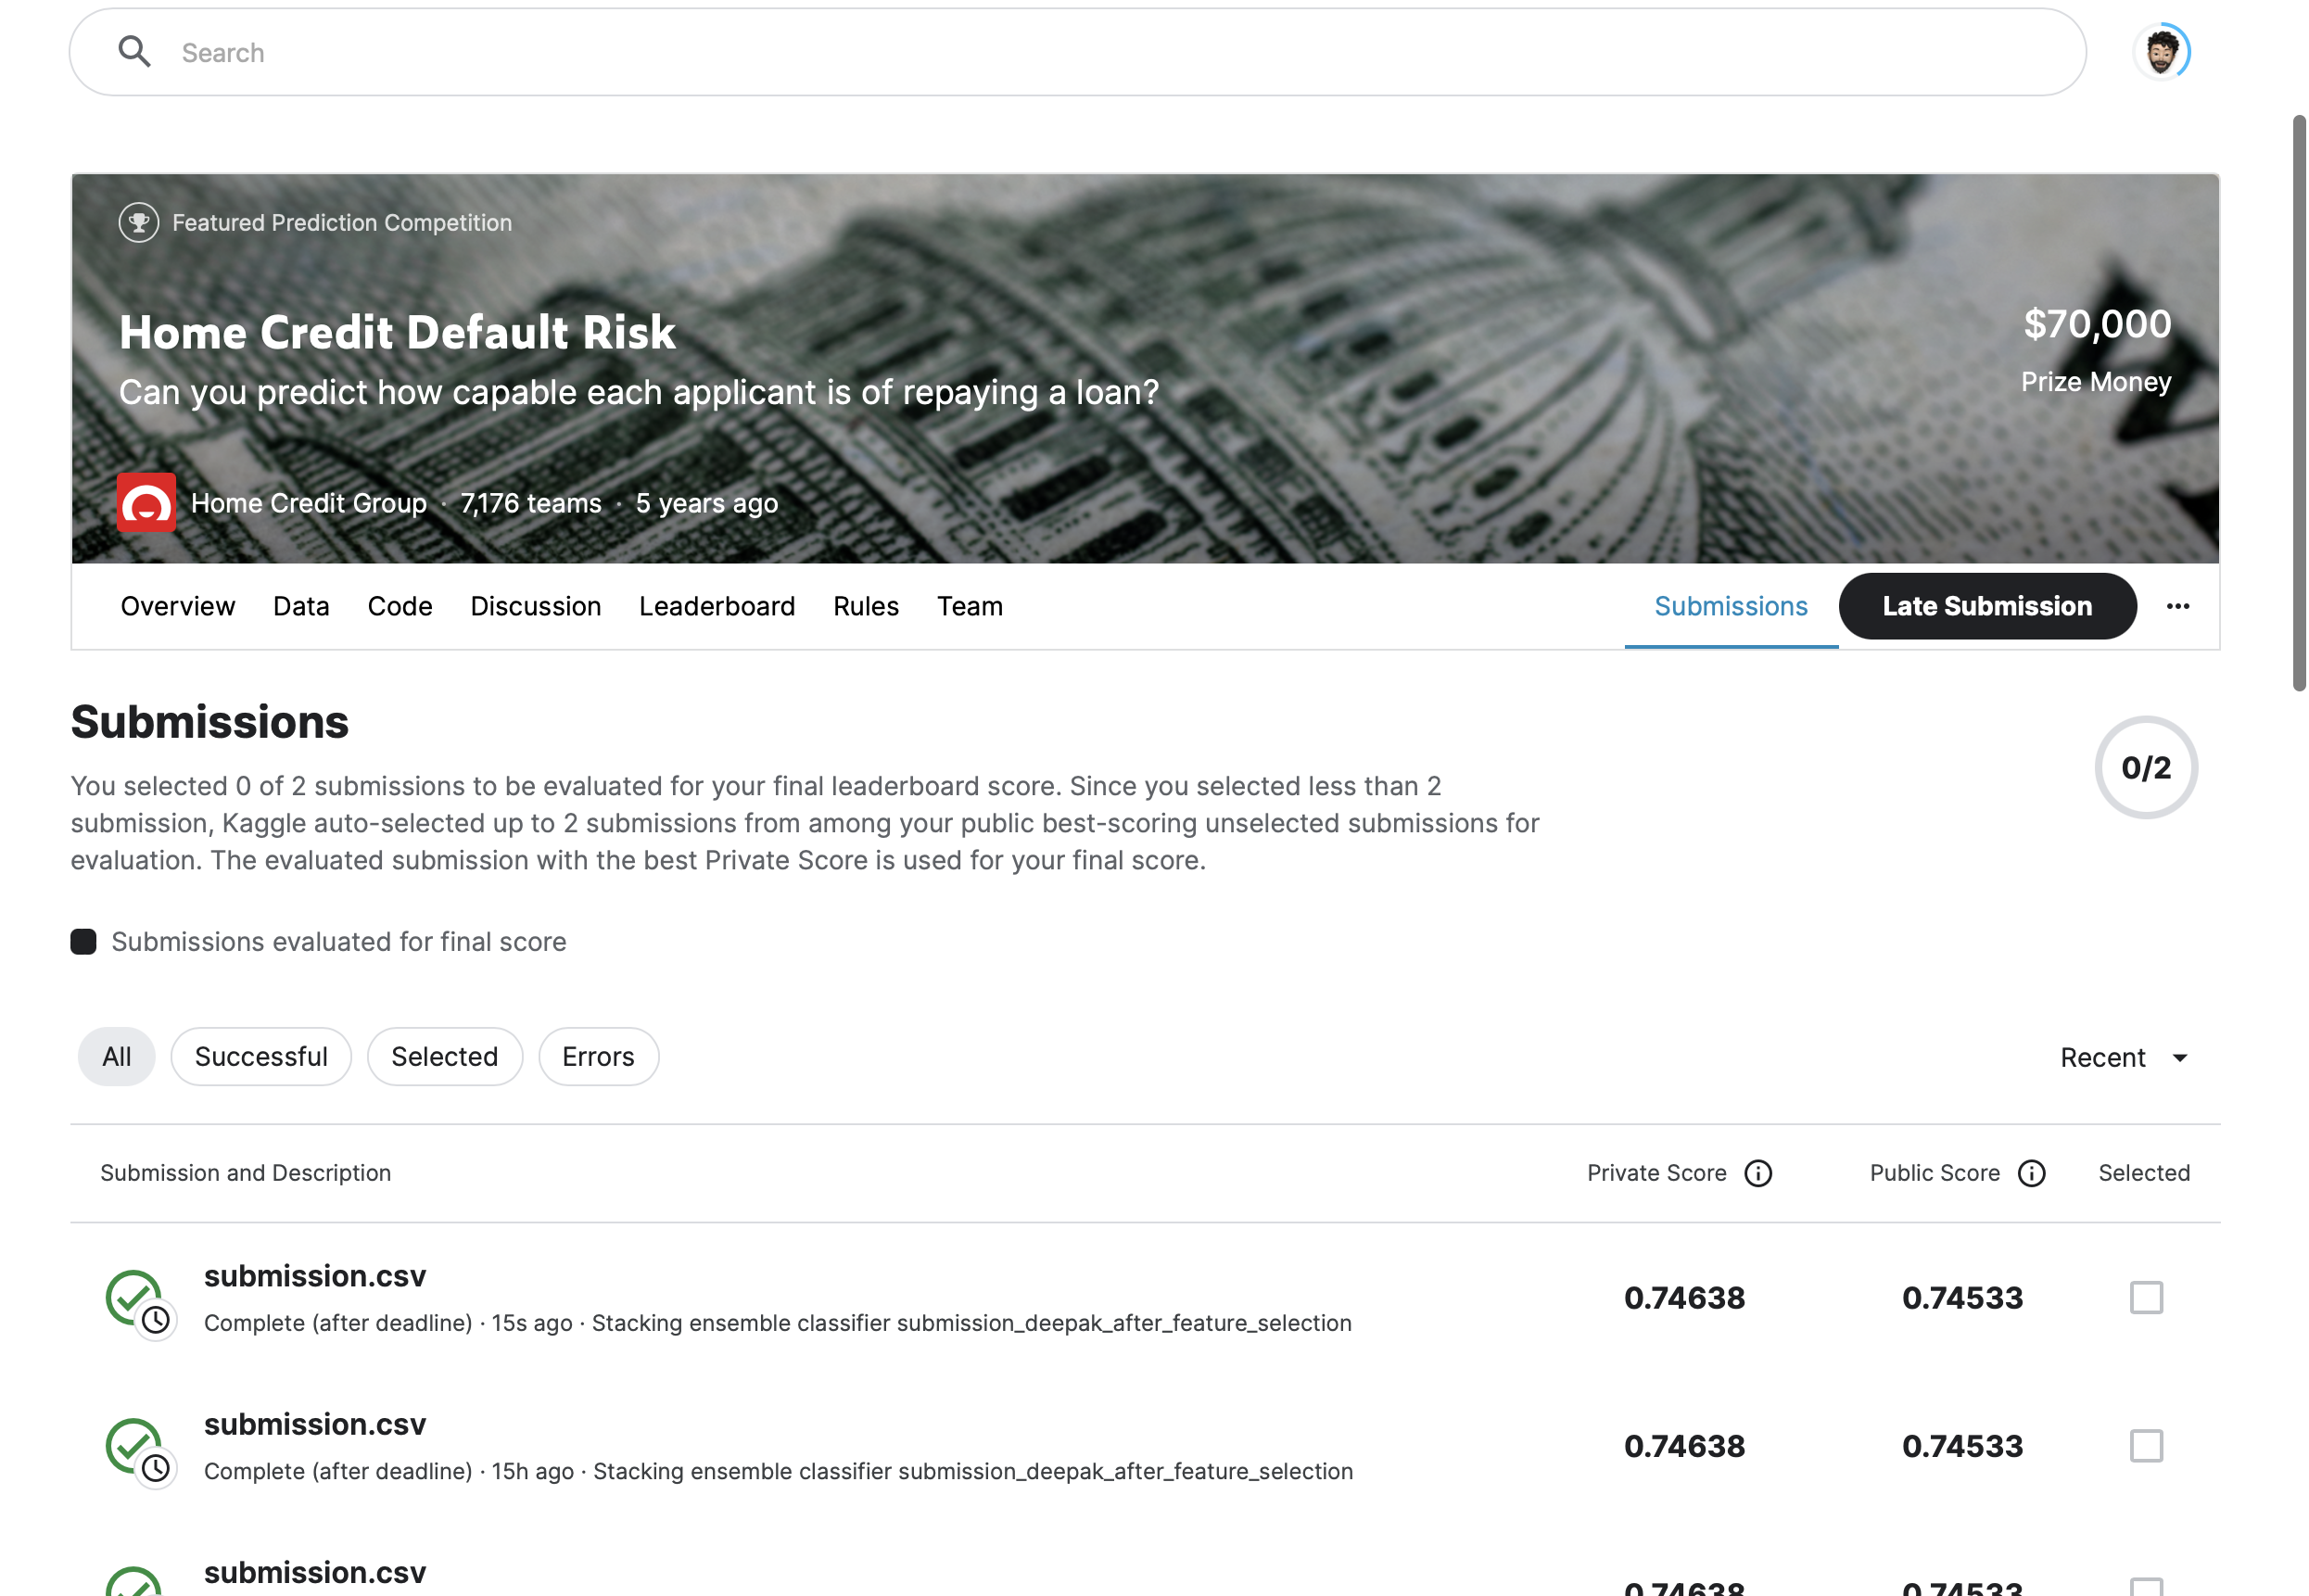

In [118]:
from IPython.display import Image
Image(filename='kaggle.png')


# References

Some of the material in this notebook has been adopted from [here](https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction/notebook)




Read the following:
* feature engineering via Featuretools library: 
  * https://github.com/Featuretools/predict-loan-repayment/blob/master/Automated%20Loan%20Repayment.ipynb
* https://www.analyticsvidhya.com/blog/2018/08/guide-automated-feature-engineering-featuretools-python/
* feature engineering paper: https://dai.lids.mit.edu/wp-content/uploads/2017/10/DSAA_DSM_2015.pdf
* https://www.analyticsvidhya.com/blog/2017/08/catboost-automated-categorical-data/